In [ ]:
# !pip install kaggle
# from google.colab import files
# files.upload()

In [ ]:
# !ls -1ha kaggle.json

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# # Permission Warning 이 일어나지 않도록 
# !chmod 600 ~/.kaggle/kaggle.json
# # 본인이 참가한 모든 대회 보기 
# !kaggle competitions list

In [ ]:
!pip3 install tokenizers wandb sentencepiece

     |████████████████████████████████| 6.6 MB 4.1 MB/s 
     |████████████████████████████████| 1.8 MB 78.9 MB/s 
     |████████████████████████████████| 1.2 MB 79.7 MB/s 
     |████████████████████████████████| 145 kB 85.4 MB/s 
     |████████████████████████████████| 181 kB 89.0 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=8ee19231907bab4c179b90d02dfb48d5ee825b60af5b05220753638faf836955
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools


In [ ]:
!pip install transformers

     |████████████████████████████████| 4.2 MB 4.2 MB/s 
     |████████████████████████████████| 596 kB 47.9 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import os
os.chdir("drive/")
os.chdir('My Drive')
os.chdir('Kaggle')

In [ ]:
# !kaggle competitions download -c us-patent-phrase-to-phrase-matching
# !unzip us-patent-phrase-to-phrase-matching.zip
# !ls

In [ ]:
# debert_v3_tokenizer_path = 'deberta-v2-v3-fast-tokenizer'
# %env TOKENIZERS_PARALLELISM=true

# import shutil
# from pathlib import Path

# transformers_path = Path('/usr/local/lib/python3.7/dist-packages/transformers')
# input_dir = Path('./deberta-v2-v3-fast-tokenizer')

# convert_file = input_dir / "convert_slow_tokenizer.py"
# conversion_path = transformers_path / convert_file.name

# if conversion_path.exists():
#     conversion_path.unlink()

# shutil.copy(convert_file, transformers_path)
# deberta_v2_path = transformers_path / "models" / "deberta_v2"

# for filename in ['tokenization_deberta_v2.py', 'tokenization_deberta_v2_fast.py']:
#     filepath = deberta_v2_path/filename
    
#     if filepath.exists():
#         filepath.unlink()
#     shutil.copy(input_dir/filename, filepath)

In [ ]:
OUTPUT_DIR = './pppm-deberta-v3-outputs/'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat May 21 03:06:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# ====================================================
# CFG
# ====================================================
class CFG:
    wandb=True
    competition='PPPM'
    _wandb_kernel='bluehills'
    debug=False
    apex=True
    print_freq=100
    num_workers=4
    model="microsoft/deberta-v3-large"
    scheduler='cosine' # ['linear', 'cosine']
    batch_scheduler=True
    num_cycles=0.5
    num_warmup_steps=0
    epochs=5
    encoder_lr=1.5e-5 #2e-5
    decoder_lr=1.5e-5 #2e-5
    min_lr=5e-7
    eps=5e-7
    betas=(0.9, 0.999)
    batch_size=14
    fc_dropout=0.1
    target_size=1
    max_len=512
    weight_decay=0.01
    gradient_accumulation_steps=1
    max_grad_norm=1000
    seed=42
    train_all_index=25
    n_fold=20
    trn_fold=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14 ,15, 16, 17, 18, 19]
    train=True
    
if CFG.debug:
    CFG.epochs = 2
    CFG.trn_fold = [0]

In [ ]:
# ====================================================
# wandb
# ====================================================
if CFG.wandb:
    import wandb
    try:
        # from kaggle_secrets import UserSecretsClient
        # user_secrets = UserSecretsClient()
        # secret_value_0 = user_secrets.get_secret("wandb_api")
        # wandb.login(key=secret_value_0)
        print('login to wandb')
        wandb.login()
        anony = None
    except:
        anony = "must"
        print('If you want to use your W&B account, go to Add-ons -> Secrets and provide your W&B access token. Use the Label name as wandb_api. \nGet your W&B access token from here: https://wandb.ai/authorize')


    def class2dict(f):
        return dict((name, getattr(f, name)) for name in dir(f) if not name.startswith('__'))

    run = wandb.init(project='PPPM-Training', 
                     name=CFG.model,
                     config=class2dict(CFG),
                     group=CFG.model,
                     job_type="train",
                     anonymous=anony)

login to wandb


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: bluehills. Use `wandb login --relogin` to force relogin


# Library

In [ ]:
# ====================================================
# Library
# ====================================================
import os
import gc
import re
import ast
import sys
import copy
import json
import time
import math
import shutil
import string
import pickle
import random
import joblib
import itertools
from pathlib import Path
import warnings
warnings.filterwarnings("ignore")

import scipy as sp
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from tqdm.auto import tqdm
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold, GroupKFold, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedGroupKFold

import torch
print(f"torch.__version__: {torch.__version__}")
import torch.nn as nn
from torch.nn import Parameter
import torch.nn.functional as F
from torch.optim import Adam, SGD, AdamW
from torch.utils.data import DataLoader, Dataset
import torch.cuda.amp as amp

import tokenizers
import transformers
print(f"tokenizers.__version__: {tokenizers.__version__}")
print(f"transformers.__version__: {transformers.__version__}")
from transformers import AutoTokenizer, AutoModel, AutoConfig, AutoModelForSequenceClassification
from transformers import get_linear_schedule_with_warmup, get_cosine_schedule_with_warmup
from transformers import AutoTokenizer, AutoConfig, AutoModelForTokenClassification

%env TOKENIZERS_PARALLELISM=true

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

torch.__version__: 1.11.0+cu113
tokenizers.__version__: 0.12.1
transformers.__version__: 4.19.2
env: TOKENIZERS_PARALLELISM=true


# Utils

In [ ]:
# ====================================================
# Utils
# ====================================================
def get_score(y_true, y_pred):
    score = sp.stats.pearsonr(y_true, y_pred)[0]
    return score


def get_logger(filename=OUTPUT_DIR+'train'):
    from logging import getLogger, INFO, StreamHandler, FileHandler, Formatter
    logger = getLogger(__name__)
    logger.setLevel(INFO)
    handler1 = StreamHandler()
    handler1.setFormatter(Formatter("%(message)s"))
    handler2 = FileHandler(filename=f"{filename}.log")
    handler2.setFormatter(Formatter("%(message)s"))
    logger.addHandler(handler1)
    logger.addHandler(handler2)
    return logger

LOGGER = get_logger()

def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything(seed=42)

# Data Loading

In [ ]:
# ====================================================
# Data Loading
# ====================================================
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')
print(f"train.shape: {train.shape}")
print(f"test.shape: {test.shape}")
print(f"submission.shape: {submission.shape}")
display(train.head())
display(test.head())
display(submission.head())

train.shape: (36473, 5)
test.shape: (36, 4)
submission.shape: (36, 2)


,id,anchor,target,context,score
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75
2,36d72442aefd8232,abatement,active catalyst,A47,0.25
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00


,id,anchor,target,context
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02
1,09e418c93a776564,adjust gas flow,altering gas flow,F23
2,36baf228038e314b,lower trunnion,lower locating,B60
3,1f37ead645e7f0c8,cap component,upper portion,D06
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04


,id,score
0,4112d61851461f60,0
1,09e418c93a776564,0
2,36baf228038e314b,0
3,1f37ead645e7f0c8,0
4,71a5b6ad068d531f,0


In [ ]:
# ====================================================
# CPC Data
# ====================================================
def get_cpc_texts():
    contexts = []
    pattern = '[A-Z]\d+'
    for file_name in os.listdir('./CPCSchemeXML202105'):
        result = re.findall(pattern, file_name)
        if result:
            contexts.append(result)
    contexts = sorted(set(sum(contexts, [])))
    results = {}
    for cpc in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Y']:
        with open(f'./CPCTitleList202202/cpc-section-{cpc}_20220201.txt') as f:
            s = f.read()
        pattern = f'{cpc}\t\t.+'
        result = re.findall(pattern, s)
        pattern = "^"+pattern[:-2]
        cpc_result = re.sub(pattern, "", result[0])
        for context in [c for c in contexts if c[0] == cpc]:
            pattern = f'{context}\t\t.+'
            result = re.findall(pattern, s)
            pattern = "^"+pattern[:-2]
            results[context] = cpc_result + ". " + re.sub(pattern, "", result[0])
    return results


def get_cpc_texts_nakama():
    contexts = []
    pattern = '[A-Z]\d+'
    for file_name in os.listdir('./CPCSchemeXML202105'):
        result = re.findall(pattern, file_name)
        if result:
            contexts.append(result)
    contexts = sorted(set(sum(contexts, [])))
    results = {}
    for cpc in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'Y']:
        with open(f'./CPCTitleList202202/cpc-section-{cpc}_20220201.txt') as f:
            s = f.read()
        pattern = f'{cpc}\t\t.+'
        result = re.findall(pattern, s)
        cpc_result = result[0].lstrip(pattern)
        for context in [c for c in contexts if c[0] == cpc]:
            pattern = f'{context}\t\t.+'
            result = re.findall(pattern, s)
            results[context] = cpc_result + ". " + result[0].lstrip(pattern)
    return results


cpc_texts = get_cpc_texts()
# cpc_texts = get_cpc_texts_nakama()
torch.save(cpc_texts, OUTPUT_DIR+"cpc_texts.pth")
train['context_text'] = train['context'].map(cpc_texts)
test['context_text'] = test['context'].map(cpc_texts)
display(train.head())
display(test.head())

,id,anchor,target,context,score,context_text
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...


,id,anchor,target,context,context_text
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,PHYSICS. OPTICS
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...
2,36baf228038e314b,lower trunnion,lower locating,B60,PERFORMING OPERATIONS; TRANSPORTING. VEHICLES ...
3,1f37ead645e7f0c8,cap component,upper portion,D06,TEXTILES; PAPER. TREATMENT OF TEXTILES OR THE ...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,ELECTRICITY. ELECTRIC COMMUNICATION TECHNIQUE


In [ ]:
train['text'] = train['anchor'] + '[SEP]' + train['target'] + '[SEP]'  + train['context_text']
test['text'] = test['anchor'] + '[SEP]' + test['target'] + '[SEP]'  + test['context_text']
display(train.head())
display(test.head())

,id,anchor,target,context,score,context_text,text
0,37d61fd2272659b1,abatement,abatement of pollution,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]abatement of pollution[SEP]HUMAN...
1,7b9652b17b68b7a4,abatement,act of abating,A47,0.75,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]act of abating[SEP]HUMAN NECESSI...
2,36d72442aefd8232,abatement,active catalyst,A47,0.25,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]active catalyst[SEP]HUMAN NECESS...
3,5296b0c19e1ce60e,abatement,eliminating process,A47,0.50,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]eliminating process[SEP]HUMAN NE...
4,54c1e3b9184cb5b6,abatement,forest region,A47,0.00,HUMAN NECESSITIES. FURNITURE; DOMESTIC ARTICLE...,abatement[SEP]forest region[SEP]HUMAN NECESSIT...


,id,anchor,target,context,context_text,text
0,4112d61851461f60,opc drum,inorganic photoconductor drum,G02,PHYSICS. OPTICS,opc drum[SEP]inorganic photoconductor drum[SEP...
1,09e418c93a776564,adjust gas flow,altering gas flow,F23,MECHANICAL ENGINEERING; LIGHTING; HEATING; WEA...,adjust gas flow[SEP]altering gas flow[SEP]MECH...
2,36baf228038e314b,lower trunnion,lower locating,B60,PERFORMING OPERATIONS; TRANSPORTING. VEHICLES ...,lower trunnion[SEP]lower locating[SEP]PERFORMI...
3,1f37ead645e7f0c8,cap component,upper portion,D06,TEXTILES; PAPER. TREATMENT OF TEXTILES OR THE ...,cap component[SEP]upper portion[SEP]TEXTILES; ...
4,71a5b6ad068d531f,neural stimulation,artificial neural network,H04,ELECTRICITY. ELECTRIC COMMUNICATION TECHNIQUE,neural stimulation[SEP]artificial neural netwo...


# EDA

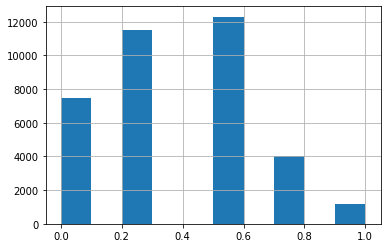

In [ ]:
train['score'].hist()

In [ ]:
display(train['context'].apply(lambda x: x[0]).value_counts())

B    8019
H    6195
G    6013
C    5288
A    4094
F    4054
E    1531
D    1279
Name: context, dtype: int64

# CV Split

In [ ]:
# ====================================================
# CV split
# ====================================================
# train['score_map'] = train['score'].map({0.00: 0, 0.25: 1, 0.50: 2, 0.75: 3, 1.00: 4})
# Fold = StratifiedKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
# for n, (train_index, val_index) in enumerate(Fold.split(train, train['score_map'])):
#     train.loc[val_index, 'fold'] = int(n)
# train['fold'] = train['fold'].astype(int)
# display(train.groupby('fold').size())

In [ ]:
# train['score_map'] = train['score'].map({0.00: 0, 0.25: 1, 0.50: 2, 0.75: 3, 1.00: 4})

# encoder = LabelEncoder()
# train['anchor_map'] = encoder.fit_transform(train['anchor'])

# kf = StratifiedGroupKFold(n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
# for n, (_, valid_index) in enumerate(kf.split(train, train['score_map'], groups=train['anchor_map'])):
#     train.loc[valid_index, 'fold'] = int(n)

# train['fold'] = train['fold'].astype(int)

In [ ]:
!pip3 install -q iterative-stratification
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

dfx = pd.get_dummies(train, columns=["score"]).groupby(["anchor"], as_index=False).sum()
cols = [c for c in dfx.columns if c.startswith("score_") or c == "anchor"]
# dfx = pd.get_dummies(train, columns=["score"]).groupby(["target"], as_index=False).sum()
# cols = [c for c in dfx.columns if c.startswith("score_") or c == "target"]
dfx = dfx[cols]

mskf = MultilabelStratifiedKFold(n_splits=CFG.n_fold, shuffle=True, random_state=42)
labels = [c for c in dfx.columns if c != "anchor"]
# labels = [c for c in dfx.columns if c != "target"]
dfx_labels = dfx[labels]
dfx["fold"] = -1

for fold, (trn_, val_) in enumerate(mskf.split(dfx, dfx_labels)):
    print(len(trn_), len(val_))
    dfx.loc[val_, "fold"] = fold

train = train.merge(dfx[["anchor", "fold"]], on="anchor", how="left")
# train = train.merge(dfx[["target", "fold"]], on="target", how="left")
print(train.fold.value_counts())

696 37
696 37
696 37
696 37
696 37
697 36
697 36
696 37
696 37
696 37
697 36
697 36
696 37
696 37
696 37
696 37
696 37
697 36
697 36
697 36
7     2026
15    2008
14    1989
9     1977
5     1976
0     1930
1     1917
16    1883
3     1820
2     1817
8     1809
18    1804
10    1788
4     1755
19    1750
12    1733
11    1728
17    1666
6     1655
13    1442
Name: fold, dtype: int64


In [ ]:
if CFG.debug:
    display(train.groupby('fold').size())
    train = train.sample(n=1000, random_state=0).reset_index(drop=True)
    display(train.groupby('fold').size())

# Tokenizer

In [ ]:
# ====================================================
# tokenizer
# ====================================================
tokenizer = AutoTokenizer.from_pretrained(CFG.model)
tokenizer.save_pretrained(OUTPUT_DIR+'tokenizer/')
CFG.tokenizer = tokenizer

Downloading:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/580 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.35M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# Dataset

In [ ]:
# ====================================================
# Define max_len
# ====================================================
lengths_dict = {}

lengths = []
tk0 = tqdm(cpc_texts.values(), total=len(cpc_texts))
for text in tk0:
    length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
    lengths.append(length)
lengths_dict['context_text'] = lengths

for text_col in ['anchor', 'target']:
    lengths = []
    tk0 = tqdm(train[text_col].fillna("").values, total=len(train))
    for text in tk0:
        length = len(tokenizer(text, add_special_tokens=False)['input_ids'])
        lengths.append(length)
    lengths_dict[text_col] = lengths
    
CFG.max_len = max(lengths_dict['anchor']) + max(lengths_dict['target'])\
                + max(lengths_dict['context_text']) + 4 # CLS + SEP + SEP + SEP
LOGGER.info(f"max_len: {CFG.max_len}")

  0%|          | 0/136 [00:00<?, ?it/s]

  0%|          | 0/36473 [00:00<?, ?it/s]

  0%|          | 0/36473 [00:00<?, ?it/s]

max_len: 133


In [ ]:
# ====================================================
# Dataset
# ====================================================
def prepare_input(cfg, text):
    inputs = cfg.tokenizer(text,
                           add_special_tokens=True,
                           max_length=cfg.max_len,
                           padding="max_length",
                           return_offsets_mapping=False)
    for k, v in inputs.items():
        inputs[k] = torch.tensor(v, dtype=torch.long)
    return inputs


class TrainDataset(Dataset):
    def __init__(self, cfg, df):
        self.cfg = cfg
        self.texts = df['text'].values
        self.labels = df['score'].values

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, item):
        inputs = prepare_input(self.cfg, self.texts[item])
        label = torch.tensor(self.labels[item], dtype=torch.float)
        return inputs, label

In [ ]:
"""
train_dataset = TrainDataset(CFG, train)
inputs, label = train_dataset[0]
print(inputs)
print(label)
"""

'\ntrain_dataset = TrainDataset(CFG, train)\ninputs, label = train_dataset[0]\nprint(inputs)\nprint(label)\n'

# Model

In [ ]:
# ====================================================
# Model
# ====================================================
class CustomModel(nn.Module):
    def __init__(self, cfg, config_path=None, pretrained=False):
        super().__init__()
        self.cfg = cfg
        if config_path is None:
            self.config = AutoConfig.from_pretrained(cfg.model, output_hidden_states=True)
        else:
            self.config = torch.load(config_path)
        if pretrained:
            self.model = AutoModel.from_pretrained(cfg.model, config=self.config)
            # self.model = AutoModelForSequenceClassification.from_pretrained(cfg.model, config=self.config)
        else:
            self.model = AutoModel.from_config(self.config)
            # self.model = AutoModelForSequenceClassification.from_config(self.config)
        self.fc_dropout = nn.Dropout(cfg.fc_dropout)
        self.fc = nn.Linear(self.config.hidden_size, self.cfg.target_size)
        # self.fc = nn.Linear(self.config.num_labels, self.cfg.target_size)
        self._init_weights(self.fc)
        self.attention = nn.Sequential(
            nn.Linear(self.config.hidden_size, 512),
            nn.Tanh(),
            nn.Linear(512, 1),
            nn.Softmax(dim=1)
        )
        self._init_weights(self.attention)
        
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.bias is not None:
                module.bias.data.zero_()
        elif isinstance(module, nn.Embedding):
            module.weight.data.normal_(mean=0.0, std=self.config.initializer_range)
            if module.padding_idx is not None:
                module.weight.data[module.padding_idx].zero_()
        elif isinstance(module, nn.LayerNorm):
            module.bias.data.zero_()
            module.weight.data.fill_(1.0)
        
    def feature(self, inputs):
        outputs = self.model(**inputs)
        last_hidden_states = outputs[0]
        # feature = torch.mean(last_hidden_states, 1)
        weights = self.attention(last_hidden_states)
        feature = torch.sum(weights * last_hidden_states, dim=1)
        return feature

    def forward(self, inputs):
        feature = self.feature(inputs)
        output = self.fc(self.fc_dropout(feature))
        return output
    
    # def forward(self, inputs):
    #     return self.model(**inputs)


# Helper Functions

In [ ]:
# ====================================================
# Helper functions
# ====================================================
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))


def train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device):
    model.train()
    scaler = torch.cuda.amp.GradScaler(enabled=CFG.apex)
    losses = AverageMeter()
    start = end = time.time()
    global_step = 0
    for step, (inputs, labels) in enumerate(train_loader):
        for k, v in inputs.items():
            inputs[k] = v.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        with torch.cuda.amp.autocast(enabled=CFG.apex):
            y_preds = model(inputs)
        loss = criterion(y_preds.view(-1, 1), labels.view(-1, 1))
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        losses.update(loss.item(), batch_size)
        scaler.scale(loss).backward()
        grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad()
            global_step += 1
            if CFG.batch_scheduler:
                scheduler.step()
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(train_loader)-1):
            print('Epoch: [{0}][{1}/{2}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  'Grad: {grad_norm:.4f}  '
                  'LR: {lr:.8f}  '
                  .format(epoch+1, step, len(train_loader), 
                          remain=timeSince(start, float(step+1)/len(train_loader)),
                          loss=losses,
                          grad_norm=grad_norm,
                          lr=scheduler.get_lr()[0]))
        if CFG.wandb:
            wandb.log({f"[fold{fold}] loss": losses.val,
                       f"[fold{fold}] lr": scheduler.get_lr()[0]})
    return losses.avg


def valid_fn(valid_loader, model, criterion, device):
    losses = AverageMeter()
    model.eval()
    preds = []
    start = end = time.time()
    for step, (inputs, labels) in enumerate(valid_loader):
        for k, v in inputs.items():
            inputs[k] = v.to(device)
        labels = labels.to(device)
        batch_size = labels.size(0)
        with torch.no_grad():
            y_preds = model(inputs)
        loss = criterion(y_preds.view(-1, 1), labels.view(-1, 1))
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        losses.update(loss.item(), batch_size)
        preds.append(y_preds.sigmoid().to('cpu').numpy())
        end = time.time()
        if step % CFG.print_freq == 0 or step == (len(valid_loader)-1):
            print('EVAL: [{0}/{1}] '
                  'Elapsed {remain:s} '
                  'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                  .format(step, len(valid_loader),
                          loss=losses,
                          remain=timeSince(start, float(step+1)/len(valid_loader))))
    predictions = np.concatenate(preds)
    predictions = np.concatenate(predictions)
    return losses.avg, predictions


def inference_fn(test_loader, model, device):
    preds = []
    model.eval()
    model.to(device)
    tk0 = tqdm(test_loader, total=len(test_loader))
    for inputs in tk0:
        for k, v in inputs.items():
            inputs[k] = v.to(device)
        with torch.no_grad():
            y_preds = model(inputs)
        preds.append(y_preds.sigmoid().to('cpu').numpy())
    predictions = np.concatenate(preds)
    return predictions

In [ ]:
# ====================================================
# train loop
# ====================================================
def train_loop(folds, fold):
    
    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    if fold != CFG.train_all_index:
        train_folds = folds[folds['fold'] != fold].reset_index(drop=True)
    else:
        train_folds = folds
    valid_folds = folds[folds['fold'] == fold].reset_index(drop=True)
    valid_labels = valid_folds['score'].values
    
    train_dataset = TrainDataset(CFG, train_folds)
    valid_dataset = TrainDataset(CFG, valid_folds)

    train_loader = DataLoader(train_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=True,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_loader = DataLoader(valid_dataset,
                              batch_size=CFG.batch_size,
                              shuffle=False,
                              num_workers=CFG.num_workers, pin_memory=True, drop_last=False)

    # ====================================================
    # model & optimizer
    # ====================================================
    model = CustomModel(CFG, config_path=None, pretrained=True)

    torch.save(model.config, OUTPUT_DIR+'config.pth')
    model.to(device)
    
    def get_optimizer_params(model, encoder_lr, decoder_lr, weight_decay=0.0):
        param_optimizer = list(model.named_parameters())
        no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
        optimizer_parameters = [
            {'params': [p for n, p in model.model.named_parameters() if not any(nd in n for nd in no_decay)],
             'lr': encoder_lr, 'weight_decay': weight_decay},
            {'params': [p for n, p in model.model.named_parameters() if any(nd in n for nd in no_decay)],
             'lr': encoder_lr, 'weight_decay': 0.0},
            {'params': [p for n, p in model.named_parameters() if "model" not in n],
             'lr': decoder_lr, 'weight_decay': 0.0}
        ]
        return optimizer_parameters

    optimizer_parameters = get_optimizer_params(model,
                                                encoder_lr=CFG.encoder_lr, 
                                                decoder_lr=CFG.decoder_lr,
                                                weight_decay=CFG.weight_decay)
    optimizer = AdamW(optimizer_parameters, lr=CFG.encoder_lr, eps=CFG.eps, betas=CFG.betas)
    
    # ====================================================
    # scheduler
    # ====================================================
    def get_scheduler(cfg, optimizer, num_train_steps):
        if cfg.scheduler == 'linear':
            scheduler = get_linear_schedule_with_warmup(
                optimizer, num_warmup_steps=cfg.num_warmup_steps, num_training_steps=num_train_steps
            )
        elif cfg.scheduler == 'cosine':
            scheduler = get_cosine_schedule_with_warmup(
                optimizer, num_warmup_steps=cfg.num_warmup_steps, num_training_steps=num_train_steps, num_cycles=cfg.num_cycles
            )
        return scheduler
    
    num_train_steps = int(len(train_folds) / CFG.batch_size * CFG.epochs)
    scheduler = get_scheduler(CFG, optimizer, num_train_steps)

    # ====================================================
    # loop
    # ====================================================
    criterion = nn.BCEWithLogitsLoss(reduction="mean")
    # criterion = nn.MSELoss()
    # criterion = FocalLossV1().cuda()
    
    best_score = 0.

    for epoch in range(CFG.epochs):

        start_time = time.time()

        # train
        avg_loss = train_fn(fold, train_loader, model, criterion, optimizer, epoch, scheduler, device)

        # eval
        avg_val_loss, predictions = valid_fn(valid_loader, model, criterion, device)
        
        # scoring
        score = get_score(valid_labels, predictions)

        elapsed = time.time() - start_time

        LOGGER.info(f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
        LOGGER.info(f'Epoch {epoch+1} - Score: {score:.4f}')
        if CFG.wandb:
            wandb.log({f"[fold{fold}] epoch": epoch+1, 
                       f"[fold{fold}] avg_train_loss": avg_loss, 
                       f"[fold{fold}] avg_val_loss": avg_val_loss,
                       f"[fold{fold}] score": score})
        
        if best_score < score:
            best_score = score
            LOGGER.info(f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            torch.save({'model': model.state_dict(),
                        'predictions': predictions},
                        OUTPUT_DIR+f"{CFG.model.replace('/', '-')}_fold{fold}_best.pth")
        
        torch.cuda.empty_cache()
        gc.collect()

    predictions = torch.load(OUTPUT_DIR+f"{CFG.model.replace('/', '-')}_fold{fold}_best.pth", 
                             map_location=torch.device('cpu'))['predictions']
    valid_folds['pred'] = predictions

    torch.cuda.empty_cache()
    gc.collect()
    
    return valid_folds

In [ ]:
if __name__ == '__main__':
    
    def get_result(oof_df):
        labels = oof_df['score'].values
        preds = oof_df['pred'].values
        score = get_score(labels, preds)
        LOGGER.info(f'Score: {score:<.4f}')
    
    if CFG.train:
        oof_df = pd.DataFrame()
        for fold in range(CFG.n_fold):
            if fold in CFG.trn_fold:
                _oof_df = train_loop(train, fold)
                oof_df = pd.concat([oof_df, _oof_df])
                LOGGER.info(f"========== fold: {fold} result ==========")
                get_result(_oof_df)
        oof_df = oof_df.reset_index(drop=True)
        LOGGER.info(f"========== CV ==========")
        get_result(oof_df)
        oof_df.to_pickle(OUTPUT_DIR+'oof_df.pkl')
        
    if CFG.wandb:
        wandb.finish()

========== fold: 0 training ==========


Downloading:   0%|          | 0.00/833M [00:00<?, ?B/s]

Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch: [1][0/2467] Elapsed 0m 1s (remain 43m 8s) Loss: 0.6819(0.6819) Grad: 188990.7031  LR: 0.00001500  
Epoch: [1][100/2467] Elapsed 0m 26s (remain 10m 16s) Loss: 0.6880(0.6358) Grad: 82440.0781  LR: 0.00001500  
Epoch: [1][200/2467] Elapsed 0m 51s (remain 9m 39s) Loss: 0.5939(0.6143) Grad: 107244.1797  LR: 0.00001499  
Epoch: [1][300/2467] Elapsed 1m 16s (remain 9m 9s) Loss: 0.6499(0.5988) Grad: 70917.7422  LR: 0.00001498  
Epoch: [1][400/2467] Elapsed 1m 41s (remain 8m 42s) Loss: 0.5300(0.5905) Grad: 73409.7891  LR: 0.00001496  
Epoch: [1][500/2467] Elapsed 2m 6s (remain 8m 15s) Loss: 0.5761(0.5836) Grad: 89761.4375  LR: 0.00001494  
Epoch: [1][600/2467] Elapsed 2m 31s (remain 7m 50s) Loss: 0.7102(0.5781) Grad: 143936.9219  LR: 0.00001491  
Epoch: [1][700/2467] Elapsed 2m 56s (remain 7m 24s) Loss: 0.5257(0.5763) Grad: 30932.1484  LR: 0.00001488  
Epoch: [1][800/2467] Elapsed 3m 21s (remain 6m 59s) Loss: 0.5764(0.5748) Grad: 35723.0508  LR: 0.00001484  
Epoch: [1][900/2467] Elapsed 

Epoch 1 - avg_train_loss: 0.5554  avg_val_loss: 0.5581  time: 635s
Epoch 1 - Score: 0.8200
Epoch 1 - Save Best Score: 0.8200 Model


EVAL: [137/138] Elapsed 0m 18s (remain 0m 0s) Loss: 0.4968(0.5581) 
Epoch: [2][0/2467] Elapsed 0m 0s (remain 29m 18s) Loss: 0.5026(0.5026) Grad: 82954.6953  LR: 0.00001357  
Epoch: [2][100/2467] Elapsed 0m 25s (remain 10m 6s) Loss: 0.3759(0.5131) Grad: 97540.3281  LR: 0.00001345  
Epoch: [2][200/2467] Elapsed 0m 51s (remain 9m 35s) Loss: 0.5873(0.5243) Grad: 53112.4375  LR: 0.00001333  
Epoch: [2][300/2467] Elapsed 1m 15s (remain 9m 6s) Loss: 0.3222(0.5226) Grad: 80254.5469  LR: 0.00001321  
Epoch: [2][400/2467] Elapsed 1m 40s (remain 8m 38s) Loss: 0.5748(0.5208) Grad: 70213.8516  LR: 0.00001309  
Epoch: [2][500/2467] Elapsed 2m 5s (remain 8m 12s) Loss: 0.4535(0.5200) Grad: 192630.7500  LR: 0.00001296  
Epoch: [2][600/2467] Elapsed 2m 30s (remain 7m 46s) Loss: 0.5096(0.5220) Grad: 55994.7578  LR: 0.00001282  
Epoch: [2][700/2467] Elapsed 2m 55s (remain 7m 21s) Loss: 0.5836(0.5213) Grad: 189115.0000  LR: 0.00001269  
Epoch: [2][800/2467] Elapsed 3m 19s (remain 6m 55s) Loss: 0.4904(0.521

Epoch 2 - avg_train_loss: 0.5187  avg_val_loss: 0.5522  time: 632s
Epoch 2 - Score: 0.8231
Epoch 2 - Save Best Score: 0.8231 Model


EVAL: [137/138] Elapsed 0m 18s (remain 0m 0s) Loss: 0.4990(0.5522) 
Epoch: [3][0/2467] Elapsed 0m 0s (remain 30m 4s) Loss: 0.4334(0.4334) Grad: 45671.9297  LR: 0.00000982  
Epoch: [3][100/2467] Elapsed 0m 25s (remain 10m 6s) Loss: 0.4904(0.5115) Grad: 112970.4453  LR: 0.00000963  
Epoch: [3][200/2467] Elapsed 0m 50s (remain 9m 34s) Loss: 0.6135(0.5078) Grad: 122559.9531  LR: 0.00000945  
Epoch: [3][300/2467] Elapsed 1m 15s (remain 9m 5s) Loss: 0.5019(0.5064) Grad: 155776.5781  LR: 0.00000927  
Epoch: [3][400/2467] Elapsed 1m 40s (remain 8m 38s) Loss: 0.5464(0.5076) Grad: 30386.0801  LR: 0.00000908  
Epoch: [3][500/2467] Elapsed 2m 5s (remain 8m 11s) Loss: 0.4876(0.5077) Grad: 76156.0938  LR: 0.00000889  
Epoch: [3][600/2467] Elapsed 2m 30s (remain 7m 46s) Loss: 0.4338(0.5066) Grad: 58378.0781  LR: 0.00000870  
Epoch: [3][700/2467] Elapsed 2m 54s (remain 7m 20s) Loss: 0.4300(0.5057) Grad: 50551.7852  LR: 0.00000851  
Epoch: [3][800/2467] Elapsed 3m 19s (remain 6m 55s) Loss: 0.5324(0.507

Epoch 3 - avg_train_loss: 0.5053  avg_val_loss: 0.5662  time: 631s
Epoch 3 - Score: 0.8326
Epoch 3 - Save Best Score: 0.8326 Model


EVAL: [137/138] Elapsed 0m 18s (remain 0m 0s) Loss: 0.4940(0.5662) 
Epoch: [4][0/2467] Elapsed 0m 0s (remain 29m 38s) Loss: 0.5945(0.5945) Grad: 107613.3750  LR: 0.00000518  
Epoch: [4][100/2467] Elapsed 0m 25s (remain 10m 2s) Loss: 0.3935(0.4965) Grad: 38656.1445  LR: 0.00000500  
Epoch: [4][200/2467] Elapsed 0m 50s (remain 9m 33s) Loss: 0.6851(0.5014) Grad: 209777.8750  LR: 0.00000482  
Epoch: [4][300/2467] Elapsed 1m 15s (remain 9m 4s) Loss: 0.5752(0.5057) Grad: 40943.1797  LR: 0.00000464  
Epoch: [4][400/2467] Elapsed 1m 40s (remain 8m 37s) Loss: 0.6131(0.5050) Grad: 57883.6953  LR: 0.00000447  
Epoch: [4][500/2467] Elapsed 2m 5s (remain 8m 11s) Loss: 0.4362(0.5020) Grad: 53183.0039  LR: 0.00000429  
Epoch: [4][600/2467] Elapsed 2m 29s (remain 7m 45s) Loss: 0.5006(0.5023) Grad: 27919.6738  LR: 0.00000412  
Epoch: [4][700/2467] Elapsed 2m 54s (remain 7m 19s) Loss: 0.4055(0.5005) Grad: 31535.8555  LR: 0.00000395  
Epoch: [4][800/2467] Elapsed 3m 19s (remain 6m 54s) Loss: 0.5044(0.500

Epoch 4 - avg_train_loss: 0.4979  avg_val_loss: 0.5777  time: 630s
Epoch 4 - Score: 0.8309


EVAL: [137/138] Elapsed 0m 18s (remain 0m 0s) Loss: 0.4952(0.5777) 
Epoch: [5][0/2467] Elapsed 0m 0s (remain 29m 34s) Loss: 0.6456(0.6456) Grad: 151154.2656  LR: 0.00000143  
Epoch: [5][100/2467] Elapsed 0m 25s (remain 9m 57s) Loss: 0.4862(0.4986) Grad: 37674.7305  LR: 0.00000132  
Epoch: [5][200/2467] Elapsed 0m 50s (remain 9m 26s) Loss: 0.5378(0.4947) Grad: 70602.7266  LR: 0.00000122  
Epoch: [5][300/2467] Elapsed 1m 15s (remain 9m 0s) Loss: 0.3666(0.4947) Grad: 41200.9219  LR: 0.00000111  
Epoch: [5][400/2467] Elapsed 1m 39s (remain 8m 34s) Loss: 0.5913(0.4999) Grad: 56197.3438  LR: 0.00000102  
Epoch: [5][500/2467] Elapsed 2m 4s (remain 8m 9s) Loss: 0.3825(0.4974) Grad: 40545.7812  LR: 0.00000092  
Epoch: [5][600/2467] Elapsed 2m 29s (remain 7m 44s) Loss: 0.6098(0.4978) Grad: 107375.4062  LR: 0.00000083  
Epoch: [5][700/2467] Elapsed 2m 54s (remain 7m 19s) Loss: 0.5256(0.4969) Grad: 33428.7734  LR: 0.00000075  
Epoch: [5][800/2467] Elapsed 3m 19s (remain 6m 54s) Loss: 0.6184(0.4961

Epoch 5 - avg_train_loss: 0.4924  avg_val_loss: 0.5804  time: 631s
Epoch 5 - Score: 0.8299


EVAL: [137/138] Elapsed 0m 18s (remain 0m 0s) Loss: 0.4946(0.5804) 


========== fold: 0 result ==========
Score: 0.8326
========== fold: 1 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2468] Elapsed 0m 0s (remain 18m 28s) Loss: 0.9333(0.9333) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2468] Elapsed 0m 25s (remain 9m 48s) Loss: 0.5976(0.6477) Grad: 31511.0898  LR: 0.00001500  
Epoch: [1][200/2468] Elapsed 0m 49s (remain 9m 20s) Loss: 0.5076(0.6167) Grad: 40493.2031  LR: 0.00001499  
Epoch: [1][300/2468] Elapsed 1m 14s (remain 8m 54s) Loss: 0.5507(0.6045) Grad: 17735.1719  LR: 0.00001498  
Epoch: [1][400/2468] Elapsed 1m 38s (remain 8m 29s) Loss: 0.5133(0.5977) Grad: 12822.2236  LR: 0.00001496  
Epoch: [1][500/2468] Elapsed 2m 3s (remain 8m 4s) Loss: 0.5647(0.5892) Grad: 3095.9209  LR: 0.00001494  
Epoch: [1][600/2468] Elapsed 2m 28s (remain 7m 40s) Loss: 0.5876(0.5848) Grad: 8523.9346  LR: 0.00001491  
Epoch: [1][700/2468] Elapsed 2m 52s (remain 7m 15s) Loss: 0.5656(0.5806) Grad: 8302.9658  LR: 0.00001488  
Epoch: [1][800/2468] Elapsed 3m 17s (remain 6m 51s) Loss: 0.4974(0.5765) Grad: 6342.5132  LR: 0.00001484  
Epoch: [1][900/2468] Elapsed 3m 42s (remain

Epoch 1 - avg_train_loss: 0.5566  avg_val_loss: 0.5602  time: 626s
Epoch 1 - Score: 0.8182
Epoch 1 - Save Best Score: 0.8182 Model


EVAL: [136/137] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5527(0.5602) 
Epoch: [2][0/2468] Elapsed 0m 0s (remain 24m 2s) Loss: 0.4834(0.4834) Grad: 200353.1562  LR: 0.00001357  
Epoch: [2][100/2468] Elapsed 0m 25s (remain 9m 55s) Loss: 0.3891(0.5315) Grad: 111608.6406  LR: 0.00001345  
Epoch: [2][200/2468] Elapsed 0m 50s (remain 9m 28s) Loss: 0.4818(0.5202) Grad: 53734.5742  LR: 0.00001333  
Epoch: [2][300/2468] Elapsed 1m 14s (remain 8m 59s) Loss: 0.5107(0.5205) Grad: 47252.3281  LR: 0.00001321  
Epoch: [2][400/2468] Elapsed 1m 39s (remain 8m 33s) Loss: 0.5327(0.5202) Grad: 28894.9629  LR: 0.00001309  
Epoch: [2][500/2468] Elapsed 2m 4s (remain 8m 8s) Loss: 0.5083(0.5192) Grad: 67513.3359  LR: 0.00001296  
Epoch: [2][600/2468] Elapsed 2m 29s (remain 7m 43s) Loss: 0.5720(0.5182) Grad: 45145.5469  LR: 0.00001283  
Epoch: [2][700/2468] Elapsed 2m 53s (remain 7m 17s) Loss: 0.4961(0.5187) Grad: 71147.4141  LR: 0.00001269  
Epoch: [2][800/2468] Elapsed 3m 18s (remain 6m 52s) Loss: 0.4189(0.5181

Epoch 2 - avg_train_loss: 0.5166  avg_val_loss: 0.5532  time: 628s
Epoch 2 - Score: 0.8309
Epoch 2 - Save Best Score: 0.8309 Model


EVAL: [136/137] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5399(0.5532) 
Epoch: [3][0/2468] Elapsed 0m 0s (remain 24m 24s) Loss: 0.4056(0.4056) Grad: 81685.6172  LR: 0.00000982  
Epoch: [3][100/2468] Elapsed 0m 25s (remain 9m 55s) Loss: 0.4205(0.5192) Grad: 33285.1406  LR: 0.00000963  
Epoch: [3][200/2468] Elapsed 0m 50s (remain 9m 29s) Loss: 0.5430(0.5107) Grad: 77434.1797  LR: 0.00000945  
Epoch: [3][300/2468] Elapsed 1m 15s (remain 9m 0s) Loss: 0.5059(0.5123) Grad: 73241.6172  LR: 0.00000927  
Epoch: [3][400/2468] Elapsed 1m 39s (remain 8m 34s) Loss: 0.4020(0.5121) Grad: 60124.9414  LR: 0.00000908  
Epoch: [3][500/2468] Elapsed 2m 4s (remain 8m 8s) Loss: 0.5200(0.5114) Grad: 30451.4141  LR: 0.00000889  
Epoch: [3][600/2468] Elapsed 2m 29s (remain 7m 43s) Loss: 0.5419(0.5122) Grad: 52160.2969  LR: 0.00000870  
Epoch: [3][700/2468] Elapsed 2m 53s (remain 7m 17s) Loss: 0.5520(0.5111) Grad: 49231.8711  LR: 0.00000852  
Epoch: [3][800/2468] Elapsed 3m 18s (remain 6m 52s) Loss: 0.4103(0.5091) 

Epoch 3 - avg_train_loss: 0.5067  avg_val_loss: 0.5536  time: 627s
Epoch 3 - Score: 0.8354
Epoch 3 - Save Best Score: 0.8354 Model


EVAL: [136/137] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5314(0.5536) 
Epoch: [4][0/2468] Elapsed 0m 0s (remain 24m 1s) Loss: 0.4857(0.4857) Grad: 58962.6562  LR: 0.00000518  
Epoch: [4][100/2468] Elapsed 0m 25s (remain 9m 57s) Loss: 0.3948(0.4962) Grad: 105061.9141  LR: 0.00000500  
Epoch: [4][200/2468] Elapsed 0m 50s (remain 9m 30s) Loss: 0.5058(0.4921) Grad: 108171.1406  LR: 0.00000482  
Epoch: [4][300/2468] Elapsed 1m 15s (remain 9m 1s) Loss: 0.6265(0.4967) Grad: 171605.0469  LR: 0.00000464  
Epoch: [4][400/2468] Elapsed 1m 39s (remain 8m 34s) Loss: 0.5009(0.4958) Grad: 278924.7500  LR: 0.00000447  
Epoch: [4][500/2468] Elapsed 2m 4s (remain 8m 8s) Loss: 0.5586(0.4937) Grad: 46240.1055  LR: 0.00000429  
Epoch: [4][600/2468] Elapsed 2m 29s (remain 7m 43s) Loss: 0.3842(0.4957) Grad: 47426.4297  LR: 0.00000412  
Epoch: [4][700/2468] Elapsed 2m 53s (remain 7m 18s) Loss: 0.4787(0.4955) Grad: 69677.2812  LR: 0.00000395  
Epoch: [4][800/2468] Elapsed 3m 18s (remain 6m 53s) Loss: 0.5961(0.495

Epoch 4 - avg_train_loss: 0.5005  avg_val_loss: 0.5754  time: 628s
Epoch 4 - Score: 0.8261


EVAL: [136/137] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5297(0.5754) 
Epoch: [5][0/2468] Elapsed 0m 0s (remain 24m 28s) Loss: 0.5451(0.5451) Grad: 71977.9688  LR: 0.00000143  
Epoch: [5][100/2468] Elapsed 0m 25s (remain 9m 56s) Loss: 0.4533(0.4926) Grad: 78424.7109  LR: 0.00000132  
Epoch: [5][200/2468] Elapsed 0m 50s (remain 9m 26s) Loss: 0.4913(0.4928) Grad: 153244.1562  LR: 0.00000122  
Epoch: [5][300/2468] Elapsed 1m 15s (remain 9m 0s) Loss: 0.4164(0.4899) Grad: 44473.6562  LR: 0.00000111  
Epoch: [5][400/2468] Elapsed 1m 39s (remain 8m 34s) Loss: 0.3780(0.4918) Grad: 32560.5273  LR: 0.00000102  
Epoch: [5][500/2468] Elapsed 2m 4s (remain 8m 9s) Loss: 0.4104(0.4958) Grad: 44647.1211  LR: 0.00000092  
Epoch: [5][600/2468] Elapsed 2m 29s (remain 7m 44s) Loss: 0.4537(0.4949) Grad: 34776.3984  LR: 0.00000083  
Epoch: [5][700/2468] Elapsed 2m 54s (remain 7m 20s) Loss: 0.6208(0.4964) Grad: 38968.9844  LR: 0.00000075  
Epoch: [5][800/2468] Elapsed 3m 19s (remain 6m 55s) Loss: 0.3337(0.4968)

Epoch 5 - avg_train_loss: 0.4963  avg_val_loss: 0.5746  time: 634s
Epoch 5 - Score: 0.8295


EVAL: [136/137] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5252(0.5746) 


========== fold: 1 result ==========
Score: 0.8354
========== fold: 2 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2475] Elapsed 0m 0s (remain 21m 40s) Loss: 0.6769(0.6769) Grad: 149115.9219  LR: 0.00001500  
Epoch: [1][100/2475] Elapsed 0m 25s (remain 9m 52s) Loss: 0.6363(0.6420) Grad: 37808.3281  LR: 0.00001500  
Epoch: [1][200/2475] Elapsed 0m 49s (remain 9m 25s) Loss: 0.6672(0.6092) Grad: 67859.6328  LR: 0.00001499  
Epoch: [1][300/2475] Elapsed 1m 14s (remain 8m 59s) Loss: 0.5964(0.5957) Grad: 7512.8794  LR: 0.00001498  
Epoch: [1][400/2475] Elapsed 1m 39s (remain 8m 34s) Loss: 0.5827(0.5872) Grad: 12298.1045  LR: 0.00001496  
Epoch: [1][500/2475] Elapsed 2m 4s (remain 8m 9s) Loss: 0.5988(0.5822) Grad: 18734.4082  LR: 0.00001494  
Epoch: [1][600/2475] Elapsed 2m 28s (remain 7m 44s) Loss: 0.5774(0.5780) Grad: 16923.2754  LR: 0.00001491  
Epoch: [1][700/2475] Elapsed 2m 53s (remain 7m 19s) Loss: 0.7121(0.5742) Grad: 15088.6172  LR: 0.00001488  
Epoch: [1][800/2475] Elapsed 3m 18s (remain 6m 54s) Loss: 0.6426(0.5716) Grad: 6358.5195  LR: 0.00001485  
Epoch: [1][900/2475] Elapsed 3m 4

Epoch 1 - avg_train_loss: 0.5536  avg_val_loss: 0.5304  time: 630s
Epoch 1 - Score: 0.8453
Epoch 1 - Save Best Score: 0.8453 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.4237(0.5304) 
Epoch: [2][0/2475] Elapsed 0m 0s (remain 26m 49s) Loss: 0.4259(0.4259) Grad: 102871.5000  LR: 0.00001357  
Epoch: [2][100/2475] Elapsed 0m 25s (remain 10m 5s) Loss: 0.4825(0.5278) Grad: 73725.4453  LR: 0.00001345  
Epoch: [2][200/2475] Elapsed 0m 50s (remain 9m 34s) Loss: 0.5649(0.5178) Grad: 127996.7031  LR: 0.00001334  
Epoch: [2][300/2475] Elapsed 1m 15s (remain 9m 5s) Loss: 0.5003(0.5142) Grad: 36827.8867  LR: 0.00001321  
Epoch: [2][400/2475] Elapsed 1m 40s (remain 8m 39s) Loss: 0.4560(0.5166) Grad: 33406.3398  LR: 0.00001309  
Epoch: [2][500/2475] Elapsed 2m 5s (remain 8m 13s) Loss: 0.5306(0.5151) Grad: 30239.5020  LR: 0.00001296  
Epoch: [2][600/2475] Elapsed 2m 30s (remain 7m 47s) Loss: 0.4100(0.5156) Grad: 42274.0547  LR: 0.00001283  
Epoch: [2][700/2475] Elapsed 2m 54s (remain 7m 22s) Loss: 0.6023(0.5173) Grad: 152133.3125  LR: 0.00001269  
Epoch: [2][800/2475] Elapsed 3m 19s (remain 6m 57s) Loss: 0.5316(0.51

Epoch 2 - avg_train_loss: 0.5187  avg_val_loss: 0.5369  time: 632s
Epoch 2 - Score: 0.8436


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.4117(0.5369) 
Epoch: [3][0/2475] Elapsed 0m 0s (remain 26m 49s) Loss: 0.4743(0.4743) Grad: 31399.0996  LR: 0.00000982  
Epoch: [3][100/2475] Elapsed 0m 25s (remain 9m 57s) Loss: 0.4974(0.5134) Grad: 96151.8906  LR: 0.00000964  
Epoch: [3][200/2475] Elapsed 0m 50s (remain 9m 27s) Loss: 0.4640(0.5096) Grad: 53082.4688  LR: 0.00000945  
Epoch: [3][300/2475] Elapsed 1m 14s (remain 9m 1s) Loss: 0.5868(0.5098) Grad: 95101.8359  LR: 0.00000927  
Epoch: [3][400/2475] Elapsed 1m 39s (remain 8m 35s) Loss: 0.5454(0.5105) Grad: 85715.3906  LR: 0.00000908  
Epoch: [3][500/2475] Elapsed 2m 4s (remain 8m 10s) Loss: 0.5668(0.5081) Grad: 51370.6523  LR: 0.00000890  
Epoch: [3][600/2475] Elapsed 2m 29s (remain 7m 45s) Loss: 0.4202(0.5054) Grad: 83891.3281  LR: 0.00000871  
Epoch: [3][700/2475] Elapsed 2m 54s (remain 7m 20s) Loss: 0.5692(0.5060) Grad: 228217.3281  LR: 0.00000852  
Epoch: [3][800/2475] Elapsed 3m 18s (remain 6m 55s) Loss: 0.4852(0.5048

Epoch 3 - avg_train_loss: 0.5049  avg_val_loss: 0.5409  time: 632s
Epoch 3 - Score: 0.8493
Epoch 3 - Save Best Score: 0.8493 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.4206(0.5409) 
Epoch: [4][0/2475] Elapsed 0m 0s (remain 27m 57s) Loss: 0.4179(0.4179) Grad: 209211.8281  LR: 0.00000518  
Epoch: [4][100/2475] Elapsed 0m 25s (remain 10m 4s) Loss: 0.4940(0.5022) Grad: 13921.5830  LR: 0.00000500  
Epoch: [4][200/2475] Elapsed 0m 51s (remain 9m 37s) Loss: 0.5000(0.5000) Grad: 30532.8125  LR: 0.00000482  
Epoch: [4][300/2475] Elapsed 1m 16s (remain 9m 9s) Loss: 0.5370(0.5012) Grad: 13716.9648  LR: 0.00000465  
Epoch: [4][400/2475] Elapsed 1m 40s (remain 8m 41s) Loss: 0.5375(0.5008) Grad: 35233.4023  LR: 0.00000447  
Epoch: [4][500/2475] Elapsed 2m 5s (remain 8m 14s) Loss: 0.5351(0.4999) Grad: 16069.5889  LR: 0.00000430  
Epoch: [4][600/2475] Elapsed 2m 30s (remain 7m 48s) Loss: 0.5061(0.4994) Grad: 94348.8438  LR: 0.00000413  
Epoch: [4][700/2475] Elapsed 2m 55s (remain 7m 23s) Loss: 0.4415(0.4990) Grad: 49525.2891  LR: 0.00000396  
Epoch: [4][800/2475] Elapsed 3m 19s (remain 6m 57s) Loss: 0.3645(0.4994

Epoch 4 - avg_train_loss: 0.4992  avg_val_loss: 0.5442  time: 632s
Epoch 4 - Score: 0.8482


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.4193(0.5442) 
Epoch: [5][0/2475] Elapsed 0m 0s (remain 26m 52s) Loss: 0.3937(0.3937) Grad: 78775.7266  LR: 0.00000143  
Epoch: [5][100/2475] Elapsed 0m 25s (remain 9m 58s) Loss: 0.3847(0.4998) Grad: 45509.7969  LR: 0.00000132  
Epoch: [5][200/2475] Elapsed 0m 50s (remain 9m 28s) Loss: 0.5044(0.4922) Grad: 43914.3125  LR: 0.00000122  
Epoch: [5][300/2475] Elapsed 1m 15s (remain 9m 2s) Loss: 0.4836(0.4948) Grad: 41223.1367  LR: 0.00000112  
Epoch: [5][400/2475] Elapsed 1m 39s (remain 8m 36s) Loss: 0.4986(0.4963) Grad: 42987.7305  LR: 0.00000102  
Epoch: [5][500/2475] Elapsed 2m 4s (remain 8m 11s) Loss: 0.5539(0.4982) Grad: 51497.8477  LR: 0.00000092  
Epoch: [5][600/2475] Elapsed 2m 29s (remain 7m 46s) Loss: 0.3387(0.4974) Grad: 31793.8828  LR: 0.00000083  
Epoch: [5][700/2475] Elapsed 2m 54s (remain 7m 20s) Loss: 0.4113(0.4977) Grad: 15768.5762  LR: 0.00000075  
Epoch: [5][800/2475] Elapsed 3m 18s (remain 6m 55s) Loss: 0.5606(0.4970)

Epoch 5 - avg_train_loss: 0.4940  avg_val_loss: 0.5491  time: 631s
Epoch 5 - Score: 0.8466


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.4187(0.5491) 


========== fold: 2 result ==========
Score: 0.8493
========== fold: 3 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2475] Elapsed 0m 0s (remain 18m 39s) Loss: 0.8930(0.8930) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2475] Elapsed 0m 25s (remain 9m 50s) Loss: 0.5230(0.6355) Grad: 27087.1172  LR: 0.00001500  
Epoch: [1][200/2475] Elapsed 0m 49s (remain 9m 23s) Loss: 0.6259(0.6123) Grad: 70715.7422  LR: 0.00001499  
Epoch: [1][300/2475] Elapsed 1m 14s (remain 8m 57s) Loss: 0.4755(0.5963) Grad: 49625.9727  LR: 0.00001498  
Epoch: [1][400/2475] Elapsed 1m 39s (remain 8m 32s) Loss: 0.5946(0.5868) Grad: 58870.2148  LR: 0.00001496  
Epoch: [1][500/2475] Elapsed 2m 3s (remain 8m 7s) Loss: 0.4993(0.5795) Grad: 27753.2109  LR: 0.00001494  
Epoch: [1][600/2475] Elapsed 2m 28s (remain 7m 42s) Loss: 0.6666(0.5759) Grad: 45210.2422  LR: 0.00001491  
Epoch: [1][700/2475] Elapsed 2m 53s (remain 7m 18s) Loss: 0.5475(0.5743) Grad: 14915.5732  LR: 0.00001488  
Epoch: [1][800/2475] Elapsed 3m 17s (remain 6m 53s) Loss: 0.4414(0.5729) Grad: 26958.3574  LR: 0.00001485  
Epoch: [1][900/2475] Elapsed 3m 42s (re

Epoch 1 - avg_train_loss: 0.5533  avg_val_loss: 0.5364  time: 630s
Epoch 1 - Score: 0.8381
Epoch 1 - Save Best Score: 0.8381 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6720(0.5364) 
Epoch: [2][0/2475] Elapsed 0m 0s (remain 25m 14s) Loss: 0.4827(0.4827) Grad: 112336.9688  LR: 0.00001357  
Epoch: [2][100/2475] Elapsed 0m 25s (remain 10m 3s) Loss: 0.6457(0.5240) Grad: 341543.0312  LR: 0.00001345  
Epoch: [2][200/2475] Elapsed 0m 50s (remain 9m 34s) Loss: 0.5127(0.5150) Grad: 28869.8477  LR: 0.00001334  
Epoch: [2][300/2475] Elapsed 1m 15s (remain 9m 5s) Loss: 0.7477(0.5174) Grad: 608477.6875  LR: 0.00001321  
Epoch: [2][400/2475] Elapsed 1m 40s (remain 8m 37s) Loss: 0.5789(0.5171) Grad: 37969.0898  LR: 0.00001309  
Epoch: [2][500/2475] Elapsed 2m 4s (remain 8m 11s) Loss: 0.4536(0.5163) Grad: 211273.0312  LR: 0.00001296  
Epoch: [2][600/2475] Elapsed 2m 29s (remain 7m 46s) Loss: 0.8229(0.5166) Grad: 266664.4688  LR: 0.00001283  
Epoch: [2][700/2475] Elapsed 2m 54s (remain 7m 20s) Loss: 0.6256(0.5169) Grad: 115698.5859  LR: 0.00001269  
Epoch: [2][800/2475] Elapsed 3m 18s (remain 6m 55s) Loss: 0.4985(0

Epoch 2 - avg_train_loss: 0.5157  avg_val_loss: 0.5489  time: 629s
Epoch 2 - Score: 0.8382
Epoch 2 - Save Best Score: 0.8382 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6810(0.5489) 
Epoch: [3][0/2475] Elapsed 0m 0s (remain 23m 35s) Loss: 0.4654(0.4654) Grad: 140035.4219  LR: 0.00000982  
Epoch: [3][100/2475] Elapsed 0m 25s (remain 9m 59s) Loss: 0.3992(0.4921) Grad: 92048.4922  LR: 0.00000963  
Epoch: [3][200/2475] Elapsed 0m 50s (remain 9m 33s) Loss: 0.4317(0.5033) Grad: 89616.7188  LR: 0.00000945  
Epoch: [3][300/2475] Elapsed 1m 15s (remain 9m 4s) Loss: 0.2693(0.4980) Grad: 282325.8438  LR: 0.00000927  
Epoch: [3][400/2475] Elapsed 1m 40s (remain 8m 38s) Loss: 0.5607(0.5008) Grad: 132951.5625  LR: 0.00000908  
Epoch: [3][500/2475] Elapsed 2m 5s (remain 8m 12s) Loss: 0.5084(0.5017) Grad: 36625.7969  LR: 0.00000889  
Epoch: [3][600/2475] Elapsed 2m 29s (remain 7m 46s) Loss: 0.5609(0.5029) Grad: 82788.7812  LR: 0.00000871  
Epoch: [3][700/2475] Elapsed 2m 54s (remain 7m 21s) Loss: 0.5479(0.5039) Grad: 24065.8164  LR: 0.00000852  
Epoch: [3][800/2475] Elapsed 3m 19s (remain 6m 56s) Loss: 0.5681(0.50

Epoch 3 - avg_train_loss: 0.5055  avg_val_loss: 0.5513  time: 631s
Epoch 3 - Score: 0.8387
Epoch 3 - Save Best Score: 0.8387 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6821(0.5513) 
Epoch: [4][0/2475] Elapsed 0m 0s (remain 24m 5s) Loss: 0.4615(0.4615) Grad: 50346.4414  LR: 0.00000518  
Epoch: [4][100/2475] Elapsed 0m 25s (remain 10m 2s) Loss: 0.4313(0.5005) Grad: 65615.3203  LR: 0.00000500  
Epoch: [4][200/2475] Elapsed 0m 50s (remain 9m 34s) Loss: 0.4835(0.4977) Grad: 51794.7148  LR: 0.00000482  
Epoch: [4][300/2475] Elapsed 1m 15s (remain 9m 5s) Loss: 0.5499(0.4984) Grad: 54349.3984  LR: 0.00000465  
Epoch: [4][400/2475] Elapsed 1m 40s (remain 8m 38s) Loss: 0.5469(0.4985) Grad: 746444.8750  LR: 0.00000447  
Epoch: [4][500/2475] Elapsed 2m 5s (remain 8m 12s) Loss: 0.5071(0.4968) Grad: 46409.6445  LR: 0.00000430  
Epoch: [4][600/2475] Elapsed 2m 29s (remain 7m 47s) Loss: 0.4357(0.4973) Grad: 46158.4570  LR: 0.00000413  
Epoch: [4][700/2475] Elapsed 2m 54s (remain 7m 21s) Loss: 0.3149(0.4972) Grad: 123685.2188  LR: 0.00000396  
Epoch: [4][800/2475] Elapsed 3m 19s (remain 6m 56s) Loss: 0.6001(0.4970

Epoch 4 - avg_train_loss: 0.4972  avg_val_loss: 0.5637  time: 632s
Epoch 4 - Score: 0.8338


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6847(0.5637) 
Epoch: [5][0/2475] Elapsed 0m 0s (remain 24m 6s) Loss: 0.5067(0.5067) Grad: 35241.3359  LR: 0.00000143  
Epoch: [5][100/2475] Elapsed 0m 25s (remain 9m 58s) Loss: 0.6268(0.4901) Grad: 75476.1406  LR: 0.00000132  
Epoch: [5][200/2475] Elapsed 0m 50s (remain 9m 29s) Loss: 0.6258(0.4950) Grad: 39773.8633  LR: 0.00000122  
Epoch: [5][300/2475] Elapsed 1m 15s (remain 9m 2s) Loss: 0.4447(0.4959) Grad: 228940.7344  LR: 0.00000111  
Epoch: [5][400/2475] Elapsed 1m 39s (remain 8m 36s) Loss: 0.5496(0.4953) Grad: 58220.9297  LR: 0.00000102  
Epoch: [5][500/2475] Elapsed 2m 4s (remain 8m 11s) Loss: 0.4715(0.4940) Grad: 49517.6172  LR: 0.00000092  
Epoch: [5][600/2475] Elapsed 2m 29s (remain 7m 46s) Loss: 0.4753(0.4947) Grad: 58325.1094  LR: 0.00000083  
Epoch: [5][700/2475] Elapsed 2m 54s (remain 7m 21s) Loss: 0.5674(0.4951) Grad: 26571.6074  LR: 0.00000075  
Epoch: [5][800/2475] Elapsed 3m 19s (remain 6m 56s) Loss: 0.4837(0.4961)

Epoch 5 - avg_train_loss: 0.4928  avg_val_loss: 0.5719  time: 631s
Epoch 5 - Score: 0.8312


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6849(0.5719) 


========== fold: 3 result ==========
Score: 0.8387
========== fold: 4 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2479] Elapsed 0m 0s (remain 21m 29s) Loss: 0.6785(0.6785) Grad: 60639.9766  LR: 0.00001500  
Epoch: [1][100/2479] Elapsed 0m 25s (remain 9m 56s) Loss: 0.6310(0.6461) Grad: 26467.1719  LR: 0.00001500  
Epoch: [1][200/2479] Elapsed 0m 50s (remain 9m 30s) Loss: 0.5160(0.6176) Grad: 47195.7461  LR: 0.00001499  
Epoch: [1][300/2479] Elapsed 1m 15s (remain 9m 4s) Loss: 0.6093(0.6012) Grad: 251451.3125  LR: 0.00001498  
Epoch: [1][400/2479] Elapsed 1m 40s (remain 8m 40s) Loss: 0.6722(0.5940) Grad: 30279.4277  LR: 0.00001496  
Epoch: [1][500/2479] Elapsed 2m 5s (remain 8m 15s) Loss: 0.6248(0.5870) Grad: 26912.4707  LR: 0.00001494  
Epoch: [1][600/2479] Elapsed 2m 30s (remain 7m 50s) Loss: 0.5577(0.5828) Grad: 42861.9766  LR: 0.00001491  
Epoch: [1][700/2479] Elapsed 2m 55s (remain 7m 25s) Loss: 0.5635(0.5783) Grad: 49957.4102  LR: 0.00001488  
Epoch: [1][800/2479] Elapsed 3m 20s (remain 7m 0s) Loss: 0.4495(0.5752) Grad: 41574.4180  LR: 0.00001485  
Epoch: [1][900/2479] Elapsed 3m 

Epoch 1 - avg_train_loss: 0.5526  avg_val_loss: 0.5529  time: 636s
Epoch 1 - Score: 0.8226
Epoch 1 - Save Best Score: 0.8226 Model


EVAL: [125/126] Elapsed 0m 16s (remain 0m 0s) Loss: 0.3707(0.5529) 
Epoch: [2][0/2479] Elapsed 0m 0s (remain 24m 58s) Loss: 0.5850(0.5850) Grad: 101375.6250  LR: 0.00001357  
Epoch: [2][100/2479] Elapsed 0m 25s (remain 10m 5s) Loss: 0.4796(0.5339) Grad: 57776.7070  LR: 0.00001345  
Epoch: [2][200/2479] Elapsed 0m 50s (remain 9m 37s) Loss: 0.5152(0.5253) Grad: 38047.6992  LR: 0.00001334  
Epoch: [2][300/2479] Elapsed 1m 15s (remain 9m 9s) Loss: 0.5408(0.5193) Grad: 38020.3359  LR: 0.00001322  
Epoch: [2][400/2479] Elapsed 1m 40s (remain 8m 41s) Loss: 0.4957(0.5224) Grad: 194427.0938  LR: 0.00001309  
Epoch: [2][500/2479] Elapsed 2m 5s (remain 8m 15s) Loss: 0.3573(0.5205) Grad: 84456.0781  LR: 0.00001296  
Epoch: [2][600/2479] Elapsed 2m 30s (remain 7m 49s) Loss: 0.4945(0.5176) Grad: 113504.8203  LR: 0.00001283  
Epoch: [2][700/2479] Elapsed 2m 55s (remain 7m 24s) Loss: 0.5578(0.5164) Grad: 154002.7812  LR: 0.00001269  
Epoch: [2][800/2479] Elapsed 3m 19s (remain 6m 58s) Loss: 0.5023(0.5

Epoch 2 - avg_train_loss: 0.5152  avg_val_loss: 0.5703  time: 633s
Epoch 2 - Score: 0.8208


EVAL: [125/126] Elapsed 0m 16s (remain 0m 0s) Loss: 0.3790(0.5703) 
Epoch: [3][0/2479] Elapsed 0m 0s (remain 24m 19s) Loss: 0.3571(0.3571) Grad: 31642.3457  LR: 0.00000982  
Epoch: [3][100/2479] Elapsed 0m 25s (remain 9m 57s) Loss: 0.3806(0.5043) Grad: 44667.6992  LR: 0.00000964  
Epoch: [3][200/2479] Elapsed 0m 50s (remain 9m 28s) Loss: 0.4456(0.5038) Grad: 33562.2461  LR: 0.00000945  
Epoch: [3][300/2479] Elapsed 1m 14s (remain 9m 1s) Loss: 0.5349(0.5055) Grad: 62604.5820  LR: 0.00000927  
Epoch: [3][400/2479] Elapsed 1m 39s (remain 8m 36s) Loss: 0.4205(0.5091) Grad: 52282.5586  LR: 0.00000909  
Epoch: [3][500/2479] Elapsed 2m 4s (remain 8m 11s) Loss: 0.3788(0.5080) Grad: 49435.1406  LR: 0.00000890  
Epoch: [3][600/2479] Elapsed 2m 29s (remain 7m 46s) Loss: 0.6564(0.5059) Grad: 24546.7422  LR: 0.00000871  
Epoch: [3][700/2479] Elapsed 2m 53s (remain 7m 21s) Loss: 0.4696(0.5047) Grad: 55366.0781  LR: 0.00000852  
Epoch: [3][800/2479] Elapsed 3m 18s (remain 6m 56s) Loss: 0.4620(0.5070)

Epoch 3 - avg_train_loss: 0.5048  avg_val_loss: 0.5977  time: 631s
Epoch 3 - Score: 0.8162


EVAL: [125/126] Elapsed 0m 16s (remain 0m 0s) Loss: 0.3668(0.5977) 
Epoch: [4][0/2479] Elapsed 0m 0s (remain 23m 28s) Loss: 0.5218(0.5218) Grad: 101417.3672  LR: 0.00000518  
Epoch: [4][100/2479] Elapsed 0m 25s (remain 9m 57s) Loss: 0.4100(0.5006) Grad: 148791.0469  LR: 0.00000500  
Epoch: [4][200/2479] Elapsed 0m 50s (remain 9m 28s) Loss: 0.4622(0.5020) Grad: 38946.5820  LR: 0.00000483  
Epoch: [4][300/2479] Elapsed 1m 14s (remain 9m 2s) Loss: 0.4951(0.5014) Grad: 40517.8828  LR: 0.00000465  
Epoch: [4][400/2479] Elapsed 1m 39s (remain 8m 36s) Loss: 0.4719(0.4987) Grad: 101225.2578  LR: 0.00000448  
Epoch: [4][500/2479] Elapsed 2m 4s (remain 8m 11s) Loss: 0.4566(0.4975) Grad: 242544.6562  LR: 0.00000430  
Epoch: [4][600/2479] Elapsed 2m 29s (remain 7m 46s) Loss: 0.4259(0.4958) Grad: 70990.9297  LR: 0.00000413  
Epoch: [4][700/2479] Elapsed 2m 54s (remain 7m 21s) Loss: 0.5541(0.4964) Grad: 36054.5898  LR: 0.00000396  
Epoch: [4][800/2479] Elapsed 3m 18s (remain 6m 56s) Loss: 0.4203(0.4

Epoch 4 - avg_train_loss: 0.4970  avg_val_loss: 0.5904  time: 632s
Epoch 4 - Score: 0.8198


EVAL: [125/126] Elapsed 0m 16s (remain 0m 0s) Loss: 0.3676(0.5904) 
Epoch: [5][0/2479] Elapsed 0m 0s (remain 24m 6s) Loss: 0.5160(0.5160) Grad: 61019.2109  LR: 0.00000143  
Epoch: [5][100/2479] Elapsed 0m 25s (remain 9m 59s) Loss: 0.3579(0.5027) Grad: 29371.2891  LR: 0.00000133  
Epoch: [5][200/2479] Elapsed 0m 50s (remain 9m 31s) Loss: 0.4824(0.4967) Grad: 23701.7031  LR: 0.00000122  
Epoch: [5][300/2479] Elapsed 1m 15s (remain 9m 4s) Loss: 0.5425(0.4958) Grad: 42201.4297  LR: 0.00000112  
Epoch: [5][400/2479] Elapsed 1m 40s (remain 8m 38s) Loss: 0.5324(0.4907) Grad: 20459.2031  LR: 0.00000102  
Epoch: [5][500/2479] Elapsed 2m 4s (remain 8m 13s) Loss: 0.5614(0.4909) Grad: 50945.7383  LR: 0.00000093  
Epoch: [5][600/2479] Elapsed 2m 29s (remain 7m 48s) Loss: 0.4315(0.4915) Grad: 37627.6445  LR: 0.00000084  
Epoch: [5][700/2479] Elapsed 2m 54s (remain 7m 22s) Loss: 0.4892(0.4927) Grad: 77295.1875  LR: 0.00000075  
Epoch: [5][800/2479] Elapsed 3m 19s (remain 6m 57s) Loss: 0.5900(0.4939) 

Epoch 5 - avg_train_loss: 0.4929  avg_val_loss: 0.5967  time: 633s
Epoch 5 - Score: 0.8167


EVAL: [125/126] Elapsed 0m 16s (remain 0m 0s) Loss: 0.3649(0.5967) 


========== fold: 4 result ==========
Score: 0.8226
========== fold: 5 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2464] Elapsed 0m 0s (remain 18m 42s) Loss: 0.7006(0.7006) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2464] Elapsed 0m 25s (remain 9m 50s) Loss: 0.5609(0.6415) Grad: 39167.8203  LR: 0.00001500  
Epoch: [1][200/2464] Elapsed 0m 49s (remain 9m 22s) Loss: 0.5976(0.6187) Grad: 47091.1250  LR: 0.00001499  
Epoch: [1][300/2464] Elapsed 1m 14s (remain 8m 56s) Loss: 0.6473(0.6047) Grad: 43269.7539  LR: 0.00001498  
Epoch: [1][400/2464] Elapsed 1m 39s (remain 8m 31s) Loss: 0.5968(0.5924) Grad: 37902.3633  LR: 0.00001496  
Epoch: [1][500/2464] Elapsed 2m 4s (remain 8m 6s) Loss: 0.5864(0.5837) Grad: 23366.5488  LR: 0.00001494  
Epoch: [1][600/2464] Elapsed 2m 28s (remain 7m 41s) Loss: 0.5603(0.5794) Grad: 39598.6836  LR: 0.00001491  
Epoch: [1][700/2464] Elapsed 2m 53s (remain 7m 16s) Loss: 0.4909(0.5745) Grad: 24713.6270  LR: 0.00001488  
Epoch: [1][800/2464] Elapsed 3m 18s (remain 6m 51s) Loss: 0.5892(0.5720) Grad: 40065.4805  LR: 0.00001484  
Epoch: [1][900/2464] Elapsed 3m 43s (re

Epoch 1 - avg_train_loss: 0.5574  avg_val_loss: 0.5496  time: 629s
Epoch 1 - Score: 0.8147
Epoch 1 - Save Best Score: 0.8147 Model


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.3209(0.5496) 
Epoch: [2][0/2464] Elapsed 0m 0s (remain 24m 40s) Loss: 0.6345(0.6345) Grad: 84784.2109  LR: 0.00001357  
Epoch: [2][100/2464] Elapsed 0m 25s (remain 10m 1s) Loss: 0.4863(0.5288) Grad: 65978.3750  LR: 0.00001345  
Epoch: [2][200/2464] Elapsed 0m 50s (remain 9m 31s) Loss: 0.5936(0.5311) Grad: 175948.8594  LR: 0.00001333  
Epoch: [2][300/2464] Elapsed 1m 15s (remain 9m 3s) Loss: 0.6212(0.5286) Grad: 190706.0000  LR: 0.00001321  
Epoch: [2][400/2464] Elapsed 1m 40s (remain 8m 36s) Loss: 0.5802(0.5311) Grad: 68120.5781  LR: 0.00001309  
Epoch: [2][500/2464] Elapsed 2m 5s (remain 8m 10s) Loss: 0.6246(0.5302) Grad: 43591.0938  LR: 0.00001296  
Epoch: [2][600/2464] Elapsed 2m 29s (remain 7m 44s) Loss: 0.4275(0.5270) Grad: 11328.7129  LR: 0.00001282  
Epoch: [2][700/2464] Elapsed 2m 54s (remain 7m 19s) Loss: 0.4243(0.5265) Grad: 44495.0312  LR: 0.00001269  
Epoch: [2][800/2464] Elapsed 3m 19s (remain 6m 53s) Loss: 0.5700(0.524

Epoch 2 - avg_train_loss: 0.5231  avg_val_loss: 0.5557  time: 629s
Epoch 2 - Score: 0.8085


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.1079(0.5557) 
Epoch: [3][0/2464] Elapsed 0m 0s (remain 24m 4s) Loss: 0.6319(0.6319) Grad: 145651.3281  LR: 0.00000982  
Epoch: [3][100/2464] Elapsed 0m 25s (remain 9m 51s) Loss: 0.3614(0.5180) Grad: 16880.9707  LR: 0.00000963  
Epoch: [3][200/2464] Elapsed 0m 50s (remain 9m 24s) Loss: 0.4413(0.5066) Grad: 11535.5098  LR: 0.00000945  
Epoch: [3][300/2464] Elapsed 1m 14s (remain 8m 58s) Loss: 0.5392(0.5066) Grad: 6778.5776  LR: 0.00000926  
Epoch: [3][400/2464] Elapsed 1m 39s (remain 8m 33s) Loss: 0.5343(0.5087) Grad: 14718.2734  LR: 0.00000908  
Epoch: [3][500/2464] Elapsed 2m 4s (remain 8m 8s) Loss: 0.4626(0.5106) Grad: 5719.0361  LR: 0.00000889  
Epoch: [3][600/2464] Elapsed 2m 29s (remain 7m 43s) Loss: 0.5528(0.5114) Grad: 33806.4727  LR: 0.00000870  
Epoch: [3][700/2464] Elapsed 2m 54s (remain 7m 18s) Loss: 0.5230(0.5100) Grad: 10495.2256  LR: 0.00000851  
Epoch: [3][800/2464] Elapsed 3m 19s (remain 6m 53s) Loss: 0.5562(0.5097) G

Epoch 3 - avg_train_loss: 0.5074  avg_val_loss: 0.5623  time: 630s
Epoch 3 - Score: 0.8216
Epoch 3 - Save Best Score: 0.8216 Model


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.0067(0.5623) 
Epoch: [4][0/2464] Elapsed 0m 0s (remain 23m 51s) Loss: 0.5051(0.5051) Grad: 45844.1016  LR: 0.00000518  
Epoch: [4][100/2464] Elapsed 0m 25s (remain 10m 1s) Loss: 0.3987(0.4979) Grad: 82595.2500  LR: 0.00000500  
Epoch: [4][200/2464] Elapsed 0m 50s (remain 9m 32s) Loss: 0.4739(0.5063) Grad: 27951.8691  LR: 0.00000482  
Epoch: [4][300/2464] Elapsed 1m 15s (remain 9m 3s) Loss: 0.4746(0.5038) Grad: 40662.4180  LR: 0.00000464  
Epoch: [4][400/2464] Elapsed 1m 40s (remain 8m 36s) Loss: 0.5350(0.5026) Grad: 19594.0234  LR: 0.00000447  
Epoch: [4][500/2464] Elapsed 2m 5s (remain 8m 10s) Loss: 0.4765(0.5007) Grad: 44820.8359  LR: 0.00000429  
Epoch: [4][600/2464] Elapsed 2m 29s (remain 7m 44s) Loss: 0.5519(0.4990) Grad: 12964.9951  LR: 0.00000412  
Epoch: [4][700/2464] Elapsed 2m 54s (remain 7m 19s) Loss: 0.4118(0.4978) Grad: 9502.9199  LR: 0.00000395  
Epoch: [4][800/2464] Elapsed 3m 19s (remain 6m 54s) Loss: 0.4872(0.4979) 

Epoch 4 - avg_train_loss: 0.4975  avg_val_loss: 0.5785  time: 630s
Epoch 4 - Score: 0.8165


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.0562(0.5785) 
Epoch: [5][0/2464] Elapsed 0m 0s (remain 24m 1s) Loss: 0.4660(0.4660) Grad: 59362.5938  LR: 0.00000143  
Epoch: [5][100/2464] Elapsed 0m 25s (remain 9m 53s) Loss: 0.4125(0.5010) Grad: 27834.6543  LR: 0.00000132  
Epoch: [5][200/2464] Elapsed 0m 50s (remain 9m 24s) Loss: 0.4157(0.4968) Grad: 76384.1719  LR: 0.00000121  
Epoch: [5][300/2464] Elapsed 1m 14s (remain 8m 58s) Loss: 0.4712(0.4966) Grad: 59118.7422  LR: 0.00000111  
Epoch: [5][400/2464] Elapsed 1m 39s (remain 8m 32s) Loss: 0.5657(0.4963) Grad: 82730.9219  LR: 0.00000101  
Epoch: [5][500/2464] Elapsed 2m 4s (remain 8m 7s) Loss: 0.4820(0.4947) Grad: 276619.1875  LR: 0.00000092  
Epoch: [5][600/2464] Elapsed 2m 29s (remain 7m 42s) Loss: 0.4955(0.4932) Grad: 43317.8477  LR: 0.00000083  
Epoch: [5][700/2464] Elapsed 2m 54s (remain 7m 18s) Loss: 0.3626(0.4939) Grad: 18851.0703  LR: 0.00000075  
Epoch: [5][800/2464] Elapsed 3m 18s (remain 6m 53s) Loss: 0.6035(0.4952)

Epoch 5 - avg_train_loss: 0.4927  avg_val_loss: 0.5837  time: 630s
Epoch 5 - Score: 0.8147


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.0729(0.5837) 


========== fold: 5 result ==========
Score: 0.8216
========== fold: 6 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2487] Elapsed 0m 0s (remain 19m 0s) Loss: 0.8140(0.8140) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2487] Elapsed 0m 25s (remain 9m 58s) Loss: 0.6322(0.6382) Grad: 50033.2773  LR: 0.00001500  
Epoch: [1][200/2487] Elapsed 0m 50s (remain 9m 29s) Loss: 0.6486(0.6181) Grad: 110825.9062  LR: 0.00001499  
Epoch: [1][300/2487] Elapsed 1m 14s (remain 9m 3s) Loss: 0.5849(0.6054) Grad: 71747.1328  LR: 0.00001498  
Epoch: [1][400/2487] Elapsed 1m 39s (remain 8m 38s) Loss: 0.5686(0.5933) Grad: 42890.3750  LR: 0.00001496  
Epoch: [1][500/2487] Elapsed 2m 4s (remain 8m 12s) Loss: 0.5777(0.5875) Grad: 40970.4258  LR: 0.00001494  
Epoch: [1][600/2487] Elapsed 2m 29s (remain 7m 47s) Loss: 0.4750(0.5818) Grad: 42729.1289  LR: 0.00001491  
Epoch: [1][700/2487] Elapsed 2m 53s (remain 7m 22s) Loss: 0.5697(0.5803) Grad: 35776.5977  LR: 0.00001488  
Epoch: [1][800/2487] Elapsed 3m 18s (remain 6m 58s) Loss: 0.4747(0.5793) Grad: 9616.9805  LR: 0.00001485  
Epoch: [1][900/2487] Elapsed 3m 43s (rem

Epoch 1 - avg_train_loss: 0.5569  avg_val_loss: 0.5555  time: 632s
Epoch 1 - Score: 0.8005
Epoch 1 - Save Best Score: 0.8005 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.6539(0.5555) 
Epoch: [2][0/2487] Elapsed 0m 0s (remain 25m 1s) Loss: 0.4624(0.4624) Grad: 71226.6328  LR: 0.00001357  
Epoch: [2][100/2487] Elapsed 0m 25s (remain 10m 4s) Loss: 0.5427(0.5081) Grad: 66495.6562  LR: 0.00001345  
Epoch: [2][200/2487] Elapsed 0m 50s (remain 9m 35s) Loss: 0.4626(0.5105) Grad: 129920.3516  LR: 0.00001334  
Epoch: [2][300/2487] Elapsed 1m 15s (remain 9m 7s) Loss: 0.4388(0.5126) Grad: 91130.5078  LR: 0.00001322  
Epoch: [2][400/2487] Elapsed 1m 40s (remain 8m 40s) Loss: 0.5394(0.5127) Grad: 46744.2148  LR: 0.00001309  
Epoch: [2][500/2487] Elapsed 2m 4s (remain 8m 15s) Loss: 0.5274(0.5148) Grad: 91782.4453  LR: 0.00001296  
Epoch: [2][600/2487] Elapsed 2m 29s (remain 7m 49s) Loss: 0.4144(0.5152) Grad: 85280.6406  LR: 0.00001283  
Epoch: [2][700/2487] Elapsed 2m 54s (remain 7m 24s) Loss: 0.5460(0.5155) Grad: 450065.8125  LR: 0.00001270  
Epoch: [2][800/2487] Elapsed 3m 19s (remain 6m 59s) Loss: 0.3825(0.5159

Epoch 2 - avg_train_loss: 0.5163  avg_val_loss: 0.5668  time: 633s
Epoch 2 - Score: 0.8062
Epoch 2 - Save Best Score: 0.8062 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.6598(0.5668) 
Epoch: [3][0/2487] Elapsed 0m 0s (remain 23m 42s) Loss: 0.4456(0.4456) Grad: 75766.9453  LR: 0.00000982  
Epoch: [3][100/2487] Elapsed 0m 25s (remain 10m 1s) Loss: 0.4807(0.5132) Grad: 58313.8906  LR: 0.00000963  
Epoch: [3][200/2487] Elapsed 0m 50s (remain 9m 34s) Loss: 0.6252(0.5126) Grad: 41574.4805  LR: 0.00000945  
Epoch: [3][300/2487] Elapsed 1m 15s (remain 9m 5s) Loss: 0.4887(0.5107) Grad: 47971.2461  LR: 0.00000927  
Epoch: [3][400/2487] Elapsed 1m 39s (remain 8m 39s) Loss: 0.4241(0.5085) Grad: 93597.7578  LR: 0.00000908  
Epoch: [3][500/2487] Elapsed 2m 4s (remain 8m 14s) Loss: 0.4850(0.5085) Grad: 48804.0352  LR: 0.00000890  
Epoch: [3][600/2487] Elapsed 2m 29s (remain 7m 48s) Loss: 0.4909(0.5073) Grad: 44692.9648  LR: 0.00000871  
Epoch: [3][700/2487] Elapsed 2m 54s (remain 7m 23s) Loss: 0.4792(0.5083) Grad: 18633.6875  LR: 0.00000852  
Epoch: [3][800/2487] Elapsed 3m 18s (remain 6m 58s) Loss: 0.5866(0.5061)

Epoch 3 - avg_train_loss: 0.5065  avg_val_loss: 0.5770  time: 631s
Epoch 3 - Score: 0.8146
Epoch 3 - Save Best Score: 0.8146 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.6411(0.5770) 
Epoch: [4][0/2487] Elapsed 0m 0s (remain 24m 12s) Loss: 0.4445(0.4445) Grad: 58710.8633  LR: 0.00000518  
Epoch: [4][100/2487] Elapsed 0m 25s (remain 10m 5s) Loss: 0.4766(0.4942) Grad: 31248.8301  LR: 0.00000500  
Epoch: [4][200/2487] Elapsed 0m 50s (remain 9m 36s) Loss: 0.6233(0.4956) Grad: 26658.6367  LR: 0.00000482  
Epoch: [4][300/2487] Elapsed 1m 15s (remain 9m 7s) Loss: 0.5091(0.5010) Grad: 52695.9961  LR: 0.00000465  
Epoch: [4][400/2487] Elapsed 1m 40s (remain 8m 40s) Loss: 0.3689(0.4977) Grad: 97771.0781  LR: 0.00000447  
Epoch: [4][500/2487] Elapsed 2m 4s (remain 8m 14s) Loss: 0.4819(0.4945) Grad: 48337.0469  LR: 0.00000430  
Epoch: [4][600/2487] Elapsed 2m 29s (remain 7m 49s) Loss: 0.3684(0.4946) Grad: 71867.5625  LR: 0.00000413  
Epoch: [4][700/2487] Elapsed 2m 54s (remain 7m 23s) Loss: 0.4807(0.4956) Grad: 24528.6348  LR: 0.00000396  
Epoch: [4][800/2487] Elapsed 3m 18s (remain 6m 58s) Loss: 0.3481(0.4958)

Epoch 4 - avg_train_loss: 0.4975  avg_val_loss: 0.5792  time: 631s
Epoch 4 - Score: 0.8193
Epoch 4 - Save Best Score: 0.8193 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.6332(0.5792) 
Epoch: [5][0/2487] Elapsed 0m 0s (remain 26m 58s) Loss: 0.4462(0.4462) Grad: 63065.6406  LR: 0.00000143  
Epoch: [5][100/2487] Elapsed 0m 25s (remain 10m 6s) Loss: 0.3981(0.4881) Grad: 59376.5977  LR: 0.00000132  
Epoch: [5][200/2487] Elapsed 0m 50s (remain 9m 37s) Loss: 0.4045(0.4886) Grad: 85020.2266  LR: 0.00000122  
Epoch: [5][300/2487] Elapsed 1m 15s (remain 9m 8s) Loss: 0.5775(0.4874) Grad: 40314.3125  LR: 0.00000111  
Epoch: [5][400/2487] Elapsed 1m 40s (remain 8m 41s) Loss: 0.4971(0.4890) Grad: 93475.1797  LR: 0.00000102  
Epoch: [5][500/2487] Elapsed 2m 4s (remain 8m 14s) Loss: 0.4570(0.4882) Grad: 13923.9824  LR: 0.00000092  
Epoch: [5][600/2487] Elapsed 2m 29s (remain 7m 49s) Loss: 0.4608(0.4909) Grad: 22127.2539  LR: 0.00000084  
Epoch: [5][700/2487] Elapsed 2m 54s (remain 7m 23s) Loss: 0.4674(0.4903) Grad: 20389.2734  LR: 0.00000075  
Epoch: [5][800/2487] Elapsed 3m 18s (remain 6m 58s) Loss: 0.4807(0.4893)

Epoch 5 - avg_train_loss: 0.4922  avg_val_loss: 0.5872  time: 632s
Epoch 5 - Score: 0.8166


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.6295(0.5872) 


========== fold: 6 result ==========
Score: 0.8193
========== fold: 7 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2460] Elapsed 0m 0s (remain 21m 37s) Loss: 0.7058(0.7058) Grad: 148615.0469  LR: 0.00001500  
Epoch: [1][100/2460] Elapsed 0m 25s (remain 9m 45s) Loss: 0.7334(0.6448) Grad: 159681.3750  LR: 0.00001500  
Epoch: [1][200/2460] Elapsed 0m 49s (remain 9m 18s) Loss: 0.4660(0.6193) Grad: 89110.6562  LR: 0.00001499  
Epoch: [1][300/2460] Elapsed 1m 14s (remain 8m 52s) Loss: 0.4858(0.5979) Grad: 128351.0156  LR: 0.00001498  
Epoch: [1][400/2460] Elapsed 1m 38s (remain 8m 27s) Loss: 0.4750(0.5886) Grad: 45578.8203  LR: 0.00001496  
Epoch: [1][500/2460] Elapsed 2m 3s (remain 8m 2s) Loss: 0.5405(0.5847) Grad: 48213.0117  LR: 0.00001494  
Epoch: [1][600/2460] Elapsed 2m 27s (remain 7m 37s) Loss: 0.5919(0.5801) Grad: 63030.7109  LR: 0.00001491  
Epoch: [1][700/2460] Elapsed 2m 52s (remain 7m 13s) Loss: 0.5187(0.5773) Grad: 69012.6094  LR: 0.00001488  
Epoch: [1][800/2460] Elapsed 3m 17s (remain 6m 48s) Loss: 0.5821(0.5752) Grad: 56899.9766  LR: 0.00001484  
Epoch: [1][900/2460] Elapsed 

Epoch 1 - avg_train_loss: 0.5519  avg_val_loss: 0.5545  time: 627s
Epoch 1 - Score: 0.8121
Epoch 1 - Save Best Score: 0.8121 Model


EVAL: [144/145] Elapsed 0m 18s (remain 0m 0s) Loss: 0.5732(0.5545) 
Epoch: [2][0/2460] Elapsed 0m 0s (remain 22m 51s) Loss: 0.5740(0.5740) Grad: 69298.5078  LR: 0.00001357  
Epoch: [2][100/2460] Elapsed 0m 25s (remain 9m 56s) Loss: 0.5550(0.5127) Grad: 43843.2188  LR: 0.00001345  
Epoch: [2][200/2460] Elapsed 0m 50s (remain 9m 27s) Loss: 0.4586(0.5176) Grad: 48180.1992  LR: 0.00001333  
Epoch: [2][300/2460] Elapsed 1m 15s (remain 8m 59s) Loss: 0.4405(0.5165) Grad: 77294.5625  LR: 0.00001321  
Epoch: [2][400/2460] Elapsed 1m 40s (remain 8m 34s) Loss: 0.5689(0.5183) Grad: 224552.3594  LR: 0.00001309  
Epoch: [2][500/2460] Elapsed 2m 4s (remain 8m 8s) Loss: 0.5871(0.5194) Grad: 71595.2109  LR: 0.00001296  
Epoch: [2][600/2460] Elapsed 2m 29s (remain 7m 42s) Loss: 0.5415(0.5179) Grad: 38021.1562  LR: 0.00001282  
Epoch: [2][700/2460] Elapsed 2m 54s (remain 7m 17s) Loss: 0.5863(0.5172) Grad: 313169.5312  LR: 0.00001269  
Epoch: [2][800/2460] Elapsed 3m 18s (remain 6m 52s) Loss: 0.4830(0.517

Epoch 2 - avg_train_loss: 0.5172  avg_val_loss: 0.5590  time: 628s
Epoch 2 - Score: 0.8133
Epoch 2 - Save Best Score: 0.8133 Model


EVAL: [144/145] Elapsed 0m 18s (remain 0m 0s) Loss: 0.5732(0.5590) 
Epoch: [3][0/2460] Elapsed 0m 0s (remain 24m 32s) Loss: 0.5505(0.5505) Grad: 83054.7812  LR: 0.00000982  
Epoch: [3][100/2460] Elapsed 0m 25s (remain 9m 59s) Loss: 0.4445(0.4976) Grad: 70340.9297  LR: 0.00000963  
Epoch: [3][200/2460] Elapsed 0m 50s (remain 9m 32s) Loss: 0.4848(0.5016) Grad: 146851.5781  LR: 0.00000945  
Epoch: [3][300/2460] Elapsed 1m 15s (remain 9m 3s) Loss: 0.4229(0.5059) Grad: 122300.0000  LR: 0.00000926  
Epoch: [3][400/2460] Elapsed 1m 40s (remain 8m 36s) Loss: 0.4175(0.5037) Grad: 31838.5762  LR: 0.00000908  
Epoch: [3][500/2460] Elapsed 2m 5s (remain 8m 9s) Loss: 0.4907(0.5002) Grad: 89929.7656  LR: 0.00000889  
Epoch: [3][600/2460] Elapsed 2m 30s (remain 7m 44s) Loss: 0.4533(0.5030) Grad: 84754.3359  LR: 0.00000870  
Epoch: [3][700/2460] Elapsed 2m 54s (remain 7m 18s) Loss: 0.5498(0.5037) Grad: 60502.0742  LR: 0.00000851  
Epoch: [3][800/2460] Elapsed 3m 19s (remain 6m 53s) Loss: 0.5564(0.5043

Epoch 3 - avg_train_loss: 0.5052  avg_val_loss: 0.5695  time: 629s
Epoch 3 - Score: 0.8086


EVAL: [144/145] Elapsed 0m 19s (remain 0m 0s) Loss: 0.5621(0.5695) 
Epoch: [4][0/2460] Elapsed 0m 0s (remain 24m 19s) Loss: 0.2840(0.2840) Grad: 66428.2578  LR: 0.00000518  
Epoch: [4][100/2460] Elapsed 0m 25s (remain 9m 52s) Loss: 0.5179(0.4860) Grad: 122922.2109  LR: 0.00000500  
Epoch: [4][200/2460] Elapsed 0m 50s (remain 9m 23s) Loss: 0.4832(0.4884) Grad: 16576.9141  LR: 0.00000482  
Epoch: [4][300/2460] Elapsed 1m 15s (remain 8m 58s) Loss: 0.5990(0.4924) Grad: 43043.4297  LR: 0.00000464  
Epoch: [4][400/2460] Elapsed 1m 40s (remain 8m 34s) Loss: 0.4311(0.4944) Grad: 47219.2930  LR: 0.00000447  
Epoch: [4][500/2460] Elapsed 2m 5s (remain 8m 9s) Loss: 0.5837(0.4932) Grad: 59645.3750  LR: 0.00000429  
Epoch: [4][600/2460] Elapsed 2m 30s (remain 7m 44s) Loss: 0.4063(0.4961) Grad: 158448.6406  LR: 0.00000412  
Epoch: [4][700/2460] Elapsed 2m 55s (remain 7m 19s) Loss: 0.5511(0.4952) Grad: 194424.9844  LR: 0.00000395  
Epoch: [4][800/2460] Elapsed 3m 19s (remain 6m 53s) Loss: 0.5620(0.49

Epoch 4 - avg_train_loss: 0.4957  avg_val_loss: 0.5724  time: 632s
Epoch 4 - Score: 0.8124


EVAL: [144/145] Elapsed 0m 19s (remain 0m 0s) Loss: 0.5544(0.5724) 
Epoch: [5][0/2460] Elapsed 0m 0s (remain 24m 31s) Loss: 0.4294(0.4294) Grad: 108795.9688  LR: 0.00000143  
Epoch: [5][100/2460] Elapsed 0m 25s (remain 9m 56s) Loss: 0.4995(0.4911) Grad: 41982.7930  LR: 0.00000132  
Epoch: [5][200/2460] Elapsed 0m 50s (remain 9m 26s) Loss: 0.5616(0.4944) Grad: 187074.7500  LR: 0.00000122  
Epoch: [5][300/2460] Elapsed 1m 15s (remain 9m 0s) Loss: 0.5998(0.4943) Grad: 49243.2031  LR: 0.00000111  
Epoch: [5][400/2460] Elapsed 1m 40s (remain 8m 35s) Loss: 0.4988(0.4959) Grad: 10680.6074  LR: 0.00000102  
Epoch: [5][500/2460] Elapsed 2m 5s (remain 8m 9s) Loss: 0.4446(0.4922) Grad: 33207.4219  LR: 0.00000092  
Epoch: [5][600/2460] Elapsed 2m 30s (remain 7m 44s) Loss: 0.4843(0.4916) Grad: 43906.7734  LR: 0.00000083  
Epoch: [5][700/2460] Elapsed 2m 55s (remain 7m 19s) Loss: 0.3814(0.4911) Grad: 61608.2656  LR: 0.00000075  
Epoch: [5][800/2460] Elapsed 3m 20s (remain 6m 54s) Loss: 0.5697(0.4897

Epoch 5 - avg_train_loss: 0.4915  avg_val_loss: 0.5757  time: 636s
Epoch 5 - Score: 0.8108


EVAL: [144/145] Elapsed 0m 19s (remain 0m 0s) Loss: 0.5558(0.5757) 


========== fold: 7 result ==========
Score: 0.8133
========== fold: 8 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2476] Elapsed 0m 0s (remain 20m 44s) Loss: 0.6674(0.6674) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2476] Elapsed 0m 25s (remain 10m 1s) Loss: 0.6794(0.6536) Grad: 72331.3672  LR: 0.00001500  
Epoch: [1][200/2476] Elapsed 0m 50s (remain 9m 32s) Loss: 0.4966(0.6332) Grad: 69581.2734  LR: 0.00001499  
Epoch: [1][300/2476] Elapsed 1m 15s (remain 9m 5s) Loss: 0.6480(0.6222) Grad: 14411.8564  LR: 0.00001498  
Epoch: [1][400/2476] Elapsed 1m 40s (remain 8m 39s) Loss: 0.5721(0.6128) Grad: 11972.5957  LR: 0.00001496  
Epoch: [1][500/2476] Elapsed 2m 5s (remain 8m 14s) Loss: 0.6387(0.6041) Grad: 8971.3691  LR: 0.00001494  
Epoch: [1][600/2476] Elapsed 2m 30s (remain 7m 49s) Loss: 0.6519(0.5980) Grad: 2929.1880  LR: 0.00001491  
Epoch: [1][700/2476] Elapsed 2m 55s (remain 7m 24s) Loss: 0.4946(0.5928) Grad: 4791.5386  LR: 0.00001488  
Epoch: [1][800/2476] Elapsed 3m 20s (remain 6m 59s) Loss: 0.5927(0.5874) Grad: 14343.2529  LR: 0.00001485  
Epoch: [1][900/2476] Elapsed 3m 45s (remai

Epoch 1 - avg_train_loss: 0.5581  avg_val_loss: 0.5439  time: 637s
Epoch 1 - Score: 0.8158
Epoch 1 - Save Best Score: 0.8158 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.4085(0.5439) 
Epoch: [2][0/2476] Elapsed 0m 0s (remain 26m 23s) Loss: 0.5525(0.5525) Grad: 28721.1719  LR: 0.00001357  
Epoch: [2][100/2476] Elapsed 0m 25s (remain 10m 11s) Loss: 0.4858(0.5064) Grad: 68773.7422  LR: 0.00001345  
Epoch: [2][200/2476] Elapsed 0m 51s (remain 9m 41s) Loss: 0.5056(0.5137) Grad: 121864.3516  LR: 0.00001333  
Epoch: [2][300/2476] Elapsed 1m 16s (remain 9m 12s) Loss: 0.4283(0.5109) Grad: 215926.8281  LR: 0.00001321  
Epoch: [2][400/2476] Elapsed 1m 41s (remain 8m 45s) Loss: 0.4488(0.5118) Grad: 23616.2148  LR: 0.00001309  
Epoch: [2][500/2476] Elapsed 2m 6s (remain 8m 19s) Loss: 0.5687(0.5143) Grad: 315893.3750  LR: 0.00001296  
Epoch: [2][600/2476] Elapsed 2m 31s (remain 7m 53s) Loss: 0.4869(0.5124) Grad: 58203.2422  LR: 0.00001283  
Epoch: [2][700/2476] Elapsed 2m 56s (remain 7m 27s) Loss: 0.5195(0.5127) Grad: 140426.1875  LR: 0.00001269  
Epoch: [2][800/2476] Elapsed 3m 21s (remain 7m 1s) Loss: 0.3594(0.

Epoch 2 - avg_train_loss: 0.5152  avg_val_loss: 0.5499  time: 639s
Epoch 2 - Score: 0.8253
Epoch 2 - Save Best Score: 0.8253 Model


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.3843(0.5499) 
Epoch: [3][0/2476] Elapsed 0m 0s (remain 25m 15s) Loss: 0.2745(0.2745) Grad: 97375.5391  LR: 0.00000982  
Epoch: [3][100/2476] Elapsed 0m 26s (remain 10m 11s) Loss: 0.5238(0.5107) Grad: 90167.9531  LR: 0.00000963  
Epoch: [3][200/2476] Elapsed 0m 51s (remain 9m 41s) Loss: 0.3961(0.5147) Grad: 33147.3398  LR: 0.00000945  
Epoch: [3][300/2476] Elapsed 1m 16s (remain 9m 12s) Loss: 0.4683(0.5088) Grad: 28472.8867  LR: 0.00000927  
Epoch: [3][400/2476] Elapsed 1m 41s (remain 8m 45s) Loss: 0.4147(0.5096) Grad: 51207.6836  LR: 0.00000908  
Epoch: [3][500/2476] Elapsed 2m 6s (remain 8m 18s) Loss: 0.4945(0.5078) Grad: 126986.6406  LR: 0.00000889  
Epoch: [3][600/2476] Elapsed 2m 31s (remain 7m 52s) Loss: 0.5454(0.5076) Grad: 26042.1523  LR: 0.00000871  
Epoch: [3][700/2476] Elapsed 2m 56s (remain 7m 26s) Loss: 0.5560(0.5089) Grad: 43050.8125  LR: 0.00000852  
Epoch: [3][800/2476] Elapsed 3m 21s (remain 7m 1s) Loss: 0.6932(0.508

Epoch 3 - avg_train_loss: 0.5083  avg_val_loss: 0.5607  time: 638s
Epoch 3 - Score: 0.8186


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.3864(0.5607) 
Epoch: [4][0/2476] Elapsed 0m 0s (remain 25m 24s) Loss: 0.4420(0.4420) Grad: 100247.3047  LR: 0.00000518  
Epoch: [4][100/2476] Elapsed 0m 25s (remain 10m 5s) Loss: 0.4633(0.4936) Grad: 506323.3438  LR: 0.00000500  
Epoch: [4][200/2476] Elapsed 0m 50s (remain 9m 35s) Loss: 0.3740(0.4965) Grad: 56810.5039  LR: 0.00000482  
Epoch: [4][300/2476] Elapsed 1m 15s (remain 9m 9s) Loss: 0.5852(0.4990) Grad: 93135.4453  LR: 0.00000464  
Epoch: [4][400/2476] Elapsed 1m 41s (remain 8m 43s) Loss: 0.6058(0.4977) Grad: 52608.8164  LR: 0.00000447  
Epoch: [4][500/2476] Elapsed 2m 6s (remain 8m 18s) Loss: 0.4593(0.5009) Grad: 23179.0000  LR: 0.00000430  
Epoch: [4][600/2476] Elapsed 2m 31s (remain 7m 52s) Loss: 0.4319(0.5005) Grad: 57291.7578  LR: 0.00000413  
Epoch: [4][700/2476] Elapsed 2m 56s (remain 7m 27s) Loss: 0.5881(0.4998) Grad: 41984.3125  LR: 0.00000396  
Epoch: [4][800/2476] Elapsed 3m 21s (remain 7m 1s) Loss: 0.4503(0.5011

Epoch 4 - avg_train_loss: 0.5018  avg_val_loss: 0.5625  time: 640s
Epoch 4 - Score: 0.8242


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.3993(0.5625) 
Epoch: [5][0/2476] Elapsed 0m 0s (remain 24m 48s) Loss: 0.4885(0.4885) Grad: 76722.1875  LR: 0.00000143  
Epoch: [5][100/2476] Elapsed 0m 25s (remain 10m 6s) Loss: 0.5513(0.4853) Grad: 42377.6445  LR: 0.00000132  
Epoch: [5][200/2476] Elapsed 0m 50s (remain 9m 36s) Loss: 0.4901(0.4923) Grad: 39393.9023  LR: 0.00000122  
Epoch: [5][300/2476] Elapsed 1m 16s (remain 9m 9s) Loss: 0.5483(0.4962) Grad: 28710.4297  LR: 0.00000111  
Epoch: [5][400/2476] Elapsed 1m 41s (remain 8m 43s) Loss: 0.4632(0.4965) Grad: 37446.0195  LR: 0.00000102  
Epoch: [5][500/2476] Elapsed 2m 6s (remain 8m 17s) Loss: 0.4464(0.4944) Grad: 326656.0938  LR: 0.00000092  
Epoch: [5][600/2476] Elapsed 2m 31s (remain 7m 52s) Loss: 0.5870(0.4942) Grad: 71240.2031  LR: 0.00000083  
Epoch: [5][700/2476] Elapsed 2m 56s (remain 7m 26s) Loss: 0.5825(0.4961) Grad: 56514.5000  LR: 0.00000075  
Epoch: [5][800/2476] Elapsed 3m 21s (remain 7m 1s) Loss: 0.4676(0.4966)

Epoch 5 - avg_train_loss: 0.4975  avg_val_loss: 0.5680  time: 639s
Epoch 5 - Score: 0.8215


EVAL: [129/130] Elapsed 0m 17s (remain 0m 0s) Loss: 0.3972(0.5680) 


========== fold: 8 result ==========
Score: 0.8253
========== fold: 9 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequ

Epoch: [1][0/2464] Elapsed 0m 0s (remain 23m 49s) Loss: 0.6819(0.6819) Grad: 31688.3105  LR: 0.00001500  
Epoch: [1][100/2464] Elapsed 0m 25s (remain 9m 59s) Loss: 0.5785(0.6294) Grad: 42579.2539  LR: 0.00001500  
Epoch: [1][200/2464] Elapsed 0m 50s (remain 9m 30s) Loss: 0.5278(0.6123) Grad: 53221.9453  LR: 0.00001499  
Epoch: [1][300/2464] Elapsed 1m 15s (remain 9m 4s) Loss: 0.5837(0.5988) Grad: 34374.6055  LR: 0.00001498  
Epoch: [1][400/2464] Elapsed 1m 40s (remain 8m 38s) Loss: 0.5957(0.5902) Grad: 108047.7031  LR: 0.00001496  
Epoch: [1][500/2464] Elapsed 2m 5s (remain 8m 12s) Loss: 0.5681(0.5834) Grad: 33719.3516  LR: 0.00001494  
Epoch: [1][600/2464] Elapsed 2m 30s (remain 7m 47s) Loss: 0.6195(0.5793) Grad: 54651.4648  LR: 0.00001491  
Epoch: [1][700/2464] Elapsed 2m 55s (remain 7m 22s) Loss: 0.6559(0.5765) Grad: 98724.0625  LR: 0.00001488  
Epoch: [1][800/2464] Elapsed 3m 20s (remain 6m 57s) Loss: 0.3941(0.5744) Grad: 46251.4648  LR: 0.00001484  
Epoch: [1][900/2464] Elapsed 3m

Epoch 1 - avg_train_loss: 0.5527  avg_val_loss: 0.5482  time: 636s
Epoch 1 - Score: 0.8126
Epoch 1 - Save Best Score: 0.8126 Model


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.3969(0.5482) 
Epoch: [2][0/2464] Elapsed 0m 0s (remain 25m 57s) Loss: 0.5561(0.5561) Grad: 64415.7344  LR: 0.00001357  
Epoch: [2][100/2464] Elapsed 0m 26s (remain 10m 10s) Loss: 0.4898(0.5238) Grad: 210523.2500  LR: 0.00001345  
Epoch: [2][200/2464] Elapsed 0m 51s (remain 9m 39s) Loss: 0.5414(0.5223) Grad: 41803.6016  LR: 0.00001333  
Epoch: [2][300/2464] Elapsed 1m 16s (remain 9m 10s) Loss: 0.5145(0.5222) Grad: 43027.9492  LR: 0.00001321  
Epoch: [2][400/2464] Elapsed 1m 41s (remain 8m 42s) Loss: 0.4057(0.5229) Grad: 34207.0938  LR: 0.00001309  
Epoch: [2][500/2464] Elapsed 2m 6s (remain 8m 15s) Loss: 0.5463(0.5207) Grad: 45477.5117  LR: 0.00001296  
Epoch: [2][600/2464] Elapsed 2m 31s (remain 7m 49s) Loss: 0.6115(0.5221) Grad: 46103.0273  LR: 0.00001282  
Epoch: [2][700/2464] Elapsed 2m 56s (remain 7m 24s) Loss: 0.5908(0.5223) Grad: 52414.9414  LR: 0.00001269  
Epoch: [2][800/2464] Elapsed 3m 21s (remain 6m 58s) Loss: 0.5650(0.52

Epoch 2 - avg_train_loss: 0.5216  avg_val_loss: 0.5540  time: 638s
Epoch 2 - Score: 0.8245
Epoch 2 - Save Best Score: 0.8245 Model


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.3772(0.5540) 
Epoch: [3][0/2464] Elapsed 0m 0s (remain 27m 32s) Loss: 0.6496(0.6496) Grad: 26603.6211  LR: 0.00000982  
Epoch: [3][100/2464] Elapsed 0m 26s (remain 10m 9s) Loss: 0.6402(0.5043) Grad: 100958.9453  LR: 0.00000963  
Epoch: [3][200/2464] Elapsed 0m 51s (remain 9m 40s) Loss: 0.4476(0.5060) Grad: 66030.0312  LR: 0.00000945  
Epoch: [3][300/2464] Elapsed 1m 16s (remain 9m 10s) Loss: 0.3641(0.5017) Grad: 34661.4609  LR: 0.00000926  
Epoch: [3][400/2464] Elapsed 1m 41s (remain 8m 43s) Loss: 0.5355(0.5047) Grad: 34370.8438  LR: 0.00000908  
Epoch: [3][500/2464] Elapsed 2m 6s (remain 8m 16s) Loss: 0.4710(0.5031) Grad: 64163.4023  LR: 0.00000889  
Epoch: [3][600/2464] Elapsed 2m 31s (remain 7m 50s) Loss: 0.5064(0.5056) Grad: 94237.2656  LR: 0.00000870  
Epoch: [3][700/2464] Elapsed 2m 56s (remain 7m 24s) Loss: 0.6018(0.5059) Grad: 58172.5664  LR: 0.00000851  
Epoch: [3][800/2464] Elapsed 3m 22s (remain 6m 59s) Loss: 0.5709(0.507

Epoch 3 - avg_train_loss: 0.5038  avg_val_loss: 0.5619  time: 638s
Epoch 3 - Score: 0.8163


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.3864(0.5619) 
Epoch: [4][0/2464] Elapsed 0m 0s (remain 25m 20s) Loss: 0.5243(0.5243) Grad: 71508.0938  LR: 0.00000518  
Epoch: [4][100/2464] Elapsed 0m 25s (remain 10m 3s) Loss: 0.3976(0.4920) Grad: 26800.0078  LR: 0.00000500  
Epoch: [4][200/2464] Elapsed 0m 51s (remain 9m 34s) Loss: 0.5071(0.4938) Grad: 34702.5508  LR: 0.00000482  
Epoch: [4][300/2464] Elapsed 1m 16s (remain 9m 6s) Loss: 0.6398(0.4951) Grad: 553891.6250  LR: 0.00000464  
Epoch: [4][400/2464] Elapsed 1m 41s (remain 8m 40s) Loss: 0.4964(0.4948) Grad: 24943.5215  LR: 0.00000447  
Epoch: [4][500/2464] Elapsed 2m 6s (remain 8m 15s) Loss: 0.5177(0.4962) Grad: 45253.2695  LR: 0.00000429  
Epoch: [4][600/2464] Elapsed 2m 31s (remain 7m 49s) Loss: 0.4454(0.4969) Grad: 747502.5625  LR: 0.00000412  
Epoch: [4][700/2464] Elapsed 2m 56s (remain 7m 24s) Loss: 0.4674(0.4989) Grad: 23366.0176  LR: 0.00000395  
Epoch: [4][800/2464] Elapsed 3m 21s (remain 6m 59s) Loss: 0.5475(0.498

Epoch 4 - avg_train_loss: 0.4959  avg_val_loss: 0.5797  time: 640s
Epoch 4 - Score: 0.8159


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.3377(0.5797) 
Epoch: [5][0/2464] Elapsed 0m 0s (remain 25m 23s) Loss: 0.4641(0.4641) Grad: 37170.5586  LR: 0.00000143  
Epoch: [5][100/2464] Elapsed 0m 25s (remain 10m 5s) Loss: 0.5383(0.4915) Grad: 76100.2656  LR: 0.00000132  
Epoch: [5][200/2464] Elapsed 0m 51s (remain 9m 34s) Loss: 0.5228(0.4954) Grad: 149347.5312  LR: 0.00000121  
Epoch: [5][300/2464] Elapsed 1m 16s (remain 9m 8s) Loss: 0.4661(0.4960) Grad: 67839.4453  LR: 0.00000111  
Epoch: [5][400/2464] Elapsed 1m 41s (remain 8m 42s) Loss: 0.5081(0.4979) Grad: 39410.1602  LR: 0.00000101  
Epoch: [5][500/2464] Elapsed 2m 6s (remain 8m 16s) Loss: 0.4323(0.4956) Grad: 44915.3672  LR: 0.00000092  
Epoch: [5][600/2464] Elapsed 2m 31s (remain 7m 50s) Loss: 0.5431(0.4950) Grad: 22165.9453  LR: 0.00000083  
Epoch: [5][700/2464] Elapsed 2m 57s (remain 7m 25s) Loss: 0.4731(0.4920) Grad: 10030.2676  LR: 0.00000075  
Epoch: [5][800/2464] Elapsed 3m 22s (remain 6m 59s) Loss: 0.5183(0.4931

Epoch 5 - avg_train_loss: 0.4918  avg_val_loss: 0.5776  time: 641s
Epoch 5 - Score: 0.8177


EVAL: [141/142] Elapsed 0m 18s (remain 0m 0s) Loss: 0.3670(0.5776) 


========== fold: 9 result ==========
Score: 0.8245
========== fold: 10 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSeq

Epoch: [1][0/2477] Elapsed 0m 0s (remain 23m 41s) Loss: 0.7137(0.7137) Grad: 155449.0312  LR: 0.00001500  
Epoch: [1][100/2477] Elapsed 0m 25s (remain 10m 7s) Loss: 0.4928(0.6344) Grad: 83013.7031  LR: 0.00001500  
Epoch: [1][200/2477] Elapsed 0m 51s (remain 9m 38s) Loss: 0.6920(0.6102) Grad: 74720.8750  LR: 0.00001499  
Epoch: [1][300/2477] Elapsed 1m 16s (remain 9m 12s) Loss: 0.4543(0.5988) Grad: 32390.0957  LR: 0.00001498  
Epoch: [1][400/2477] Elapsed 1m 41s (remain 8m 45s) Loss: 0.6017(0.5868) Grad: 76820.8438  LR: 0.00001496  
Epoch: [1][500/2477] Elapsed 2m 6s (remain 8m 20s) Loss: 0.5688(0.5782) Grad: 65105.4609  LR: 0.00001494  
Epoch: [1][600/2477] Elapsed 2m 32s (remain 7m 54s) Loss: 0.4552(0.5756) Grad: 38093.5352  LR: 0.00001491  
Epoch: [1][700/2477] Elapsed 2m 57s (remain 7m 29s) Loss: 0.5649(0.5739) Grad: 32625.0195  LR: 0.00001488  
Epoch: [1][800/2477] Elapsed 3m 22s (remain 7m 3s) Loss: 0.6663(0.5737) Grad: 42149.7227  LR: 0.00001485  
Epoch: [1][900/2477] Elapsed 3m

Epoch 1 - avg_train_loss: 0.5579  avg_val_loss: 0.5391  time: 642s
Epoch 1 - Score: 0.8427
Epoch 1 - Save Best Score: 0.8427 Model


EVAL: [127/128] Elapsed 0m 16s (remain 0m 0s) Loss: 0.6372(0.5391) 
Epoch: [2][0/2477] Elapsed 0m 0s (remain 25m 37s) Loss: 0.5231(0.5231) Grad: 158925.3906  LR: 0.00001357  
Epoch: [2][100/2477] Elapsed 0m 26s (remain 10m 12s) Loss: 0.5827(0.5244) Grad: 75759.1641  LR: 0.00001345  
Epoch: [2][200/2477] Elapsed 0m 51s (remain 9m 45s) Loss: 0.5857(0.5240) Grad: 81345.7422  LR: 0.00001334  
Epoch: [2][300/2477] Elapsed 1m 16s (remain 9m 16s) Loss: 0.5673(0.5174) Grad: 38474.7539  LR: 0.00001321  
Epoch: [2][400/2477] Elapsed 1m 42s (remain 8m 48s) Loss: 0.5465(0.5185) Grad: 40093.5391  LR: 0.00001309  
Epoch: [2][500/2477] Elapsed 2m 7s (remain 8m 22s) Loss: 0.5265(0.5172) Grad: 159856.8750  LR: 0.00001296  
Epoch: [2][600/2477] Elapsed 2m 32s (remain 7m 56s) Loss: 0.5694(0.5166) Grad: 85264.1016  LR: 0.00001283  
Epoch: [2][700/2477] Elapsed 2m 57s (remain 7m 30s) Loss: 0.6261(0.5179) Grad: 301210.5938  LR: 0.00001269  
Epoch: [2][800/2477] Elapsed 3m 22s (remain 7m 4s) Loss: 0.4636(0.5

Epoch 2 - avg_train_loss: 0.5165  avg_val_loss: 0.5327  time: 642s
Epoch 2 - Score: 0.8542
Epoch 2 - Save Best Score: 0.8542 Model


EVAL: [127/128] Elapsed 0m 16s (remain 0m 0s) Loss: 0.6245(0.5327) 
Epoch: [3][0/2477] Elapsed 0m 0s (remain 26m 27s) Loss: 0.4796(0.4796) Grad: 41885.4766  LR: 0.00000982  
Epoch: [3][100/2477] Elapsed 0m 26s (remain 10m 15s) Loss: 0.5730(0.5072) Grad: 31412.0586  LR: 0.00000964  
Epoch: [3][200/2477] Elapsed 0m 51s (remain 9m 45s) Loss: 0.3955(0.5093) Grad: 53253.2812  LR: 0.00000945  
Epoch: [3][300/2477] Elapsed 1m 16s (remain 9m 15s) Loss: 0.5582(0.5075) Grad: 59949.5859  LR: 0.00000927  
Epoch: [3][400/2477] Elapsed 1m 41s (remain 8m 47s) Loss: 0.5054(0.5060) Grad: 40579.7461  LR: 0.00000908  
Epoch: [3][500/2477] Elapsed 2m 7s (remain 8m 21s) Loss: 0.4608(0.5032) Grad: 126629.3125  LR: 0.00000890  
Epoch: [3][600/2477] Elapsed 2m 32s (remain 7m 55s) Loss: 0.5316(0.5032) Grad: 21340.5957  LR: 0.00000871  
Epoch: [3][700/2477] Elapsed 2m 57s (remain 7m 29s) Loss: 0.4447(0.5044) Grad: 6836.1133  LR: 0.00000852  
Epoch: [3][800/2477] Elapsed 3m 22s (remain 7m 3s) Loss: 0.5674(0.5036

Epoch 3 - avg_train_loss: 0.5079  avg_val_loss: 0.5397  time: 641s
Epoch 3 - Score: 0.8572
Epoch 3 - Save Best Score: 0.8572 Model


EVAL: [127/128] Elapsed 0m 16s (remain 0m 0s) Loss: 0.6298(0.5397) 
Epoch: [4][0/2477] Elapsed 0m 0s (remain 26m 34s) Loss: 0.4756(0.4756) Grad: 40923.3750  LR: 0.00000518  
Epoch: [4][100/2477] Elapsed 0m 26s (remain 10m 17s) Loss: 0.3937(0.4937) Grad: 64640.3281  LR: 0.00000500  
Epoch: [4][200/2477] Elapsed 0m 51s (remain 9m 46s) Loss: 0.5570(0.4959) Grad: 46456.4219  LR: 0.00000482  
Epoch: [4][300/2477] Elapsed 1m 16s (remain 9m 15s) Loss: 0.3524(0.4958) Grad: 359563.7500  LR: 0.00000465  
Epoch: [4][400/2477] Elapsed 1m 42s (remain 8m 48s) Loss: 0.4204(0.4960) Grad: 51400.6719  LR: 0.00000447  
Epoch: [4][500/2477] Elapsed 2m 7s (remain 8m 21s) Loss: 0.4606(0.4966) Grad: 168875.3125  LR: 0.00000430  
Epoch: [4][600/2477] Elapsed 2m 32s (remain 7m 55s) Loss: 0.5802(0.4960) Grad: 36780.1211  LR: 0.00000413  
Epoch: [4][700/2477] Elapsed 2m 57s (remain 7m 29s) Loss: 0.5615(0.4969) Grad: 91706.3672  LR: 0.00000396  
Epoch: [4][800/2477] Elapsed 3m 22s (remain 7m 4s) Loss: 0.4882(0.49

Epoch 4 - avg_train_loss: 0.4979  avg_val_loss: 0.5432  time: 642s
Epoch 4 - Score: 0.8582
Epoch 4 - Save Best Score: 0.8582 Model


EVAL: [127/128] Elapsed 0m 16s (remain 0m 0s) Loss: 0.6470(0.5432) 
Epoch: [5][0/2477] Elapsed 0m 0s (remain 25m 57s) Loss: 0.5001(0.5001) Grad: 27971.9883  LR: 0.00000143  
Epoch: [5][100/2477] Elapsed 0m 26s (remain 10m 13s) Loss: 0.4654(0.4925) Grad: 25022.2285  LR: 0.00000132  
Epoch: [5][200/2477] Elapsed 0m 51s (remain 9m 44s) Loss: 0.5284(0.4918) Grad: 35740.0625  LR: 0.00000122  
Epoch: [5][300/2477] Elapsed 1m 16s (remain 9m 15s) Loss: 0.5271(0.4913) Grad: 31709.4551  LR: 0.00000112  
Epoch: [5][400/2477] Elapsed 1m 42s (remain 8m 48s) Loss: 0.5773(0.4952) Grad: 81559.5938  LR: 0.00000102  
Epoch: [5][500/2477] Elapsed 2m 7s (remain 8m 22s) Loss: 0.4578(0.4939) Grad: 45261.6523  LR: 0.00000092  
Epoch: [5][600/2477] Elapsed 2m 32s (remain 7m 56s) Loss: 0.4003(0.4927) Grad: 12453.4707  LR: 0.00000083  
Epoch: [5][700/2477] Elapsed 2m 57s (remain 7m 30s) Loss: 0.5893(0.4934) Grad: 75101.1328  LR: 0.00000075  
Epoch: [5][800/2477] Elapsed 3m 22s (remain 7m 4s) Loss: 0.5599(0.4922

Epoch 5 - avg_train_loss: 0.4939  avg_val_loss: 0.5438  time: 643s
Epoch 5 - Score: 0.8587
Epoch 5 - Save Best Score: 0.8587 Model


EVAL: [127/128] Elapsed 0m 16s (remain 0m 0s) Loss: 0.6588(0.5438) 


========== fold: 10 result ==========
Score: 0.8587
========== fold: 11 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2481] Elapsed 0m 0s (remain 21m 54s) Loss: 0.7473(0.7473) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2481] Elapsed 0m 26s (remain 10m 13s) Loss: 0.6561(0.6500) Grad: 35950.1523  LR: 0.00001500  
Epoch: [1][200/2481] Elapsed 0m 51s (remain 9m 44s) Loss: 0.6506(0.6318) Grad: 60095.0781  LR: 0.00001499  
Epoch: [1][300/2481] Elapsed 1m 16s (remain 9m 15s) Loss: 0.6451(0.6155) Grad: 122734.5781  LR: 0.00001498  
Epoch: [1][400/2481] Elapsed 1m 41s (remain 8m 48s) Loss: 0.5321(0.6058) Grad: 18028.1660  LR: 0.00001496  
Epoch: [1][500/2481] Elapsed 2m 6s (remain 8m 21s) Loss: 0.6256(0.5986) Grad: 20860.3691  LR: 0.00001494  
Epoch: [1][600/2481] Elapsed 2m 32s (remain 7m 56s) Loss: 0.5936(0.5925) Grad: 14052.8691  LR: 0.00001491  
Epoch: [1][700/2481] Elapsed 2m 57s (remain 7m 30s) Loss: 0.7101(0.5894) Grad: 32125.8828  LR: 0.00001488  
Epoch: [1][800/2481] Elapsed 3m 22s (remain 7m 4s) Loss: 0.6147(0.5854) Grad: 8276.7080  LR: 0.00001485  
Epoch: [1][900/2481] Elapsed 3m 47s (r

Epoch 1 - avg_train_loss: 0.5593  avg_val_loss: 0.5455  time: 642s
Epoch 1 - Score: 0.8401
Epoch 1 - Save Best Score: 0.8401 Model


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4482(0.5455) 
Epoch: [2][0/2481] Elapsed 0m 0s (remain 25m 42s) Loss: 0.5754(0.5754) Grad: 58994.1680  LR: 0.00001357  
Epoch: [2][100/2481] Elapsed 0m 26s (remain 10m 16s) Loss: 0.4964(0.5243) Grad: 150181.9688  LR: 0.00001345  
Epoch: [2][200/2481] Elapsed 0m 51s (remain 9m 45s) Loss: 0.4577(0.5226) Grad: 26860.4316  LR: 0.00001334  
Epoch: [2][300/2481] Elapsed 1m 16s (remain 9m 16s) Loss: 0.5668(0.5240) Grad: 168037.6562  LR: 0.00001322  
Epoch: [2][400/2481] Elapsed 1m 41s (remain 8m 48s) Loss: 0.4921(0.5226) Grad: 74848.0547  LR: 0.00001309  
Epoch: [2][500/2481] Elapsed 2m 7s (remain 8m 22s) Loss: 0.5982(0.5219) Grad: 172650.7500  LR: 0.00001296  
Epoch: [2][600/2481] Elapsed 2m 32s (remain 7m 56s) Loss: 0.5358(0.5218) Grad: 65293.2305  LR: 0.00001283  
Epoch: [2][700/2481] Elapsed 2m 57s (remain 7m 30s) Loss: 0.5989(0.5203) Grad: 358943.2500  LR: 0.00001269  
Epoch: [2][800/2481] Elapsed 3m 22s (remain 7m 5s) Loss: 0.5732(0.

Epoch 2 - avg_train_loss: 0.5163  avg_val_loss: 0.5427  time: 642s
Epoch 2 - Score: 0.8458
Epoch 2 - Save Best Score: 0.8458 Model


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4569(0.5427) 
Epoch: [3][0/2481] Elapsed 0m 0s (remain 25m 13s) Loss: 0.5185(0.5185) Grad: 80628.5781  LR: 0.00000982  
Epoch: [3][100/2481] Elapsed 0m 26s (remain 10m 19s) Loss: 0.4382(0.4981) Grad: 108799.1094  LR: 0.00000964  
Epoch: [3][200/2481] Elapsed 0m 51s (remain 9m 49s) Loss: 0.4785(0.5066) Grad: 35248.9180  LR: 0.00000945  
Epoch: [3][300/2481] Elapsed 1m 17s (remain 9m 19s) Loss: 0.4007(0.5049) Grad: 67734.4844  LR: 0.00000927  
Epoch: [3][400/2481] Elapsed 1m 42s (remain 8m 51s) Loss: 0.5514(0.5054) Grad: 14163.1084  LR: 0.00000908  
Epoch: [3][500/2481] Elapsed 2m 7s (remain 8m 24s) Loss: 0.5088(0.5064) Grad: 44550.8008  LR: 0.00000890  
Epoch: [3][600/2481] Elapsed 2m 32s (remain 7m 58s) Loss: 0.5209(0.5069) Grad: 40435.3008  LR: 0.00000871  
Epoch: [3][700/2481] Elapsed 2m 58s (remain 7m 32s) Loss: 0.6119(0.5058) Grad: 129462.7656  LR: 0.00000852  
Epoch: [3][800/2481] Elapsed 3m 23s (remain 7m 6s) Loss: 0.5738(0.50

Epoch 3 - avg_train_loss: 0.5089  avg_val_loss: 0.5562  time: 644s
Epoch 3 - Score: 0.8439


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4460(0.5562) 
Epoch: [4][0/2481] Elapsed 0m 0s (remain 25m 5s) Loss: 0.4440(0.4440) Grad: 52168.8906  LR: 0.00000518  
Epoch: [4][100/2481] Elapsed 0m 25s (remain 10m 10s) Loss: 0.5191(0.5007) Grad: 37752.0820  LR: 0.00000500  
Epoch: [4][200/2481] Elapsed 0m 51s (remain 9m 40s) Loss: 0.4415(0.5043) Grad: 461300.0000  LR: 0.00000483  
Epoch: [4][300/2481] Elapsed 1m 16s (remain 9m 13s) Loss: 0.4222(0.5001) Grad: 26097.6719  LR: 0.00000465  
Epoch: [4][400/2481] Elapsed 1m 41s (remain 8m 47s) Loss: 0.5678(0.5014) Grad: 33662.4961  LR: 0.00000447  
Epoch: [4][500/2481] Elapsed 2m 6s (remain 8m 21s) Loss: 0.4618(0.5012) Grad: 33499.4609  LR: 0.00000430  
Epoch: [4][600/2481] Elapsed 2m 32s (remain 7m 56s) Loss: 0.5022(0.5017) Grad: 80581.4688  LR: 0.00000413  
Epoch: [4][700/2481] Elapsed 2m 57s (remain 7m 30s) Loss: 0.5430(0.5000) Grad: 65983.3203  LR: 0.00000396  
Epoch: [4][800/2481] Elapsed 3m 22s (remain 7m 5s) Loss: 0.5176(0.4997

Epoch 4 - avg_train_loss: 0.4994  avg_val_loss: 0.5550  time: 644s
Epoch 4 - Score: 0.8437


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4476(0.5550) 
Epoch: [5][0/2481] Elapsed 0m 0s (remain 24m 23s) Loss: 0.5113(0.5113) Grad: 36612.4805  LR: 0.00000143  
Epoch: [5][100/2481] Elapsed 0m 25s (remain 10m 9s) Loss: 0.4980(0.4976) Grad: 52887.9766  LR: 0.00000132  
Epoch: [5][200/2481] Elapsed 0m 51s (remain 9m 39s) Loss: 0.5586(0.4979) Grad: 69785.6797  LR: 0.00000122  
Epoch: [5][300/2481] Elapsed 1m 16s (remain 9m 12s) Loss: 0.5490(0.4991) Grad: 123024.1797  LR: 0.00000112  
Epoch: [5][400/2481] Elapsed 1m 41s (remain 8m 46s) Loss: 0.4261(0.4947) Grad: 29228.7773  LR: 0.00000102  
Epoch: [5][500/2481] Elapsed 2m 6s (remain 8m 20s) Loss: 0.5578(0.4943) Grad: 34834.3516  LR: 0.00000093  
Epoch: [5][600/2481] Elapsed 2m 31s (remain 7m 55s) Loss: 0.3957(0.4958) Grad: 26563.2246  LR: 0.00000084  
Epoch: [5][700/2481] Elapsed 2m 57s (remain 7m 29s) Loss: 0.5663(0.4943) Grad: 264492.2188  LR: 0.00000075  
Epoch: [5][800/2481] Elapsed 3m 22s (remain 7m 4s) Loss: 0.5946(0.494

Epoch 5 - avg_train_loss: 0.4952  avg_val_loss: 0.5594  time: 642s
Epoch 5 - Score: 0.8419


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4482(0.5594) 


========== fold: 11 result ==========
Score: 0.8458
========== fold: 12 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2481] Elapsed 0m 0s (remain 24m 32s) Loss: 0.6664(0.6664) Grad: 38373.7070  LR: 0.00001500  
Epoch: [1][100/2481] Elapsed 0m 25s (remain 10m 6s) Loss: 0.6345(0.6464) Grad: 32633.6270  LR: 0.00001500  
Epoch: [1][200/2481] Elapsed 0m 50s (remain 9m 36s) Loss: 0.5861(0.6272) Grad: 22814.8516  LR: 0.00001499  
Epoch: [1][300/2481] Elapsed 1m 16s (remain 9m 10s) Loss: 0.5417(0.6111) Grad: 16242.9238  LR: 0.00001498  
Epoch: [1][400/2481] Elapsed 1m 41s (remain 8m 45s) Loss: 0.5325(0.6016) Grad: 15247.3262  LR: 0.00001496  
Epoch: [1][500/2481] Elapsed 2m 6s (remain 8m 20s) Loss: 0.4173(0.5951) Grad: 40869.2148  LR: 0.00001494  
Epoch: [1][600/2481] Elapsed 2m 31s (remain 7m 54s) Loss: 0.5328(0.5897) Grad: 23462.8496  LR: 0.00001491  
Epoch: [1][700/2481] Elapsed 2m 57s (remain 7m 29s) Loss: 0.6704(0.5837) Grad: 28020.3828  LR: 0.00001488  
Epoch: [1][800/2481] Elapsed 3m 22s (remain 7m 4s) Loss: 0.5775(0.5803) Grad: 50919.2734  LR: 0.00001485  
Epoch: [1][900/2481] Elapsed 3m 

Epoch 1 - avg_train_loss: 0.5553  avg_val_loss: 0.5458  time: 643s
Epoch 1 - Score: 0.8310
Epoch 1 - Save Best Score: 0.8310 Model


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.2440(0.5458) 
Epoch: [2][0/2481] Elapsed 0m 0s (remain 26m 48s) Loss: 0.4795(0.4795) Grad: 78797.1562  LR: 0.00001357  
Epoch: [2][100/2481] Elapsed 0m 26s (remain 10m 19s) Loss: 0.6145(0.5133) Grad: 91496.6719  LR: 0.00001345  
Epoch: [2][200/2481] Elapsed 0m 52s (remain 9m 50s) Loss: 0.3558(0.5122) Grad: 63144.7812  LR: 0.00001334  
Epoch: [2][300/2481] Elapsed 1m 17s (remain 9m 19s) Loss: 0.6329(0.5099) Grad: 77598.5156  LR: 0.00001321  
Epoch: [2][400/2481] Elapsed 1m 42s (remain 8m 51s) Loss: 0.5498(0.5119) Grad: 31766.8828  LR: 0.00001309  
Epoch: [2][500/2481] Elapsed 2m 7s (remain 8m 24s) Loss: 0.4750(0.5155) Grad: 57106.2734  LR: 0.00001296  
Epoch: [2][600/2481] Elapsed 2m 32s (remain 7m 58s) Loss: 0.6035(0.5156) Grad: 43699.3008  LR: 0.00001283  
Epoch: [2][700/2481] Elapsed 2m 58s (remain 7m 32s) Loss: 0.5445(0.5155) Grad: 336773.2188  LR: 0.00001269  
Epoch: [2][800/2481] Elapsed 3m 23s (remain 7m 6s) Loss: 0.3952(0.514

Epoch 2 - avg_train_loss: 0.5156  avg_val_loss: 0.5543  time: 645s
Epoch 2 - Score: 0.8355
Epoch 2 - Save Best Score: 0.8355 Model


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.2345(0.5543) 
Epoch: [3][0/2481] Elapsed 0m 1s (remain 77m 56s) Loss: 0.5201(0.5201) Grad: 51152.8711  LR: 0.00000982  
Epoch: [3][100/2481] Elapsed 0m 27s (remain 10m 48s) Loss: 0.5633(0.5158) Grad: 67414.5703  LR: 0.00000964  
Epoch: [3][200/2481] Elapsed 0m 53s (remain 10m 3s) Loss: 0.5411(0.5169) Grad: 68333.4297  LR: 0.00000945  
Epoch: [3][300/2481] Elapsed 1m 18s (remain 9m 27s) Loss: 0.5620(0.5144) Grad: 70210.0312  LR: 0.00000927  
Epoch: [3][400/2481] Elapsed 1m 43s (remain 8m 57s) Loss: 0.3935(0.5135) Grad: 46208.6094  LR: 0.00000908  
Epoch: [3][500/2481] Elapsed 2m 8s (remain 8m 29s) Loss: 0.4080(0.5136) Grad: 155821.8750  LR: 0.00000890  
Epoch: [3][600/2481] Elapsed 2m 34s (remain 8m 2s) Loss: 0.4770(0.5122) Grad: 82563.7031  LR: 0.00000871  
Epoch: [3][700/2481] Elapsed 2m 59s (remain 7m 35s) Loss: 0.3617(0.5115) Grad: 74770.9219  LR: 0.00000852  
Epoch: [3][800/2481] Elapsed 3m 24s (remain 7m 9s) Loss: 0.4708(0.5104

Epoch 3 - avg_train_loss: 0.5088  avg_val_loss: 0.5700  time: 646s
Epoch 3 - Score: 0.8296


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.2275(0.5700) 
Epoch: [4][0/2481] Elapsed 0m 0s (remain 25m 36s) Loss: 0.3387(0.3387) Grad: 47753.9219  LR: 0.00000518  
Epoch: [4][100/2481] Elapsed 0m 25s (remain 10m 9s) Loss: 0.5651(0.5174) Grad: 109087.1562  LR: 0.00000500  
Epoch: [4][200/2481] Elapsed 0m 51s (remain 9m 40s) Loss: 0.4420(0.5117) Grad: 55714.7344  LR: 0.00000482  
Epoch: [4][300/2481] Elapsed 1m 16s (remain 9m 14s) Loss: 0.4698(0.5055) Grad: 61607.9961  LR: 0.00000465  
Epoch: [4][400/2481] Elapsed 1m 41s (remain 8m 48s) Loss: 0.4123(0.5048) Grad: 32172.5645  LR: 0.00000447  
Epoch: [4][500/2481] Elapsed 2m 7s (remain 8m 22s) Loss: 0.5532(0.5028) Grad: 18795.1914  LR: 0.00000430  
Epoch: [4][600/2481] Elapsed 2m 32s (remain 7m 56s) Loss: 0.5152(0.5045) Grad: 271617.8750  LR: 0.00000413  
Epoch: [4][700/2481] Elapsed 2m 57s (remain 7m 31s) Loss: 0.5195(0.5044) Grad: 41583.6875  LR: 0.00000396  
Epoch: [4][800/2481] Elapsed 3m 22s (remain 7m 5s) Loss: 0.4684(0.503

Epoch 4 - avg_train_loss: 0.4991  avg_val_loss: 0.5642  time: 644s
Epoch 4 - Score: 0.8381
Epoch 4 - Save Best Score: 0.8381 Model


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.2400(0.5642) 
Epoch: [5][0/2481] Elapsed 0m 0s (remain 26m 51s) Loss: 0.4494(0.4494) Grad: 73463.2969  LR: 0.00000143  
Epoch: [5][100/2481] Elapsed 0m 26s (remain 10m 21s) Loss: 0.4076(0.5036) Grad: 24779.1250  LR: 0.00000132  
Epoch: [5][200/2481] Elapsed 0m 51s (remain 9m 48s) Loss: 0.4795(0.4974) Grad: 83497.0391  LR: 0.00000122  
Epoch: [5][300/2481] Elapsed 1m 17s (remain 9m 17s) Loss: 0.4232(0.4953) Grad: 73727.3438  LR: 0.00000112  
Epoch: [5][400/2481] Elapsed 1m 42s (remain 8m 50s) Loss: 0.5928(0.4977) Grad: 62227.6445  LR: 0.00000102  
Epoch: [5][500/2481] Elapsed 2m 7s (remain 8m 23s) Loss: 0.4737(0.4940) Grad: 33692.8555  LR: 0.00000092  
Epoch: [5][600/2481] Elapsed 2m 32s (remain 7m 56s) Loss: 0.3185(0.4932) Grad: 22617.9844  LR: 0.00000084  
Epoch: [5][700/2481] Elapsed 2m 57s (remain 7m 31s) Loss: 0.5453(0.4936) Grad: 31740.8184  LR: 0.00000075  
Epoch: [5][800/2481] Elapsed 3m 22s (remain 7m 5s) Loss: 0.4630(0.4944

Epoch 5 - avg_train_loss: 0.4951  avg_val_loss: 0.5694  time: 642s
Epoch 5 - Score: 0.8348


EVAL: [123/124] Elapsed 0m 16s (remain 0m 0s) Loss: 0.2386(0.5694) 


========== fold: 12 result ==========
Score: 0.8381
========== fold: 13 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2502] Elapsed 0m 0s (remain 24m 23s) Loss: 0.6850(0.6850) Grad: 123307.3438  LR: 0.00001500  
Epoch: [1][100/2502] Elapsed 0m 25s (remain 10m 11s) Loss: 0.5571(0.6288) Grad: 25778.6738  LR: 0.00001500  
Epoch: [1][200/2502] Elapsed 0m 50s (remain 9m 42s) Loss: 0.6118(0.6111) Grad: 51669.4414  LR: 0.00001499  
Epoch: [1][300/2502] Elapsed 1m 16s (remain 9m 16s) Loss: 0.5833(0.5973) Grad: 30236.9434  LR: 0.00001498  
Epoch: [1][400/2502] Elapsed 1m 41s (remain 8m 50s) Loss: 0.4958(0.5866) Grad: 24957.4844  LR: 0.00001496  
Epoch: [1][500/2502] Elapsed 2m 6s (remain 8m 25s) Loss: 0.5209(0.5797) Grad: 23865.8164  LR: 0.00001494  
Epoch: [1][600/2502] Elapsed 2m 31s (remain 7m 59s) Loss: 0.5355(0.5740) Grad: 44950.4844  LR: 0.00001491  
Epoch: [1][700/2502] Elapsed 2m 56s (remain 7m 34s) Loss: 0.4819(0.5720) Grad: 38485.7695  LR: 0.00001488  
Epoch: [1][800/2502] Elapsed 3m 21s (remain 7m 8s) Loss: 0.5751(0.5686) Grad: 38766.5664  LR: 0.00001485  
Epoch: [1][900/2502] Elapsed 3

Epoch 1 - avg_train_loss: 0.5531  avg_val_loss: 0.5337  time: 645s
Epoch 1 - Score: 0.8278
Epoch 1 - Save Best Score: 0.8278 Model


EVAL: [102/103] Elapsed 0m 13s (remain 0m 0s) Loss: 0.6337(0.5337) 
Epoch: [2][0/2502] Elapsed 0m 0s (remain 27m 15s) Loss: 0.4947(0.4947) Grad: 79479.4531  LR: 0.00001357  
Epoch: [2][100/2502] Elapsed 0m 26s (remain 10m 23s) Loss: 0.4942(0.5214) Grad: 40277.6289  LR: 0.00001345  
Epoch: [2][200/2502] Elapsed 0m 51s (remain 9m 54s) Loss: 0.5997(0.5216) Grad: 116886.7344  LR: 0.00001334  
Epoch: [2][300/2502] Elapsed 1m 17s (remain 9m 24s) Loss: 0.4568(0.5228) Grad: 61005.5000  LR: 0.00001322  
Epoch: [2][400/2502] Elapsed 1m 42s (remain 8m 57s) Loss: 0.5180(0.5195) Grad: 100208.2578  LR: 0.00001309  
Epoch: [2][500/2502] Elapsed 2m 7s (remain 8m 30s) Loss: 0.4517(0.5169) Grad: 52092.2891  LR: 0.00001297  
Epoch: [2][600/2502] Elapsed 2m 32s (remain 8m 3s) Loss: 0.6561(0.5187) Grad: 151652.8438  LR: 0.00001284  
Epoch: [2][700/2502] Elapsed 2m 58s (remain 7m 37s) Loss: 0.5472(0.5161) Grad: 116100.8672  LR: 0.00001270  
Epoch: [2][800/2502] Elapsed 3m 23s (remain 7m 11s) Loss: 0.6177(0.

Epoch 2 - avg_train_loss: 0.5167  avg_val_loss: 0.5247  time: 647s
Epoch 2 - Score: 0.8352
Epoch 2 - Save Best Score: 0.8352 Model


EVAL: [102/103] Elapsed 0m 13s (remain 0m 0s) Loss: 0.6024(0.5247) 
Epoch: [3][0/2502] Elapsed 0m 0s (remain 28m 34s) Loss: 0.3926(0.3926) Grad: 33730.5859  LR: 0.00000982  
Epoch: [3][100/2502] Elapsed 0m 26s (remain 10m 21s) Loss: 0.5617(0.4969) Grad: 192932.9219  LR: 0.00000964  
Epoch: [3][200/2502] Elapsed 0m 51s (remain 9m 51s) Loss: 0.6607(0.5067) Grad: 72909.8984  LR: 0.00000946  
Epoch: [3][300/2502] Elapsed 1m 16s (remain 9m 21s) Loss: 0.6340(0.5100) Grad: 200748.8125  LR: 0.00000927  
Epoch: [3][400/2502] Elapsed 1m 41s (remain 8m 54s) Loss: 0.4907(0.5094) Grad: 11087.7334  LR: 0.00000909  
Epoch: [3][500/2502] Elapsed 2m 7s (remain 8m 27s) Loss: 0.4842(0.5075) Grad: 109092.0703  LR: 0.00000891  
Epoch: [3][600/2502] Elapsed 2m 32s (remain 8m 1s) Loss: 0.6456(0.5077) Grad: 99045.4609  LR: 0.00000872  
Epoch: [3][700/2502] Elapsed 2m 57s (remain 7m 35s) Loss: 0.4674(0.5061) Grad: 414569.0938  LR: 0.00000853  
Epoch: [3][800/2502] Elapsed 3m 22s (remain 7m 10s) Loss: 0.5151(0.

Epoch 3 - avg_train_loss: 0.5065  avg_val_loss: 0.5584  time: 644s
Epoch 3 - Score: 0.8274


EVAL: [102/103] Elapsed 0m 13s (remain 0m 0s) Loss: 0.6580(0.5584) 
Epoch: [4][0/2502] Elapsed 0m 0s (remain 26m 25s) Loss: 0.4955(0.4955) Grad: 37701.1289  LR: 0.00000518  
Epoch: [4][100/2502] Elapsed 0m 25s (remain 10m 13s) Loss: 0.6304(0.5059) Grad: 48890.2891  LR: 0.00000500  
Epoch: [4][200/2502] Elapsed 0m 50s (remain 9m 43s) Loss: 0.5631(0.5082) Grad: 109663.9922  LR: 0.00000483  
Epoch: [4][300/2502] Elapsed 1m 16s (remain 9m 16s) Loss: 0.5049(0.5012) Grad: 59943.8867  LR: 0.00000465  
Epoch: [4][400/2502] Elapsed 1m 41s (remain 8m 50s) Loss: 0.5639(0.4997) Grad: 83249.6875  LR: 0.00000448  
Epoch: [4][500/2502] Elapsed 2m 6s (remain 8m 24s) Loss: 0.5633(0.5031) Grad: 85131.9453  LR: 0.00000431  
Epoch: [4][600/2502] Elapsed 2m 31s (remain 7m 59s) Loss: 0.5339(0.5033) Grad: 67946.5547  LR: 0.00000414  
Epoch: [4][700/2502] Elapsed 2m 56s (remain 7m 33s) Loss: 0.5472(0.5026) Grad: 26683.9297  LR: 0.00000397  
Epoch: [4][800/2502] Elapsed 3m 21s (remain 7m 8s) Loss: 0.4275(0.502

Epoch 4 - avg_train_loss: 0.4987  avg_val_loss: 0.5559  time: 643s
Epoch 4 - Score: 0.8304


EVAL: [102/103] Elapsed 0m 13s (remain 0m 0s) Loss: 0.6514(0.5559) 
Epoch: [5][0/2502] Elapsed 0m 0s (remain 26m 50s) Loss: 0.5895(0.5895) Grad: 26019.2480  LR: 0.00000143  
Epoch: [5][100/2502] Elapsed 0m 25s (remain 10m 13s) Loss: 0.5035(0.4951) Grad: 68848.8125  LR: 0.00000132  
Epoch: [5][200/2502] Elapsed 0m 50s (remain 9m 42s) Loss: 0.5535(0.5044) Grad: 82586.1562  LR: 0.00000122  
Epoch: [5][300/2502] Elapsed 1m 16s (remain 9m 15s) Loss: 0.6022(0.5027) Grad: 63099.2617  LR: 0.00000112  
Epoch: [5][400/2502] Elapsed 1m 41s (remain 8m 49s) Loss: 0.4860(0.4981) Grad: 21700.1445  LR: 0.00000102  
Epoch: [5][500/2502] Elapsed 2m 6s (remain 8m 24s) Loss: 0.5418(0.4988) Grad: 119238.0469  LR: 0.00000093  
Epoch: [5][600/2502] Elapsed 2m 31s (remain 7m 58s) Loss: 0.4918(0.4976) Grad: 44658.2930  LR: 0.00000084  
Epoch: [5][700/2502] Elapsed 2m 56s (remain 7m 33s) Loss: 0.4380(0.4955) Grad: 29165.2773  LR: 0.00000075  
Epoch: [5][800/2502] Elapsed 3m 21s (remain 7m 8s) Loss: 0.4042(0.495

Epoch 5 - avg_train_loss: 0.4939  avg_val_loss: 0.5600  time: 643s
Epoch 5 - Score: 0.8300


EVAL: [102/103] Elapsed 0m 13s (remain 0m 0s) Loss: 0.6448(0.5600) 


========== fold: 13 result ==========
Score: 0.8352
========== fold: 14 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2463] Elapsed 0m 0s (remain 24m 22s) Loss: 0.7050(0.7050) Grad: 102414.7656  LR: 0.00001500  
Epoch: [1][100/2463] Elapsed 0m 25s (remain 9m 59s) Loss: 0.5763(0.6495) Grad: 74440.8750  LR: 0.00001500  
Epoch: [1][200/2463] Elapsed 0m 50s (remain 9m 30s) Loss: 0.5830(0.6174) Grad: 33616.8828  LR: 0.00001499  
Epoch: [1][300/2463] Elapsed 1m 15s (remain 9m 3s) Loss: 0.4868(0.5972) Grad: 51213.4727  LR: 0.00001498  
Epoch: [1][400/2463] Elapsed 1m 40s (remain 8m 38s) Loss: 0.6508(0.5882) Grad: 75674.5938  LR: 0.00001496  
Epoch: [1][500/2463] Elapsed 2m 5s (remain 8m 12s) Loss: 0.5487(0.5812) Grad: 190136.8906  LR: 0.00001494  
Epoch: [1][600/2463] Elapsed 2m 30s (remain 7m 47s) Loss: 0.6455(0.5765) Grad: 90599.3828  LR: 0.00001491  
Epoch: [1][700/2463] Elapsed 2m 56s (remain 7m 22s) Loss: 0.5546(0.5728) Grad: 45124.2617  LR: 0.00001488  
Epoch: [1][800/2463] Elapsed 3m 21s (remain 6m 57s) Loss: 0.6239(0.5696) Grad: 53973.7891  LR: 0.00001484  
Epoch: [1][900/2463] Elapsed 3

Epoch 1 - avg_train_loss: 0.5528  avg_val_loss: 0.5515  time: 637s
Epoch 1 - Score: 0.8251
Epoch 1 - Save Best Score: 0.8251 Model


EVAL: [142/143] Elapsed 0m 18s (remain 0m 0s) Loss: 0.7043(0.5515) 
Epoch: [2][0/2463] Elapsed 0m 0s (remain 26m 17s) Loss: 0.5959(0.5959) Grad: 150015.5156  LR: 0.00001357  
Epoch: [2][100/2463] Elapsed 0m 26s (remain 10m 8s) Loss: 0.5190(0.5254) Grad: 56709.8164  LR: 0.00001345  
Epoch: [2][200/2463] Elapsed 0m 51s (remain 9m 40s) Loss: 0.5192(0.5217) Grad: 271099.3438  LR: 0.00001333  
Epoch: [2][300/2463] Elapsed 1m 16s (remain 9m 11s) Loss: 0.4363(0.5208) Grad: 81586.7734  LR: 0.00001321  
Epoch: [2][400/2463] Elapsed 1m 41s (remain 8m 44s) Loss: 0.5119(0.5205) Grad: 54694.5000  LR: 0.00001309  
Epoch: [2][500/2463] Elapsed 2m 6s (remain 8m 17s) Loss: 0.4873(0.5213) Grad: 263393.9375  LR: 0.00001296  
Epoch: [2][600/2463] Elapsed 2m 32s (remain 7m 51s) Loss: 0.5198(0.5212) Grad: 73770.7656  LR: 0.00001282  
Epoch: [2][700/2463] Elapsed 2m 57s (remain 7m 25s) Loss: 0.5313(0.5204) Grad: 52070.0664  LR: 0.00001269  
Epoch: [2][800/2463] Elapsed 3m 22s (remain 7m 0s) Loss: 0.4844(0.52

Epoch 2 - avg_train_loss: 0.5177  avg_val_loss: 0.5508  time: 639s
Epoch 2 - Score: 0.8312
Epoch 2 - Save Best Score: 0.8312 Model


EVAL: [142/143] Elapsed 0m 18s (remain 0m 0s) Loss: 0.7000(0.5508) 
Epoch: [3][0/2463] Elapsed 0m 0s (remain 26m 20s) Loss: 0.5676(0.5676) Grad: 46667.0078  LR: 0.00000982  
Epoch: [3][100/2463] Elapsed 0m 26s (remain 10m 9s) Loss: 0.5219(0.5094) Grad: 87398.0938  LR: 0.00000963  
Epoch: [3][200/2463] Elapsed 0m 51s (remain 9m 40s) Loss: 0.5003(0.5023) Grad: 86000.4453  LR: 0.00000945  
Epoch: [3][300/2463] Elapsed 1m 16s (remain 9m 10s) Loss: 0.5823(0.5068) Grad: 75921.8281  LR: 0.00000926  
Epoch: [3][400/2463] Elapsed 1m 41s (remain 8m 43s) Loss: 0.3341(0.5076) Grad: 16980.2695  LR: 0.00000908  
Epoch: [3][500/2463] Elapsed 2m 6s (remain 8m 16s) Loss: 0.4692(0.5034) Grad: 55435.3125  LR: 0.00000889  
Epoch: [3][600/2463] Elapsed 2m 31s (remain 7m 50s) Loss: 0.5708(0.5045) Grad: 84594.1719  LR: 0.00000870  
Epoch: [3][700/2463] Elapsed 2m 56s (remain 7m 24s) Loss: 0.4166(0.5035) Grad: 79603.7109  LR: 0.00000851  
Epoch: [3][800/2463] Elapsed 3m 22s (remain 6m 59s) Loss: 0.5261(0.5049

Epoch 3 - avg_train_loss: 0.5042  avg_val_loss: 0.5633  time: 638s
Epoch 3 - Score: 0.8406
Epoch 3 - Save Best Score: 0.8406 Model


EVAL: [142/143] Elapsed 0m 18s (remain 0m 0s) Loss: 0.7027(0.5633) 
Epoch: [4][0/2463] Elapsed 0m 0s (remain 27m 44s) Loss: 0.5154(0.5154) Grad: 40025.6797  LR: 0.00000518  
Epoch: [4][100/2463] Elapsed 0m 25s (remain 10m 6s) Loss: 0.5193(0.5048) Grad: 63393.9023  LR: 0.00000500  
Epoch: [4][200/2463] Elapsed 0m 51s (remain 9m 38s) Loss: 0.5273(0.4993) Grad: 27178.8535  LR: 0.00000482  
Epoch: [4][300/2463] Elapsed 1m 16s (remain 9m 9s) Loss: 0.5176(0.5048) Grad: 31628.2969  LR: 0.00000464  
Epoch: [4][400/2463] Elapsed 1m 41s (remain 8m 41s) Loss: 0.5997(0.5032) Grad: 66958.8125  LR: 0.00000447  
Epoch: [4][500/2463] Elapsed 2m 6s (remain 8m 15s) Loss: 0.4446(0.5013) Grad: 40943.8906  LR: 0.00000429  
Epoch: [4][600/2463] Elapsed 2m 31s (remain 7m 49s) Loss: 0.4604(0.4997) Grad: 64331.9727  LR: 0.00000412  
Epoch: [4][700/2463] Elapsed 2m 56s (remain 7m 23s) Loss: 0.4382(0.4988) Grad: 45875.3555  LR: 0.00000395  
Epoch: [4][800/2463] Elapsed 3m 21s (remain 6m 58s) Loss: 0.5559(0.4989)

Epoch 4 - avg_train_loss: 0.4960  avg_val_loss: 0.5705  time: 638s
Epoch 4 - Score: 0.8370


EVAL: [142/143] Elapsed 0m 18s (remain 0m 0s) Loss: 0.7036(0.5705) 
Epoch: [5][0/2463] Elapsed 0m 0s (remain 26m 33s) Loss: 0.5631(0.5631) Grad: 24632.8809  LR: 0.00000143  
Epoch: [5][100/2463] Elapsed 0m 25s (remain 10m 2s) Loss: 0.3627(0.4901) Grad: 18535.7812  LR: 0.00000132  
Epoch: [5][200/2463] Elapsed 0m 50s (remain 9m 32s) Loss: 0.5692(0.4980) Grad: 118188.3516  LR: 0.00000121  
Epoch: [5][300/2463] Elapsed 1m 15s (remain 9m 5s) Loss: 0.4693(0.4976) Grad: 112287.5312  LR: 0.00000111  
Epoch: [5][400/2463] Elapsed 1m 41s (remain 8m 39s) Loss: 0.5049(0.4940) Grad: 13951.9941  LR: 0.00000101  
Epoch: [5][500/2463] Elapsed 2m 6s (remain 8m 14s) Loss: 0.5423(0.4939) Grad: 49300.1953  LR: 0.00000092  
Epoch: [5][600/2463] Elapsed 2m 31s (remain 7m 48s) Loss: 0.5804(0.4915) Grad: 21688.0000  LR: 0.00000083  
Epoch: [5][700/2463] Elapsed 2m 56s (remain 7m 23s) Loss: 0.5330(0.4918) Grad: 15121.2549  LR: 0.00000074  
Epoch: [5][800/2463] Elapsed 3m 21s (remain 6m 58s) Loss: 0.4610(0.493

Epoch 5 - avg_train_loss: 0.4911  avg_val_loss: 0.5760  time: 639s
Epoch 5 - Score: 0.8344


EVAL: [142/143] Elapsed 0m 18s (remain 0m 0s) Loss: 0.7039(0.5760) 


========== fold: 14 result ==========
Score: 0.8406
========== fold: 15 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2461] Elapsed 0m 0s (remain 24m 32s) Loss: 0.7249(0.7249) Grad: 44473.1406  LR: 0.00001500  
Epoch: [1][100/2461] Elapsed 0m 25s (remain 9m 59s) Loss: 0.5456(0.6440) Grad: 55535.9570  LR: 0.00001500  
Epoch: [1][200/2461] Elapsed 0m 50s (remain 9m 29s) Loss: 0.6584(0.6212) Grad: 107552.3594  LR: 0.00001499  
Epoch: [1][300/2461] Elapsed 1m 15s (remain 9m 2s) Loss: 0.4434(0.6037) Grad: 24842.6543  LR: 0.00001498  
Epoch: [1][400/2461] Elapsed 1m 40s (remain 8m 36s) Loss: 0.6607(0.5951) Grad: 52622.2500  LR: 0.00001496  
Epoch: [1][500/2461] Elapsed 2m 5s (remain 8m 11s) Loss: 0.6345(0.5887) Grad: 47247.9570  LR: 0.00001494  
Epoch: [1][600/2461] Elapsed 2m 30s (remain 7m 46s) Loss: 0.4343(0.5837) Grad: 18973.3496  LR: 0.00001491  
Epoch: [1][700/2461] Elapsed 2m 55s (remain 7m 21s) Loss: 0.3713(0.5802) Grad: 42570.7930  LR: 0.00001488  
Epoch: [1][800/2461] Elapsed 3m 20s (remain 6m 55s) Loss: 0.5311(0.5768) Grad: 34218.1250  LR: 0.00001484  
Epoch: [1][900/2461] Elapsed 3m

Epoch 1 - avg_train_loss: 0.5531  avg_val_loss: 0.5553  time: 636s
Epoch 1 - Score: 0.8175
Epoch 1 - Save Best Score: 0.8175 Model


EVAL: [143/144] Elapsed 0m 18s (remain 0m 0s) Loss: 0.8451(0.5553) 
Epoch: [2][0/2461] Elapsed 0m 0s (remain 25m 30s) Loss: 0.7072(0.7072) Grad: 345336.5938  LR: 0.00001357  
Epoch: [2][100/2461] Elapsed 0m 26s (remain 10m 8s) Loss: 0.6025(0.5134) Grad: 76167.5625  LR: 0.00001345  
Epoch: [2][200/2461] Elapsed 0m 51s (remain 9m 40s) Loss: 0.4089(0.5104) Grad: 31161.5762  LR: 0.00001333  
Epoch: [2][300/2461] Elapsed 1m 16s (remain 9m 10s) Loss: 0.5318(0.5127) Grad: 67113.6484  LR: 0.00001321  
Epoch: [2][400/2461] Elapsed 1m 41s (remain 8m 42s) Loss: 0.5959(0.5132) Grad: 42991.9102  LR: 0.00001309  
Epoch: [2][500/2461] Elapsed 2m 6s (remain 8m 16s) Loss: 0.4534(0.5120) Grad: 63097.8242  LR: 0.00001296  
Epoch: [2][600/2461] Elapsed 2m 32s (remain 7m 50s) Loss: 0.3821(0.5113) Grad: 88762.4688  LR: 0.00001282  
Epoch: [2][700/2461] Elapsed 2m 57s (remain 7m 24s) Loss: 0.4821(0.5128) Grad: 55028.1953  LR: 0.00001269  
Epoch: [2][800/2461] Elapsed 3m 22s (remain 6m 59s) Loss: 0.7590(0.512

Epoch 2 - avg_train_loss: 0.5151  avg_val_loss: 0.5520  time: 639s
Epoch 2 - Score: 0.8287
Epoch 2 - Save Best Score: 0.8287 Model


EVAL: [143/144] Elapsed 0m 18s (remain 0m 0s) Loss: 0.6830(0.5520) 
Epoch: [3][0/2461] Elapsed 0m 0s (remain 26m 6s) Loss: 0.4446(0.4446) Grad: 56500.5781  LR: 0.00000982  
Epoch: [3][100/2461] Elapsed 0m 26s (remain 10m 8s) Loss: 0.5908(0.5129) Grad: 56400.1172  LR: 0.00000964  
Epoch: [3][200/2461] Elapsed 0m 51s (remain 9m 38s) Loss: 0.4493(0.5092) Grad: 21808.7617  LR: 0.00000945  
Epoch: [3][300/2461] Elapsed 1m 16s (remain 9m 9s) Loss: 0.5109(0.5084) Grad: 43114.5430  LR: 0.00000927  
Epoch: [3][400/2461] Elapsed 1m 41s (remain 8m 42s) Loss: 0.4915(0.5087) Grad: 61261.5859  LR: 0.00000908  
Epoch: [3][500/2461] Elapsed 2m 6s (remain 8m 15s) Loss: 0.4405(0.5076) Grad: 58195.7891  LR: 0.00000889  
Epoch: [3][600/2461] Elapsed 2m 31s (remain 7m 50s) Loss: 0.5718(0.5068) Grad: 67640.4141  LR: 0.00000870  
Epoch: [3][700/2461] Elapsed 2m 57s (remain 7m 24s) Loss: 0.5863(0.5059) Grad: 117398.6250  LR: 0.00000851  
Epoch: [3][800/2461] Elapsed 3m 22s (remain 6m 58s) Loss: 0.5018(0.5074)

Epoch 3 - avg_train_loss: 0.5056  avg_val_loss: 0.5598  time: 638s
Epoch 3 - Score: 0.8199


EVAL: [143/144] Elapsed 0m 18s (remain 0m 0s) Loss: 0.5919(0.5598) 
Epoch: [4][0/2461] Elapsed 0m 0s (remain 25m 30s) Loss: 0.5066(0.5066) Grad: 56525.0312  LR: 0.00000518  
Epoch: [4][100/2461] Elapsed 0m 25s (remain 10m 1s) Loss: 0.5019(0.4931) Grad: 43021.1602  LR: 0.00000500  
Epoch: [4][200/2461] Elapsed 0m 50s (remain 9m 31s) Loss: 0.4290(0.4934) Grad: 30429.2051  LR: 0.00000482  
Epoch: [4][300/2461] Elapsed 1m 15s (remain 9m 4s) Loss: 0.5014(0.4921) Grad: 246265.5000  LR: 0.00000464  
Epoch: [4][400/2461] Elapsed 1m 40s (remain 8m 38s) Loss: 0.4652(0.4929) Grad: 130645.1797  LR: 0.00000447  
Epoch: [4][500/2461] Elapsed 2m 6s (remain 8m 13s) Loss: 0.5353(0.4927) Grad: 40012.0039  LR: 0.00000429  
Epoch: [4][600/2461] Elapsed 2m 31s (remain 7m 47s) Loss: 0.4490(0.4943) Grad: 45888.7969  LR: 0.00000412  
Epoch: [4][700/2461] Elapsed 2m 56s (remain 7m 22s) Loss: 0.5272(0.4955) Grad: 25302.0527  LR: 0.00000395  
Epoch: [4][800/2461] Elapsed 3m 21s (remain 6m 57s) Loss: 0.5471(0.494

Epoch 4 - avg_train_loss: 0.4975  avg_val_loss: 0.5679  time: 637s
Epoch 4 - Score: 0.8138


EVAL: [143/144] Elapsed 0m 18s (remain 0m 0s) Loss: 0.6323(0.5679) 
Epoch: [5][0/2461] Elapsed 0m 0s (remain 25m 13s) Loss: 0.5449(0.5449) Grad: 27656.2168  LR: 0.00000143  
Epoch: [5][100/2461] Elapsed 0m 25s (remain 10m 2s) Loss: 0.5040(0.4810) Grad: 44418.2344  LR: 0.00000132  
Epoch: [5][200/2461] Elapsed 0m 50s (remain 9m 31s) Loss: 0.5358(0.4863) Grad: 66833.6484  LR: 0.00000122  
Epoch: [5][300/2461] Elapsed 1m 15s (remain 9m 5s) Loss: 0.3899(0.4888) Grad: 44956.6875  LR: 0.00000111  
Epoch: [5][400/2461] Elapsed 1m 41s (remain 8m 39s) Loss: 0.5050(0.4928) Grad: 31363.2070  LR: 0.00000102  
Epoch: [5][500/2461] Elapsed 2m 6s (remain 8m 13s) Loss: 0.4538(0.4920) Grad: 19229.2988  LR: 0.00000092  
Epoch: [5][600/2461] Elapsed 2m 31s (remain 7m 48s) Loss: 0.4739(0.4911) Grad: 40534.4297  LR: 0.00000083  
Epoch: [5][700/2461] Elapsed 2m 56s (remain 7m 22s) Loss: 0.5114(0.4922) Grad: 67398.8125  LR: 0.00000075  
Epoch: [5][800/2461] Elapsed 3m 21s (remain 6m 57s) Loss: 0.4972(0.4921)

Epoch 5 - avg_train_loss: 0.4924  avg_val_loss: 0.5762  time: 638s
Epoch 5 - Score: 0.8128


EVAL: [143/144] Elapsed 0m 19s (remain 0m 0s) Loss: 0.6419(0.5762) 


========== fold: 15 result ==========
Score: 0.8287
========== fold: 16 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2470] Elapsed 0m 0s (remain 21m 47s) Loss: 1.0568(1.0568) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2470] Elapsed 0m 25s (remain 10m 0s) Loss: 0.6067(0.6548) Grad: 31086.0176  LR: 0.00001500  
Epoch: [1][200/2470] Elapsed 0m 50s (remain 9m 31s) Loss: 0.6368(0.6200) Grad: 31264.3984  LR: 0.00001499  
Epoch: [1][300/2470] Elapsed 1m 15s (remain 9m 5s) Loss: 0.5986(0.6029) Grad: 41420.8438  LR: 0.00001498  
Epoch: [1][400/2470] Elapsed 1m 40s (remain 8m 39s) Loss: 0.6171(0.5941) Grad: 38093.1484  LR: 0.00001496  
Epoch: [1][500/2470] Elapsed 2m 5s (remain 8m 14s) Loss: 0.6113(0.5859) Grad: 40108.9766  LR: 0.00001494  
Epoch: [1][600/2470] Elapsed 2m 30s (remain 7m 49s) Loss: 0.6255(0.5811) Grad: 28092.2070  LR: 0.00001491  
Epoch: [1][700/2470] Elapsed 2m 55s (remain 7m 24s) Loss: 0.5821(0.5774) Grad: 36449.9570  LR: 0.00001488  
Epoch: [1][800/2470] Elapsed 3m 20s (remain 6m 58s) Loss: 0.6414(0.5741) Grad: 65092.5781  LR: 0.00001484  
Epoch: [1][900/2470] Elapsed 3m 46s (re

Epoch 1 - avg_train_loss: 0.5535  avg_val_loss: 0.5419  time: 638s
Epoch 1 - Score: 0.8256
Epoch 1 - Save Best Score: 0.8256 Model


EVAL: [134/135] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6511(0.5419) 
Epoch: [2][0/2470] Elapsed 0m 0s (remain 27m 24s) Loss: 0.5327(0.5327) Grad: 75474.8438  LR: 0.00001357  
Epoch: [2][100/2470] Elapsed 0m 26s (remain 10m 13s) Loss: 0.5989(0.5159) Grad: 50075.8984  LR: 0.00001345  
Epoch: [2][200/2470] Elapsed 0m 51s (remain 9m 45s) Loss: 0.4004(0.5154) Grad: 159251.8125  LR: 0.00001334  
Epoch: [2][300/2470] Elapsed 1m 17s (remain 9m 15s) Loss: 0.5611(0.5171) Grad: 59828.0508  LR: 0.00001321  
Epoch: [2][400/2470] Elapsed 1m 42s (remain 8m 47s) Loss: 0.6092(0.5156) Grad: 84435.8984  LR: 0.00001309  
Epoch: [2][500/2470] Elapsed 2m 7s (remain 8m 20s) Loss: 0.5564(0.5171) Grad: 39717.9062  LR: 0.00001296  
Epoch: [2][600/2470] Elapsed 2m 32s (remain 7m 54s) Loss: 0.5032(0.5180) Grad: 68998.1094  LR: 0.00001283  
Epoch: [2][700/2470] Elapsed 2m 57s (remain 7m 28s) Loss: 0.4448(0.5167) Grad: 152363.2031  LR: 0.00001269  
Epoch: [2][800/2470] Elapsed 3m 22s (remain 7m 2s) Loss: 0.5221(0.51

Epoch 2 - avg_train_loss: 0.5152  avg_val_loss: 0.5376  time: 640s
Epoch 2 - Score: 0.8374
Epoch 2 - Save Best Score: 0.8374 Model


EVAL: [134/135] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6552(0.5376) 
Epoch: [3][0/2470] Elapsed 0m 0s (remain 27m 15s) Loss: 0.5752(0.5752) Grad: 83207.1406  LR: 0.00000982  
Epoch: [3][100/2470] Elapsed 0m 26s (remain 10m 10s) Loss: 0.6614(0.5129) Grad: 56253.5781  LR: 0.00000964  
Epoch: [3][200/2470] Elapsed 0m 51s (remain 9m 42s) Loss: 0.6001(0.5151) Grad: 146017.9219  LR: 0.00000945  
Epoch: [3][300/2470] Elapsed 1m 16s (remain 9m 12s) Loss: 0.5809(0.5093) Grad: 80256.0625  LR: 0.00000927  
Epoch: [3][400/2470] Elapsed 1m 41s (remain 8m 44s) Loss: 0.6171(0.5060) Grad: 360432.3750  LR: 0.00000908  
Epoch: [3][500/2470] Elapsed 2m 6s (remain 8m 17s) Loss: 0.4847(0.5065) Grad: 77785.2812  LR: 0.00000889  
Epoch: [3][600/2470] Elapsed 2m 31s (remain 7m 51s) Loss: 0.4556(0.5069) Grad: 219395.7969  LR: 0.00000871  
Epoch: [3][700/2470] Elapsed 2m 56s (remain 7m 25s) Loss: 0.3997(0.5056) Grad: 54165.9570  LR: 0.00000852  
Epoch: [3][800/2470] Elapsed 3m 21s (remain 6m 59s) Loss: 0.3991(0.

Epoch 3 - avg_train_loss: 0.5052  avg_val_loss: 0.5594  time: 636s
Epoch 3 - Score: 0.8236


EVAL: [134/135] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6675(0.5594) 
Epoch: [4][0/2470] Elapsed 0m 0s (remain 26m 7s) Loss: 0.5681(0.5681) Grad: 50020.0938  LR: 0.00000518  
Epoch: [4][100/2470] Elapsed 0m 25s (remain 10m 1s) Loss: 0.5135(0.4962) Grad: 41830.4492  LR: 0.00000500  
Epoch: [4][200/2470] Elapsed 0m 50s (remain 9m 31s) Loss: 0.5219(0.4988) Grad: 13186.3408  LR: 0.00000482  
Epoch: [4][300/2470] Elapsed 1m 15s (remain 9m 6s) Loss: 0.4948(0.4978) Grad: 40081.8945  LR: 0.00000465  
Epoch: [4][400/2470] Elapsed 1m 40s (remain 8m 40s) Loss: 0.4480(0.4962) Grad: 49341.5938  LR: 0.00000447  
Epoch: [4][500/2470] Elapsed 2m 5s (remain 8m 14s) Loss: 0.5955(0.4979) Grad: 59177.5664  LR: 0.00000430  
Epoch: [4][600/2470] Elapsed 2m 30s (remain 7m 48s) Loss: 0.5543(0.4961) Grad: 486828.6250  LR: 0.00000413  
Epoch: [4][700/2470] Elapsed 2m 55s (remain 7m 23s) Loss: 0.4288(0.4970) Grad: 106076.9844  LR: 0.00000396  
Epoch: [4][800/2470] Elapsed 3m 20s (remain 6m 58s) Loss: 0.4837(0.4966

Epoch 4 - avg_train_loss: 0.4965  avg_val_loss: 0.5768  time: 636s
Epoch 4 - Score: 0.8191


EVAL: [134/135] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6693(0.5768) 
Epoch: [5][0/2470] Elapsed 0m 0s (remain 25m 15s) Loss: 0.5424(0.5424) Grad: 38061.5195  LR: 0.00000143  
Epoch: [5][100/2470] Elapsed 0m 25s (remain 10m 0s) Loss: 0.4812(0.4864) Grad: 213294.9531  LR: 0.00000132  
Epoch: [5][200/2470] Elapsed 0m 50s (remain 9m 31s) Loss: 0.5815(0.4922) Grad: 40088.3242  LR: 0.00000122  
Epoch: [5][300/2470] Elapsed 1m 15s (remain 9m 5s) Loss: 0.4550(0.4891) Grad: 44334.0859  LR: 0.00000112  
Epoch: [5][400/2470] Elapsed 1m 40s (remain 8m 39s) Loss: 0.5227(0.4899) Grad: 813593.0000  LR: 0.00000102  
Epoch: [5][500/2470] Elapsed 2m 5s (remain 8m 13s) Loss: 0.5665(0.4906) Grad: 96895.7578  LR: 0.00000092  
Epoch: [5][600/2470] Elapsed 2m 30s (remain 7m 48s) Loss: 0.3447(0.4899) Grad: 72049.7266  LR: 0.00000083  
Epoch: [5][700/2470] Elapsed 2m 55s (remain 7m 23s) Loss: 0.5544(0.4890) Grad: 33284.2578  LR: 0.00000075  
Epoch: [5][800/2470] Elapsed 3m 20s (remain 6m 58s) Loss: 0.5511(0.488

Epoch 5 - avg_train_loss: 0.4919  avg_val_loss: 0.5727  time: 636s
Epoch 5 - Score: 0.8189


EVAL: [134/135] Elapsed 0m 17s (remain 0m 0s) Loss: 0.6690(0.5727) 


========== fold: 16 result ==========
Score: 0.8374
========== fold: 17 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2486] Elapsed 0m 0s (remain 24m 47s) Loss: 0.6918(0.6918) Grad: 99147.3438  LR: 0.00001500  
Epoch: [1][100/2486] Elapsed 0m 25s (remain 10m 3s) Loss: 0.6276(0.6379) Grad: 93013.8125  LR: 0.00001500  
Epoch: [1][200/2486] Elapsed 0m 50s (remain 9m 35s) Loss: 0.5712(0.6148) Grad: 63658.9844  LR: 0.00001499  
Epoch: [1][300/2486] Elapsed 1m 15s (remain 9m 9s) Loss: 0.5246(0.6024) Grad: 43466.9727  LR: 0.00001498  
Epoch: [1][400/2486] Elapsed 1m 40s (remain 8m 43s) Loss: 0.4909(0.5952) Grad: 66977.9609  LR: 0.00001496  
Epoch: [1][500/2486] Elapsed 2m 5s (remain 8m 17s) Loss: 0.4771(0.5873) Grad: 80285.5703  LR: 0.00001494  
Epoch: [1][600/2486] Elapsed 2m 30s (remain 7m 52s) Loss: 0.5399(0.5789) Grad: 62455.7500  LR: 0.00001491  
Epoch: [1][700/2486] Elapsed 2m 55s (remain 7m 27s) Loss: 0.6753(0.5761) Grad: 130879.4844  LR: 0.00001488  
Epoch: [1][800/2486] Elapsed 3m 20s (remain 7m 1s) Loss: 0.5661(0.5731) Grad: 28369.4023  LR: 0.00001485  
Epoch: [1][900/2486] Elapsed 3m 

Epoch 1 - avg_train_loss: 0.5527  avg_val_loss: 0.5455  time: 638s
Epoch 1 - Score: 0.8103
Epoch 1 - Save Best Score: 0.8103 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.7547(0.5455) 
Epoch: [2][0/2486] Elapsed 0m 0s (remain 26m 39s) Loss: 0.4720(0.4720) Grad: 106329.7734  LR: 0.00001357  
Epoch: [2][100/2486] Elapsed 0m 26s (remain 10m 16s) Loss: 0.5596(0.5200) Grad: 29131.2129  LR: 0.00001345  
Epoch: [2][200/2486] Elapsed 0m 51s (remain 9m 44s) Loss: 0.5354(0.5155) Grad: 95901.2188  LR: 0.00001334  
Epoch: [2][300/2486] Elapsed 1m 16s (remain 9m 14s) Loss: 0.5097(0.5166) Grad: 58832.4492  LR: 0.00001322  
Epoch: [2][400/2486] Elapsed 1m 41s (remain 8m 47s) Loss: 0.5055(0.5169) Grad: 106389.1953  LR: 0.00001309  
Epoch: [2][500/2486] Elapsed 2m 6s (remain 8m 20s) Loss: 0.3515(0.5170) Grad: 57625.6953  LR: 0.00001296  
Epoch: [2][600/2486] Elapsed 2m 31s (remain 7m 54s) Loss: 0.4216(0.5176) Grad: 185414.7969  LR: 0.00001283  
Epoch: [2][700/2486] Elapsed 2m 56s (remain 7m 28s) Loss: 0.4756(0.5182) Grad: 48721.9531  LR: 0.00001270  
Epoch: [2][800/2486] Elapsed 3m 21s (remain 7m 3s) Loss: 0.3931(0.5

Epoch 2 - avg_train_loss: 0.5192  avg_val_loss: 0.5492  time: 638s
Epoch 2 - Score: 0.8153
Epoch 2 - Save Best Score: 0.8153 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.7562(0.5492) 
Epoch: [3][0/2486] Elapsed 0m 0s (remain 25m 29s) Loss: 0.6292(0.6292) Grad: 64886.7305  LR: 0.00000982  
Epoch: [3][100/2486] Elapsed 0m 25s (remain 10m 13s) Loss: 0.4317(0.5055) Grad: 172004.4375  LR: 0.00000964  
Epoch: [3][200/2486] Elapsed 0m 51s (remain 9m 43s) Loss: 0.5291(0.5068) Grad: 76165.1875  LR: 0.00000945  
Epoch: [3][300/2486] Elapsed 1m 16s (remain 9m 14s) Loss: 0.4467(0.5044) Grad: 27716.7500  LR: 0.00000927  
Epoch: [3][400/2486] Elapsed 1m 41s (remain 8m 47s) Loss: 0.2682(0.5052) Grad: 64232.3594  LR: 0.00000908  
Epoch: [3][500/2486] Elapsed 2m 6s (remain 8m 20s) Loss: 0.4797(0.5069) Grad: 46894.8477  LR: 0.00000890  
Epoch: [3][600/2486] Elapsed 2m 31s (remain 7m 54s) Loss: 0.5289(0.5046) Grad: 31975.2324  LR: 0.00000871  
Epoch: [3][700/2486] Elapsed 2m 56s (remain 7m 28s) Loss: 0.5690(0.5059) Grad: 28068.3809  LR: 0.00000853  
Epoch: [3][800/2486] Elapsed 3m 21s (remain 7m 3s) Loss: 0.5316(0.506

Epoch 3 - avg_train_loss: 0.5076  avg_val_loss: 0.5659  time: 639s
Epoch 3 - Score: 0.8154
Epoch 3 - Save Best Score: 0.8154 Model


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.9265(0.5659) 
Epoch: [4][0/2486] Elapsed 0m 0s (remain 27m 28s) Loss: 0.5014(0.5014) Grad: 59648.6328  LR: 0.00000518  
Epoch: [4][100/2486] Elapsed 0m 25s (remain 10m 10s) Loss: 0.5330(0.4994) Grad: 14828.6846  LR: 0.00000500  
Epoch: [4][200/2486] Elapsed 0m 51s (remain 9m 41s) Loss: 0.5334(0.4915) Grad: 39221.5195  LR: 0.00000482  
Epoch: [4][300/2486] Elapsed 1m 16s (remain 9m 11s) Loss: 0.4680(0.4946) Grad: 64427.3398  LR: 0.00000465  
Epoch: [4][400/2486] Elapsed 1m 40s (remain 8m 44s) Loss: 0.4668(0.4971) Grad: 29028.5840  LR: 0.00000447  
Epoch: [4][500/2486] Elapsed 2m 5s (remain 8m 18s) Loss: 0.5281(0.4956) Grad: 33858.7383  LR: 0.00000430  
Epoch: [4][600/2486] Elapsed 2m 30s (remain 7m 53s) Loss: 0.5099(0.4960) Grad: 53739.9766  LR: 0.00000413  
Epoch: [4][700/2486] Elapsed 2m 55s (remain 7m 27s) Loss: 0.5948(0.4947) Grad: 226158.8438  LR: 0.00000396  
Epoch: [4][800/2486] Elapsed 3m 20s (remain 7m 2s) Loss: 0.4928(0.494

Epoch 4 - avg_train_loss: 0.4967  avg_val_loss: 0.5627  time: 638s
Epoch 4 - Score: 0.8110


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.9433(0.5627) 
Epoch: [5][0/2486] Elapsed 0m 0s (remain 27m 18s) Loss: 0.4575(0.4575) Grad: 43159.9102  LR: 0.00000143  
Epoch: [5][100/2486] Elapsed 0m 25s (remain 10m 6s) Loss: 0.4986(0.4927) Grad: 73303.0625  LR: 0.00000132  
Epoch: [5][200/2486] Elapsed 0m 50s (remain 9m 36s) Loss: 0.5805(0.4944) Grad: 562289.3750  LR: 0.00000122  
Epoch: [5][300/2486] Elapsed 1m 15s (remain 9m 9s) Loss: 0.5231(0.4940) Grad: 281184.1250  LR: 0.00000112  
Epoch: [5][400/2486] Elapsed 1m 40s (remain 8m 43s) Loss: 0.5053(0.4930) Grad: 32298.4492  LR: 0.00000102  
Epoch: [5][500/2486] Elapsed 2m 5s (remain 8m 17s) Loss: 0.6495(0.4931) Grad: 67300.7422  LR: 0.00000092  
Epoch: [5][600/2486] Elapsed 2m 30s (remain 7m 52s) Loss: 0.3859(0.4932) Grad: 128000.1172  LR: 0.00000084  
Epoch: [5][700/2486] Elapsed 2m 55s (remain 7m 27s) Loss: 0.4646(0.4924) Grad: 25297.5098  LR: 0.00000075  
Epoch: [5][800/2486] Elapsed 3m 20s (remain 7m 2s) Loss: 0.4329(0.493

Epoch 5 - avg_train_loss: 0.4931  avg_val_loss: 0.5660  time: 638s
Epoch 5 - Score: 0.8111


EVAL: [118/119] Elapsed 0m 15s (remain 0m 0s) Loss: 0.9774(0.5660) 


========== fold: 17 result ==========
Score: 0.8154
========== fold: 18 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2476] Elapsed 0m 0s (remain 21m 13s) Loss: 0.9058(0.9058) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2476] Elapsed 0m 25s (remain 9m 59s) Loss: 0.6222(0.6689) Grad: 53980.1172  LR: 0.00001500  
Epoch: [1][200/2476] Elapsed 0m 50s (remain 9m 31s) Loss: 0.6523(0.6385) Grad: 66069.6953  LR: 0.00001499  
Epoch: [1][300/2476] Elapsed 1m 15s (remain 9m 5s) Loss: 0.6517(0.6172) Grad: 70790.9297  LR: 0.00001498  
Epoch: [1][400/2476] Elapsed 1m 40s (remain 8m 39s) Loss: 0.5441(0.6081) Grad: 40593.5000  LR: 0.00001496  
Epoch: [1][500/2476] Elapsed 2m 5s (remain 8m 14s) Loss: 0.4348(0.5988) Grad: 36156.6484  LR: 0.00001494  
Epoch: [1][600/2476] Elapsed 2m 30s (remain 7m 49s) Loss: 0.5000(0.5920) Grad: 62465.9844  LR: 0.00001491  
Epoch: [1][700/2476] Elapsed 2m 55s (remain 7m 24s) Loss: 0.5084(0.5869) Grad: 35593.6719  LR: 0.00001488  
Epoch: [1][800/2476] Elapsed 3m 20s (remain 6m 59s) Loss: 0.6535(0.5841) Grad: 34903.1641  LR: 0.00001485  
Epoch: [1][900/2476] Elapsed 3m 45s (re

Epoch 1 - avg_train_loss: 0.5563  avg_val_loss: 0.5452  time: 636s
Epoch 1 - Score: 0.8314
Epoch 1 - Save Best Score: 0.8314 Model


EVAL: [128/129] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5790(0.5452) 
Epoch: [2][0/2476] Elapsed 0m 0s (remain 26m 8s) Loss: 0.5462(0.5462) Grad: 74571.5234  LR: 0.00001357  
Epoch: [2][100/2476] Elapsed 0m 25s (remain 10m 10s) Loss: 0.4624(0.5177) Grad: 16232.0742  LR: 0.00001345  
Epoch: [2][200/2476] Elapsed 0m 51s (remain 9m 41s) Loss: 0.6075(0.5210) Grad: 21355.8047  LR: 0.00001334  
Epoch: [2][300/2476] Elapsed 1m 16s (remain 9m 11s) Loss: 0.5193(0.5215) Grad: 53535.5820  LR: 0.00001321  
Epoch: [2][400/2476] Elapsed 1m 41s (remain 8m 44s) Loss: 0.4902(0.5205) Grad: 20716.7012  LR: 0.00001309  
Epoch: [2][500/2476] Elapsed 2m 6s (remain 8m 18s) Loss: 0.4703(0.5205) Grad: 21307.0625  LR: 0.00001296  
Epoch: [2][600/2476] Elapsed 2m 31s (remain 7m 52s) Loss: 0.4954(0.5214) Grad: 32874.6094  LR: 0.00001283  
Epoch: [2][700/2476] Elapsed 2m 56s (remain 7m 26s) Loss: 0.4978(0.5219) Grad: 20028.2578  LR: 0.00001269  
Epoch: [2][800/2476] Elapsed 3m 21s (remain 7m 0s) Loss: 0.4087(0.5195)

Epoch 2 - avg_train_loss: 0.5191  avg_val_loss: 0.5462  time: 638s
Epoch 2 - Score: 0.8382
Epoch 2 - Save Best Score: 0.8382 Model


EVAL: [128/129] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5535(0.5462) 
Epoch: [3][0/2476] Elapsed 0m 0s (remain 25m 1s) Loss: 0.5117(0.5117) Grad: 181978.0938  LR: 0.00000982  
Epoch: [3][100/2476] Elapsed 0m 25s (remain 10m 9s) Loss: 0.6103(0.5103) Grad: 36593.2305  LR: 0.00000963  
Epoch: [3][200/2476] Elapsed 0m 51s (remain 9m 41s) Loss: 0.4390(0.5104) Grad: 56037.4531  LR: 0.00000945  
Epoch: [3][300/2476] Elapsed 1m 16s (remain 9m 11s) Loss: 0.4417(0.5100) Grad: 90838.2578  LR: 0.00000927  
Epoch: [3][400/2476] Elapsed 1m 41s (remain 8m 44s) Loss: 0.4083(0.5093) Grad: 78284.6562  LR: 0.00000908  
Epoch: [3][500/2476] Elapsed 2m 6s (remain 8m 18s) Loss: 0.5371(0.5070) Grad: 252790.2188  LR: 0.00000890  
Epoch: [3][600/2476] Elapsed 2m 31s (remain 7m 52s) Loss: 0.5021(0.5081) Grad: 41727.2695  LR: 0.00000871  
Epoch: [3][700/2476] Elapsed 2m 56s (remain 7m 26s) Loss: 0.4847(0.5077) Grad: 35223.8438  LR: 0.00000852  
Epoch: [3][800/2476] Elapsed 3m 21s (remain 7m 1s) Loss: 0.5147(0.5078

Epoch 3 - avg_train_loss: 0.5046  avg_val_loss: 0.5654  time: 638s
Epoch 3 - Score: 0.8329


EVAL: [128/129] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5598(0.5654) 
Epoch: [4][0/2476] Elapsed 0m 0s (remain 24m 47s) Loss: 0.5050(0.5050) Grad: 61707.5664  LR: 0.00000518  
Epoch: [4][100/2476] Elapsed 0m 25s (remain 10m 2s) Loss: 0.4304(0.4917) Grad: 27664.2871  LR: 0.00000500  
Epoch: [4][200/2476] Elapsed 0m 50s (remain 9m 33s) Loss: 0.5076(0.4949) Grad: 29370.7129  LR: 0.00000482  
Epoch: [4][300/2476] Elapsed 1m 15s (remain 9m 7s) Loss: 0.4764(0.4963) Grad: 41722.5820  LR: 0.00000465  
Epoch: [4][400/2476] Elapsed 1m 40s (remain 8m 41s) Loss: 0.5933(0.4954) Grad: 317296.5625  LR: 0.00000447  
Epoch: [4][500/2476] Elapsed 2m 5s (remain 8m 15s) Loss: 0.3971(0.4965) Grad: 72169.9219  LR: 0.00000430  
Epoch: [4][600/2476] Elapsed 2m 30s (remain 7m 50s) Loss: 0.5700(0.4966) Grad: 68723.4609  LR: 0.00000413  
Epoch: [4][700/2476] Elapsed 2m 55s (remain 7m 25s) Loss: 0.4364(0.4968) Grad: 32822.2617  LR: 0.00000396  
Epoch: [4][800/2476] Elapsed 3m 20s (remain 6m 59s) Loss: 0.4716(0.4978

Epoch 4 - avg_train_loss: 0.4968  avg_val_loss: 0.5682  time: 637s
Epoch 4 - Score: 0.8343


EVAL: [128/129] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5558(0.5682) 
Epoch: [5][0/2476] Elapsed 0m 0s (remain 24m 44s) Loss: 0.5186(0.5186) Grad: 68690.3750  LR: 0.00000143  
Epoch: [5][100/2476] Elapsed 0m 25s (remain 10m 3s) Loss: 0.5064(0.5020) Grad: 41530.6875  LR: 0.00000132  
Epoch: [5][200/2476] Elapsed 0m 50s (remain 9m 34s) Loss: 0.4635(0.4988) Grad: 49301.6445  LR: 0.00000122  
Epoch: [5][300/2476] Elapsed 1m 15s (remain 9m 7s) Loss: 0.5107(0.5000) Grad: 414802.5938  LR: 0.00000111  
Epoch: [5][400/2476] Elapsed 1m 40s (remain 8m 41s) Loss: 0.5438(0.4980) Grad: 94422.7422  LR: 0.00000102  
Epoch: [5][500/2476] Elapsed 2m 5s (remain 8m 15s) Loss: 0.5696(0.4999) Grad: 42228.2695  LR: 0.00000092  
Epoch: [5][600/2476] Elapsed 2m 30s (remain 7m 50s) Loss: 0.4466(0.4984) Grad: 48444.6094  LR: 0.00000083  
Epoch: [5][700/2476] Elapsed 2m 55s (remain 7m 25s) Loss: 0.4728(0.4973) Grad: 28250.5332  LR: 0.00000075  
Epoch: [5][800/2476] Elapsed 3m 20s (remain 6m 59s) Loss: 0.4686(0.4968

Epoch 5 - avg_train_loss: 0.4926  avg_val_loss: 0.5665  time: 638s
Epoch 5 - Score: 0.8361


EVAL: [128/129] Elapsed 0m 17s (remain 0m 0s) Loss: 0.5578(0.5665) 


========== fold: 18 result ==========
Score: 0.8382
========== fold: 19 training ==========
Some weights of the model checkpoint at microsoft/deberta-v3-large were not used when initializing DebertaV2Model: ['mask_predictions.LayerNorm.bias', 'lm_predictions.lm_head.LayerNorm.weight', 'mask_predictions.classifier.bias', 'mask_predictions.dense.weight', 'mask_predictions.dense.bias', 'lm_predictions.lm_head.dense.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.classifier.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSe

Epoch: [1][0/2480] Elapsed 0m 0s (remain 22m 32s) Loss: 0.7313(0.7313) Grad: inf  LR: 0.00001500  
Epoch: [1][100/2480] Elapsed 0m 25s (remain 10m 4s) Loss: 0.5169(0.6435) Grad: 80351.7031  LR: 0.00001500  
Epoch: [1][200/2480] Elapsed 0m 50s (remain 9m 33s) Loss: 0.6552(0.6231) Grad: 46679.7031  LR: 0.00001499  
Epoch: [1][300/2480] Elapsed 1m 15s (remain 9m 7s) Loss: 0.5356(0.6139) Grad: 51543.6914  LR: 0.00001498  
Epoch: [1][400/2480] Elapsed 1m 40s (remain 8m 41s) Loss: 0.5883(0.6000) Grad: 199068.7812  LR: 0.00001496  
Epoch: [1][500/2480] Elapsed 2m 5s (remain 8m 15s) Loss: 0.5219(0.5910) Grad: 45053.2734  LR: 0.00001494  
Epoch: [1][600/2480] Elapsed 2m 30s (remain 7m 50s) Loss: 0.6469(0.5836) Grad: 24845.2949  LR: 0.00001491  
Epoch: [1][700/2480] Elapsed 2m 55s (remain 7m 25s) Loss: 0.6828(0.5791) Grad: 50869.3203  LR: 0.00001488  
Epoch: [1][800/2480] Elapsed 3m 20s (remain 7m 0s) Loss: 0.5222(0.5754) Grad: 28301.0137  LR: 0.00001485  
Epoch: [1][900/2480] Elapsed 3m 45s (re

Epoch 1 - avg_train_loss: 0.5538  avg_val_loss: 0.5513  time: 637s
Epoch 1 - Score: 0.8065
Epoch 1 - Save Best Score: 0.8065 Model


EVAL: [124/125] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4557(0.5513) 
Epoch: [2][0/2480] Elapsed 0m 0s (remain 26m 36s) Loss: 0.4905(0.4905) Grad: 101505.5234  LR: 0.00001357  
Epoch: [2][100/2480] Elapsed 0m 25s (remain 10m 11s) Loss: 0.5653(0.5184) Grad: 82499.9922  LR: 0.00001345  
Epoch: [2][200/2480] Elapsed 0m 51s (remain 9m 42s) Loss: 0.4629(0.5188) Grad: 25060.7148  LR: 0.00001334  
Epoch: [2][300/2480] Elapsed 1m 16s (remain 9m 13s) Loss: 0.5611(0.5163) Grad: 105277.4922  LR: 0.00001321  
Epoch: [2][400/2480] Elapsed 1m 41s (remain 8m 46s) Loss: 0.5325(0.5163) Grad: 164601.4219  LR: 0.00001309  
Epoch: [2][500/2480] Elapsed 2m 6s (remain 8m 20s) Loss: 0.5031(0.5167) Grad: 256304.4844  LR: 0.00001296  
Epoch: [2][600/2480] Elapsed 2m 31s (remain 7m 54s) Loss: 0.3973(0.5158) Grad: 59261.6992  LR: 0.00001283  
Epoch: [2][700/2480] Elapsed 2m 56s (remain 7m 28s) Loss: 0.5307(0.5172) Grad: 130646.6250  LR: 0.00001269  
Epoch: [2][800/2480] Elapsed 3m 21s (remain 7m 3s) Loss: 0.5864(0

Epoch 2 - avg_train_loss: 0.5168  avg_val_loss: 0.5692  time: 639s
Epoch 2 - Score: 0.8063


EVAL: [124/125] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4614(0.5692) 
Epoch: [3][0/2480] Elapsed 0m 0s (remain 25m 15s) Loss: 0.5482(0.5482) Grad: 195657.4062  LR: 0.00000982  
Epoch: [3][100/2480] Elapsed 0m 25s (remain 10m 4s) Loss: 0.5789(0.5074) Grad: 70704.4375  LR: 0.00000964  
Epoch: [3][200/2480] Elapsed 0m 50s (remain 9m 35s) Loss: 0.5929(0.5040) Grad: 104121.6094  LR: 0.00000945  
Epoch: [3][300/2480] Elapsed 1m 15s (remain 9m 9s) Loss: 0.4939(0.5007) Grad: 36570.7812  LR: 0.00000927  
Epoch: [3][400/2480] Elapsed 1m 40s (remain 8m 43s) Loss: 0.5220(0.5001) Grad: 28764.1914  LR: 0.00000908  
Epoch: [3][500/2480] Elapsed 2m 6s (remain 8m 17s) Loss: 0.4131(0.5034) Grad: 50486.6641  LR: 0.00000890  
Epoch: [3][600/2480] Elapsed 2m 31s (remain 7m 52s) Loss: 0.3981(0.5039) Grad: 26759.4551  LR: 0.00000871  
Epoch: [3][700/2480] Elapsed 2m 56s (remain 7m 27s) Loss: 0.4031(0.5050) Grad: 158926.3594  LR: 0.00000852  
Epoch: [3][800/2480] Elapsed 3m 21s (remain 7m 2s) Loss: 0.5212(0.505

Epoch 3 - avg_train_loss: 0.5061  avg_val_loss: 0.5774  time: 638s
Epoch 3 - Score: 0.8051


EVAL: [124/125] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4579(0.5774) 
Epoch: [4][0/2480] Elapsed 0m 0s (remain 25m 18s) Loss: 0.4852(0.4852) Grad: 32927.2930  LR: 0.00000518  
Epoch: [4][100/2480] Elapsed 0m 25s (remain 10m 2s) Loss: 0.4421(0.4929) Grad: 46065.3398  LR: 0.00000500  
Epoch: [4][200/2480] Elapsed 0m 50s (remain 9m 33s) Loss: 0.6475(0.4980) Grad: 73200.1641  LR: 0.00000482  
Epoch: [4][300/2480] Elapsed 1m 15s (remain 9m 7s) Loss: 0.4814(0.4966) Grad: 22305.1055  LR: 0.00000465  
Epoch: [4][400/2480] Elapsed 1m 40s (remain 8m 41s) Loss: 0.4669(0.4973) Grad: 28297.2246  LR: 0.00000447  
Epoch: [4][500/2480] Elapsed 2m 5s (remain 8m 15s) Loss: 0.4982(0.4953) Grad: 36989.7812  LR: 0.00000430  
Epoch: [4][600/2480] Elapsed 2m 30s (remain 7m 50s) Loss: 0.4245(0.4949) Grad: 34548.7969  LR: 0.00000413  
Epoch: [4][700/2480] Elapsed 2m 55s (remain 7m 25s) Loss: 0.4960(0.4975) Grad: 417565.0625  LR: 0.00000396  
Epoch: [4][800/2480] Elapsed 3m 20s (remain 7m 0s) Loss: 0.4976(0.4964)

Epoch 4 - avg_train_loss: 0.4956  avg_val_loss: 0.5814  time: 638s
Epoch 4 - Score: 0.8126
Epoch 4 - Save Best Score: 0.8126 Model


EVAL: [124/125] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4511(0.5814) 
Epoch: [5][0/2480] Elapsed 0m 0s (remain 24m 39s) Loss: 0.5144(0.5144) Grad: 48858.9688  LR: 0.00000143  
Epoch: [5][100/2480] Elapsed 0m 25s (remain 10m 10s) Loss: 0.5909(0.4961) Grad: 97921.6953  LR: 0.00000132  
Epoch: [5][200/2480] Elapsed 0m 51s (remain 9m 40s) Loss: 0.5396(0.5006) Grad: 50680.9648  LR: 0.00000122  
Epoch: [5][300/2480] Elapsed 1m 16s (remain 9m 11s) Loss: 0.5411(0.4960) Grad: 52991.1289  LR: 0.00000111  
Epoch: [5][400/2480] Elapsed 1m 41s (remain 8m 44s) Loss: 0.4296(0.4955) Grad: 22617.1543  LR: 0.00000102  
Epoch: [5][500/2480] Elapsed 2m 6s (remain 8m 17s) Loss: 0.4509(0.4947) Grad: 118083.4766  LR: 0.00000092  
Epoch: [5][600/2480] Elapsed 2m 30s (remain 7m 51s) Loss: 0.4387(0.4941) Grad: 54819.5664  LR: 0.00000083  
Epoch: [5][700/2480] Elapsed 2m 55s (remain 7m 26s) Loss: 0.4640(0.4933) Grad: 16618.1387  LR: 0.00000075  
Epoch: [5][800/2480] Elapsed 3m 20s (remain 7m 0s) Loss: 0.5716(0.495

Epoch 5 - avg_train_loss: 0.4920  avg_val_loss: 0.5928  time: 636s
Epoch 5 - Score: 0.8104


EVAL: [124/125] Elapsed 0m 16s (remain 0m 0s) Loss: 0.4479(0.5928) 


========== fold: 19 result ==========
Score: 0.8126
========== CV ==========
Score: 0.8307


[fold0] avg_train_loss,█▄▂▂▁
[fold0] avg_val_loss,▂▁▄▇█
[fold0] epoch,▁▃▅▆█
[fold0] loss,▇▂▂▂▇▆█▄▅▂▁▃▄▄▄▂▃▄▅▃▄▂▆▇▃▃▁▃▃▇▄▂▂█▂▅▃▃▄▃
[fold0] lr,███████▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
[fold0] score,▁▃█▇▇
[fold10] avg_train_loss,█▃▃▁▁
[fold10] avg_val_loss,▅▁▅██
[fold10] epoch,▁▃▅▆█
[fold10] loss,▅▅▅▇▅▆▄▄▇▅▅▄▇▆▂▅▅▃▂▅▆▅▄█▅▅▂▅█▄▃▆▅█▂▁▃▅▅▄
[fold10] lr,███████▇▇▇▇▇▆▆▆▆▆▅▅▅▄▄▄▄▃▃▃▃▂▂▂▂▂▁▁▁▁▁▁▁
